In [68]:
import xlsxwriter 
def excelwrite(Name,y_true,y_pred):
    workbook = xlsxwriter.Workbook('C:/Users/Mahendra/Jupyter_notebook_codes/POLAR/Results/'+ Name) 
    # calulcate absolute percentage difference
    diff = y_pred - y_true
    percentDiff = (diff / y_true) * 100
    absPercentDiff = round(np.abs(percentDiff),2)
    # By default worksheet names in the spreadsheet will be  
    # Sheet1, Sheet2 etc., but we can also specify a name. 
    worksheet = workbook.add_worksheet("My sheet") 
    worksheet.write(0, 0, 'True values (rho)')
    worksheet.write(0, 1, 'Pred. values (rho)') 
    worksheet.write(0, 2, '% diff (rho)')
    worksheet.write(0, 3, 'True values (E1)')
    worksheet.write(0, 4, 'Pred. values (E1)')
    worksheet.write(0, 5, '% diff (E1)') 
    worksheet.write(0, 6, 'True values (E2)')
    worksheet.write(0, 7, 'Pred values (E2)')
    worksheet.write(0, 8, '% diff (E2)')
    worksheet.write(0, 9, 'True values (G12)')
    worksheet.write(0, 10, 'Pred. values (G12)') 
    worksheet.write(0, 11, '% diff (G12)')
    worksheet.write(0, 12, 'True values (v12)')
    worksheet.write(0, 13, 'Pred. values (v12)')
    worksheet.write(0, 14, '% diff (v12)')
    worksheet.write(0, 15, 'True values (v23)')
    worksheet.write(0, 16, 'Pred. values (v23)')
    worksheet.write(0, 17, '% diff (v23)')
    # columns are indexed from 1. 
    row = 1
    col = 0
    
    # Iterate over the data and write it out row by row. 
    for i in range(0, len(y_true)):
        worksheet.write(row, col, y_true.iloc[i,0])
        worksheet.write(row, col + 1, y_pred[i,0])
        worksheet.write(row, col + 2, absPercentDiff.iloc[i,0])
        
        worksheet.write(row, col + 3, y_true.iloc[i,1])
        worksheet.write(row, col + 4, y_pred[i,1])
        worksheet.write(row, col + 5, absPercentDiff.iloc[i,1])
        
        worksheet.write(row, col + 6, y_true.iloc[i,2])
        worksheet.write(row, col + 7, y_pred[i,2])
        worksheet.write(row, col + 8, absPercentDiff.iloc[i,2])
        
        worksheet.write(row, col + 9, y_true.iloc[i,3])
        worksheet.write(row, col + 10, y_pred[i,3])
        worksheet.write(row, col + 11, absPercentDiff.iloc[i,3])
        
        worksheet.write(row, col + 12, y_true.iloc[i,4])
        worksheet.write(row, col + 13, y_pred[i,4])
        worksheet.write(row, col + 14, absPercentDiff.iloc[i,4])
        
        worksheet.write(row, col + 15, y_true.iloc[i,5])
        worksheet.write(row, col + 16, y_pred[i,5])
        worksheet.write(row, col + 17, absPercentDiff.iloc[i,5])
        row += 1
        
    workbook.close()
    
    return workbook

In [2]:
import matplotlib.pyplot as plt

def figureplot(f1,f2,name,title,yaxis,crop,ep1,ep2,lb,ub):
    plt.figure(figsize=(20,6))
    plt.plot(hist.history[f1],'-o',linewidth=2, markersize=8)
    plt.plot(hist.history[f2],'->',linewidth=2, markersize=8)
    
    if crop == 0:
        plt.title(title,fontsize=22)
        plt.ylabel(yaxis,fontsize=22)
        plt.xticks(fontsize=22)
        plt.yticks(fontsize=22)
        plt.xlabel('Epochs',fontsize=22)
        plt.legend(['train', 'test'], loc='upper right',fontsize=18)
        plt.savefig(name, dpi=600)
        
    elif crop == 1:
        plt.xticks(fontsize=22)
        plt.yticks(fontsize=22)
        plt.axis([ep1,ep2,lb,ub])
        plt.savefig(name, dpi=600)
        
    return plt.show()

In [3]:
# import the necessary packages
import pandas as pd
import numpy as np
import cv2
import os

In [4]:
from keras import backend as K

# coefficient of determination (R^2) for variance
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()))

# root mean squared difference
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

Using TensorFlow backend.


In [5]:
# Epoch schedule
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') - logs.get('val_loss') < 0.3) and \
    (logs.get('loss') < 4.5) and (logs.get('val_loss') < 4.5) and \
    (logs.get('mape') < 4.25) and (logs.get('val_mape') < 3.5):
        print("\nReached perfect loss so cancelling training!")
        self.model.stop_training = True

epoch_schedule = myCallback()

# Learning Rate Schedule      
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 2.5))

# Saving weight checkpoint

filepath = "C:/Users/Mahendra/Jupyter_notebook_codes/POLAR/Results/save_weights/epochs:{epoch:03d}-loss:{loss:.3f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True,\
                                                mode='min',save_freq = 500)

In [6]:
def load_A0_images(df,pathA0,imsize):
    imagesA0 = []
    for i in df.index.values:
        base = os.path.sep.join([pathA0, "{}_CgA0.png".format(i + 1)]) # for S0 images --> "{}_CgS0.png"
        #print(base)
        image = cv2.imread(base,0) # read the path using opencv
        image = cv2.resize(image, (imsize,imsize))
        #plt.imshow(image) # use matplotlib to plot the image
        image = image[:,:,np.newaxis] #This is convert (600,600) --> (600,600,1)
        imagesA0.append(image) 
    return np.array(imagesA0)

In [7]:
def load_S0_images(df,pathS0,imsize):
    imagesS0 = []
    for j in df.index.values:
        base2 = os.path.sep.join([pathS0, "{}_CgS0.png".format(j + 1)]) # for S0 images --> "{}_CgS0.png"
        #print(base)
        image2 = cv2.imread(base2,0) # read the path using opencv
        image2 = cv2.resize(image2, (imsize,imsize))
        #plt.imshow(image2) # use matplotlib to plot the image
        image2 = image2[:,:,np.newaxis] #This is convert (600,600) --> (600,600,1)
        imagesS0.append(image2) 
    return np.array(imagesS0)

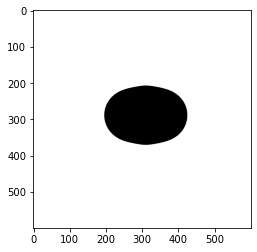

In [8]:
# This line of code is to confirm the function "load_polarA0_images" are working fine.
# This is a manual try. Give the location of the folder
# Read the file and show the file
import matplotlib.pyplot as plt
import random
images = []
path = 'E:/PhD-MSR/material_characterization_forJournal/DispersionCalculatorCode/PropagationAngleProfiler_2/store/PolarPlots/NewMaterials/uni/A0' # for S0 images -- > /S0
# WHich image of above folder you want to see, 0 index = 1st image and 149 index = 150th image
for i in range(2):
    base = os.path.sep.join([path, "{}_CgA0.png".format(i + 1)]) # for S0 images --> "{}_CgS0.png"
    #print(base)
    image0 = cv2.imread(base,0) # read the path using opencv #,cv2.IMREAD_GRAYSCALE or 0 for BW image
    # use matplotlib to plot the image ; By default, matplotlib use a colormap which maps intensities to colors. To avoid this, use: cmap
    plt.imshow(image0, cmap='Greys_r') 
    image0 = image0[:,:,np.newaxis] #This is convert (600,600) --> (600,600,1)
    images.append(image0)

In [9]:
np.array(images).shape

(2, 600, 600, 1)

In [10]:
# import the necessary packages to build the model
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import LeakyReLU
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model

def create_cnn(width, height, depth, filters=(16, 32, 64, 128)):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
	inputShape = (height, width, depth)
	chanDim = -1

	# define the model input
	inputs = Input(shape=inputShape)

	# loop over the number of filters
	for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
		if i == 0:
			x = inputs

		# CONV => RELU => BN => POOL
		x = Conv2D(f, (3, 3), padding="same")(x)
		x = Activation('relu')(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)

	# flatten the volume, then FC => RELU => BN => DROPOUT
	x = Flatten()(x)

	# construct the CNN
	model = Model(inputs, x)

	# return the CNN
	return model

In [11]:
# input images from three different folders
pathS0 = 'E:/PhD-MSR/material_characterization_forJournal/DispersionCalculatorCode/PropagationAngleProfiler_3/StoreResults/GroupVelPolarPlots/BWPolarRep/GeneratedMaterials/uni/S0'
pathA0 = 'E:/PhD-MSR/material_characterization_forJournal/DispersionCalculatorCode/PropagationAngleProfiler_3/StoreResults/GroupVelPolarPlots/BWPolarRep/GeneratedMaterials/uni/A0'

In [12]:
# import labels
LabelPath = 'E:/PhD-MSR/material_characterization_forJournal/DispersionCalculatorCode/PropagationAngleProfiler_3/StoreResults/Dataset/GenMaterials/Labels.txt'
df = pd.read_csv(LabelPath, header=None)
df.shape

(9870, 6)

In [13]:
rho = df.iloc[:,0:1]/100     # in (g/cm3)/10
E1 = df.iloc[:,1:2]*1e-9     # in GPa
E2 = df.iloc[:,2:3]*1e-9     # in GPa
G12 = df.iloc[:,3:4]*1e-9    # in GPa
v12 = df.iloc[:,4:5]*100     # in %
v23 = df.iloc[:,5:6]*100     # in %

dfn = pd.concat([rho,E1,E2,G12,v12,v23],axis=1)
dfm = np.array(dfn)

In [14]:
print("min rho =",float(min(dfm[:,0:1]))*100)
print("max rho =",float(max(dfm[:,0:1]))*100)

print("min E1 =",float(min(dfm[:,1:2])))
print("max E1 =",float(max(dfm[:,1:2])))

print("min E2 =",float(min(dfm[:,2:3])))
print("max E2 =",float(max(dfm[:,2:3])))

print("min G12 =",float(min(dfm[:,3:4])))
print("max G12 =",float(max(dfm[:,3:4])))

print("min v12 =",float(min(dfm[:,4:5]))/100)
print("max v12 =",float(max(dfm[:,4:5]))/100)

print("min v23 =",float(min(dfm[:,5:6]))/100)
print("max v23 =",float(max(dfm[:,5:6]))/100)

min rho = 1304.83
max rho = 1759.8699999999997
min E1 = 114.94583481900001
max E1 = 183.951394956
min E2 = 5.6377217150000005
max E2 = 13.797446813
min G12 = 3.135167012
max G12 = 8.998067662
min v12 = 0.20190000000000002
max v12 = 0.4851
min v23 = 0.23549999999999996
max v23 = 0.5926


In [15]:
# load the images of A0, S0 and SH0
imagesA0 = load_A0_images(dfn, pathA0, imsize=128)
imagesA0 = imagesA0
print("[INFO] loaded A0 images")
imagesS0 = load_S0_images(dfn, pathS0, imsize=128)
imagesS0 = imagesS0
print("[INFO] loading S0 images")

[INFO] loaded A0 images
[INFO] loading S0 images


In [16]:
# random no. generator for random_state in train_test_split
# import the necessary packages
from sklearn.model_selection import train_test_split
import random
randno = random.randint(0, 42)
print("random state for split =",randno)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing

# split A0
splitA0= train_test_split(dfn, imagesA0, test_size=0.15, random_state=randno)
(trainY1, testY1, trainImagesX1, testImagesX1) = splitA0

# split S0
splitS0= train_test_split(dfn, imagesS0, test_size=0.15, random_state=randno)
(trainY2, testY2, trainImagesX2, testImagesX2) = splitS0

random state for split = 40


In [17]:
print(trainY1)
#print(trainY2)
#del model

            0           1          2         3      4      5
1082  14.0564  162.305249   7.842512  6.731995  31.73  26.83
2118  17.2446  124.729037  11.166238  5.037887  43.48  34.58
6821  14.2141  123.703006  10.026132  5.385704  31.54  29.76
9675  15.0764  130.763189  11.748687  5.485363  38.75  40.70
9776  14.2411  173.805996  11.820541  8.100228  27.69  41.53
...       ...         ...        ...       ...    ...    ...
7839  15.7767  148.932579   7.045463  6.847370  23.27  37.07
3603  13.7874  180.365020   9.830891  5.788202  28.62  46.25
5959  14.4783  116.211954  13.457087  8.960760  45.78  36.26
5426  17.1477  121.684588  12.316807  4.505892  37.51  31.18
7608  13.7861  143.406981  11.075721  4.247568  27.97  24.80

[8389 rows x 6 columns]


In [18]:
# create the MLP and CNN models
from keras.optimizers import Adam
from keras.layers import concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.losses import Huber

cnn1 = create_cnn(128,128,1)
cnn2 = create_cnn(128,128,1)

# create the input to our final set of layers as the *output* of both
# combinedInput = concatenate([cnn1.output,cnn2.output])
combinedInput = concatenate([cnn1.output,cnn2.output])

x = Dense(256, activation="relu", kernel_regularizer = regularizers.l2(0.0001))(combinedInput)
x = Dropout(0.13)(x)
x = Dense(6, activation="linear")(x)

model = Model(inputs=[cnn1.input,cnn2.input], outputs=x)
#model = Model(inputs=[cnn1.input,cnn2.input], outputs=x)

opt = Adam(lr=1e-5)
model.compile(loss='mse', optimizer=opt, metrics = ['mape','mae',r_square,rmse])

In [19]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 128, 128, 16) 160         input_2[0][0]                    
____________________________________________________________________________________________

In [20]:
# Size of training and test datas
print("Training images in A0...",trainImagesX1.shape)
print("Training images in S0...",trainImagesX2.shape)
trainImages = trainImagesX1.shape[0]+trainImagesX2.shape[0]
print("Overall training examples...",trainImages)

print("Test images in A0...",testImagesX1.shape)
print("Test images in S0...",testImagesX2.shape)
testImages = testImagesX1.shape[0]+testImagesX2.shape[0]
print("Overall test examples...",testImages)

print("Training labels..",trainY1.shape)
print("Test labels..",testY1.shape)

Training images in A0... (8389, 128, 128, 1)
Training images in S0... (8389, 128, 128, 1)
Overall training examples... 16778
Test images in A0... (1481, 128, 128, 1)
Test images in S0... (1481, 128, 128, 1)
Overall test examples... 2962
Training labels.. (8389, 6)
Test labels.. (1481, 6)


In [21]:
# trainX should be list while using model.fit
# trainX = [trainImagesX1,trainImagesX2]
# testX should be list while using model.fit
# testX = [testImagesX1,testImagesX2]

# convert into array to know the size
#trainXn = np.array([trainImagesX1,trainImagesX2])
#print(np.array([trainImagesX1,trainImagesX2]))

# convert into array to know the size
#testXn = np.array([testImagesX1,testImagesX2])
#print(testXn.shape)

In [22]:
# train the model
print("[INFO] training model...")
hist = model.fit([trainImagesX1,trainImagesX2], trainY1, validation_data = ([testImagesX1,testImagesX2],testY1),\
                  epochs=5000, batch_size=16, verbose = 2, callbacks = [epoch_schedule])

[INFO] training model...
Train on 8389 samples, validate on 1481 samples
Epoch 1/5000
 - 18s - loss: 440.6345 - mape: 42.8320 - mae: 11.4621 - r_square: 0.8274 - rmse: 16.6953 - val_loss: 84.4992 - val_mape: 15.0499 - val_mae: 5.7014 - val_r_square: 0.9670 - val_rmse: 9.1499
Epoch 2/5000
 - 15s - loss: 91.8163 - mape: 36.5399 - mae: 7.2860 - r_square: 0.9639 - rmse: 9.5423 - val_loss: 49.1577 - val_mape: 13.7722 - val_mae: 4.6278 - val_r_square: 0.9807 - val_rmse: 6.9867
Epoch 3/5000
 - 15s - loss: 77.4728 - mape: 34.6597 - mae: 6.7407 - r_square: 0.9696 - rmse: 8.7702 - val_loss: 44.1070 - val_mape: 14.0772 - val_mae: 4.4331 - val_r_square: 0.9826 - val_rmse: 6.6133
Epoch 4/5000
 - 15s - loss: 73.8899 - mape: 33.7118 - mae: 6.5785 - r_square: 0.9710 - rmse: 8.5616 - val_loss: 43.8898 - val_mape: 12.8572 - val_mae: 4.3369 - val_r_square: 0.9827 - val_rmse: 6.5956
Epoch 5/5000
 - 16s - loss: 71.0239 - mape: 32.6055 - mae: 6.4148 - r_square: 0.9721 - rmse: 8.3994 - val_loss: 41.5461 - va

Epoch 42/5000
 - 16s - loss: 25.9883 - mape: 17.9273 - mae: 3.7050 - r_square: 0.9898 - rmse: 5.0659 - val_loss: 17.9145 - val_mape: 8.3077 - val_mae: 2.6298 - val_r_square: 0.9930 - val_rmse: 4.1951
Epoch 43/5000
 - 16s - loss: 25.7854 - mape: 17.6783 - mae: 3.6749 - r_square: 0.9899 - rmse: 5.0490 - val_loss: 17.6638 - val_mape: 8.1982 - val_mae: 2.5949 - val_r_square: 0.9931 - val_rmse: 4.1613
Epoch 44/5000
 - 16s - loss: 25.0430 - mape: 17.5100 - mae: 3.6248 - r_square: 0.9902 - rmse: 4.9751 - val_loss: 17.6969 - val_mape: 7.9417 - val_mae: 2.5813 - val_r_square: 0.9930 - val_rmse: 4.1669
Epoch 45/5000
 - 16s - loss: 24.4908 - mape: 17.2160 - mae: 3.5816 - r_square: 0.9904 - rmse: 4.9178 - val_loss: 16.9516 - val_mape: 7.9918 - val_mae: 2.5264 - val_r_square: 0.9933 - val_rmse: 4.0760
Epoch 46/5000
 - 16s - loss: 23.9565 - mape: 16.9305 - mae: 3.5401 - r_square: 0.9906 - rmse: 4.8655 - val_loss: 16.6715 - val_mape: 7.7707 - val_mae: 2.5157 - val_r_square: 0.9934 - val_rmse: 4.0438


Epoch 83/5000
 - 16s - loss: 14.1771 - mape: 10.9043 - mae: 2.5601 - r_square: 0.9944 - rmse: 3.7326 - val_loss: 11.2023 - val_mape: 6.2284 - val_mae: 2.0131 - val_r_square: 0.9956 - val_rmse: 3.3014
Epoch 84/5000
 - 16s - loss: 13.9131 - mape: 10.7839 - mae: 2.5436 - r_square: 0.9945 - rmse: 3.6972 - val_loss: 12.4472 - val_mape: 6.2433 - val_mae: 2.1312 - val_r_square: 0.9951 - val_rmse: 3.4855
Epoch 85/5000
 - 16s - loss: 13.8781 - mape: 10.6063 - mae: 2.5209 - r_square: 0.9946 - rmse: 3.6923 - val_loss: 10.7017 - val_mape: 6.0317 - val_mae: 1.9405 - val_r_square: 0.9958 - val_rmse: 3.2272
Epoch 86/5000
 - 16s - loss: 13.8123 - mape: 10.5144 - mae: 2.5143 - r_square: 0.9946 - rmse: 3.6822 - val_loss: 10.5974 - val_mape: 5.9287 - val_mae: 1.9304 - val_r_square: 0.9958 - val_rmse: 3.2060
Epoch 87/5000
 - 16s - loss: 13.5252 - mape: 10.4450 - mae: 2.4856 - r_square: 0.9947 - rmse: 3.6412 - val_loss: 10.6489 - val_mape: 5.9734 - val_mae: 1.9406 - val_r_square: 0.9958 - val_rmse: 3.2149


Epoch 125/5000
 - 16s - loss: 10.5404 - mape: 7.2755 - mae: 2.0496 - r_square: 0.9959 - rmse: 3.2107 - val_loss: 9.2416 - val_mape: 5.4731 - val_mae: 1.7970 - val_r_square: 0.9964 - val_rmse: 2.9930
Epoch 126/5000
 - 16s - loss: 10.5945 - mape: 7.2082 - mae: 2.0572 - r_square: 0.9959 - rmse: 3.2180 - val_loss: 8.8438 - val_mape: 5.3829 - val_mae: 1.7558 - val_r_square: 0.9965 - val_rmse: 2.9268
Epoch 127/5000
 - 16s - loss: 10.4046 - mape: 7.1355 - mae: 2.0352 - r_square: 0.9959 - rmse: 3.1901 - val_loss: 9.4172 - val_mape: 5.3569 - val_mae: 1.7999 - val_r_square: 0.9963 - val_rmse: 3.0178
Epoch 128/5000
 - 16s - loss: 10.2537 - mape: 7.0887 - mae: 2.0246 - r_square: 0.9960 - rmse: 3.1661 - val_loss: 8.8407 - val_mape: 5.4136 - val_mae: 1.7497 - val_r_square: 0.9965 - val_rmse: 2.9271
Epoch 129/5000
 - 16s - loss: 10.4552 - mape: 7.0896 - mae: 2.0293 - r_square: 0.9959 - rmse: 3.1955 - val_loss: 8.7416 - val_mape: 5.3150 - val_mae: 1.7444 - val_r_square: 0.9966 - val_rmse: 2.9085
Epoch

Epoch 167/5000
 - 16s - loss: 9.0683 - mape: 6.0235 - mae: 1.8408 - r_square: 0.9965 - rmse: 2.9714 - val_loss: 8.0966 - val_mape: 5.1127 - val_mae: 1.6795 - val_r_square: 0.9968 - val_rmse: 2.8018
Epoch 168/5000
 - 16s - loss: 9.3127 - mape: 6.0796 - mae: 1.8557 - r_square: 0.9964 - rmse: 3.0072 - val_loss: 7.8831 - val_mape: 5.0448 - val_mae: 1.6476 - val_r_square: 0.9969 - val_rmse: 2.7623
Epoch 169/5000
 - 16s - loss: 9.3380 - mape: 6.0908 - mae: 1.8592 - r_square: 0.9963 - rmse: 3.0168 - val_loss: 7.9562 - val_mape: 4.9730 - val_mae: 1.6473 - val_r_square: 0.9969 - val_rmse: 2.7690
Epoch 170/5000
 - 16s - loss: 8.9846 - mape: 6.0329 - mae: 1.8305 - r_square: 0.9965 - rmse: 2.9632 - val_loss: 9.7278 - val_mape: 5.2587 - val_mae: 1.8505 - val_r_square: 0.9962 - val_rmse: 3.0701
Epoch 171/5000
 - 16s - loss: 8.7889 - mape: 5.9819 - mae: 1.8085 - r_square: 0.9966 - rmse: 2.9232 - val_loss: 8.2139 - val_mape: 5.1327 - val_mae: 1.6789 - val_r_square: 0.9968 - val_rmse: 2.8191
Epoch 172/

Epoch 209/5000
 - 16s - loss: 8.4751 - mape: 5.7315 - mae: 1.7587 - r_square: 0.9967 - rmse: 2.8739 - val_loss: 7.6142 - val_mape: 4.9323 - val_mae: 1.6078 - val_r_square: 0.9970 - val_rmse: 2.7082
Epoch 210/5000
 - 16s - loss: 8.4975 - mape: 5.7364 - mae: 1.7594 - r_square: 0.9967 - rmse: 2.8739 - val_loss: 8.0552 - val_mape: 4.9016 - val_mae: 1.6643 - val_r_square: 0.9968 - val_rmse: 2.7902
Epoch 211/5000
 - 15s - loss: 8.3433 - mape: 5.6843 - mae: 1.7479 - r_square: 0.9967 - rmse: 2.8518 - val_loss: 9.0154 - val_mape: 5.4445 - val_mae: 1.7777 - val_r_square: 0.9965 - val_rmse: 2.9518
Epoch 212/5000
 - 15s - loss: 8.4304 - mape: 5.7431 - mae: 1.7523 - r_square: 0.9967 - rmse: 2.8618 - val_loss: 9.6642 - val_mape: 5.4575 - val_mae: 1.8374 - val_r_square: 0.9962 - val_rmse: 3.0604
Epoch 213/5000
 - 16s - loss: 8.3121 - mape: 5.6962 - mae: 1.7429 - r_square: 0.9968 - rmse: 2.8415 - val_loss: 7.5820 - val_mape: 4.8764 - val_mae: 1.6085 - val_r_square: 0.9970 - val_rmse: 2.7014
Epoch 214/

Epoch 251/5000
 - 16s - loss: 8.0661 - mape: 5.5338 - mae: 1.7022 - r_square: 0.9968 - rmse: 2.8000 - val_loss: 7.2178 - val_mape: 4.7181 - val_mae: 1.5678 - val_r_square: 0.9972 - val_rmse: 2.6348
Epoch 252/5000
 - 16s - loss: 7.9583 - mape: 5.5318 - mae: 1.6891 - r_square: 0.9969 - rmse: 2.7802 - val_loss: 7.1310 - val_mape: 4.6901 - val_mae: 1.5479 - val_r_square: 0.9972 - val_rmse: 2.6151
Epoch 253/5000
 - 16s - loss: 8.0015 - mape: 5.5528 - mae: 1.6984 - r_square: 0.9969 - rmse: 2.7876 - val_loss: 7.5404 - val_mape: 4.8934 - val_mae: 1.5994 - val_r_square: 0.9970 - val_rmse: 2.6936
Epoch 254/5000
 - 16s - loss: 7.9313 - mape: 5.5807 - mae: 1.6907 - r_square: 0.9969 - rmse: 2.7765 - val_loss: 7.6307 - val_mape: 4.8333 - val_mae: 1.6209 - val_r_square: 0.9970 - val_rmse: 2.7129
Epoch 255/5000
 - 16s - loss: 7.9153 - mape: 5.5143 - mae: 1.6868 - r_square: 0.9969 - rmse: 2.7741 - val_loss: 7.7564 - val_mape: 4.9345 - val_mae: 1.6316 - val_r_square: 0.9969 - val_rmse: 2.7330
Epoch 256/

Epoch 293/5000
 - 16s - loss: 7.5693 - mape: 5.3971 - mae: 1.6521 - r_square: 0.9970 - rmse: 2.7151 - val_loss: 7.9457 - val_mape: 4.7972 - val_mae: 1.6535 - val_r_square: 0.9969 - val_rmse: 2.7661
Epoch 294/5000
 - 16s - loss: 7.6500 - mape: 5.3898 - mae: 1.6509 - r_square: 0.9970 - rmse: 2.7286 - val_loss: 7.0906 - val_mape: 4.6958 - val_mae: 1.5539 - val_r_square: 0.9972 - val_rmse: 2.6075
Epoch 295/5000
 - 16s - loss: 7.7312 - mape: 5.4529 - mae: 1.6614 - r_square: 0.9970 - rmse: 2.7391 - val_loss: 7.0828 - val_mape: 4.6429 - val_mae: 1.5467 - val_r_square: 0.9972 - val_rmse: 2.6104
Epoch 296/5000
 - 16s - loss: 7.8927 - mape: 5.4240 - mae: 1.6737 - r_square: 0.9969 - rmse: 2.7684 - val_loss: 6.9741 - val_mape: 4.7133 - val_mae: 1.5405 - val_r_square: 0.9973 - val_rmse: 2.5927
Epoch 297/5000
 - 16s - loss: 7.6380 - mape: 5.4209 - mae: 1.6545 - r_square: 0.9970 - rmse: 2.7228 - val_loss: 6.8541 - val_mape: 4.7302 - val_mae: 1.5264 - val_r_square: 0.9973 - val_rmse: 2.5636
Epoch 298/

Epoch 335/5000
 - 16s - loss: 7.3493 - mape: 5.2766 - mae: 1.6196 - r_square: 0.9971 - rmse: 2.6715 - val_loss: 6.8016 - val_mape: 4.7053 - val_mae: 1.5152 - val_r_square: 0.9973 - val_rmse: 2.5546
Epoch 336/5000
 - 16s - loss: 7.5695 - mape: 5.3399 - mae: 1.6365 - r_square: 0.9970 - rmse: 2.7110 - val_loss: 7.6631 - val_mape: 4.6817 - val_mae: 1.6152 - val_r_square: 0.9970 - val_rmse: 2.7167
Epoch 337/5000
 - 16s - loss: 7.6194 - mape: 5.3633 - mae: 1.6426 - r_square: 0.9970 - rmse: 2.7131 - val_loss: 7.2842 - val_mape: 4.9032 - val_mae: 1.5820 - val_r_square: 0.9971 - val_rmse: 2.6476
Epoch 338/5000
 - 16s - loss: 7.4462 - mape: 5.3021 - mae: 1.6250 - r_square: 0.9971 - rmse: 2.6911 - val_loss: 7.1270 - val_mape: 4.7686 - val_mae: 1.5574 - val_r_square: 0.9972 - val_rmse: 2.6168
Epoch 339/5000
 - 16s - loss: 7.5472 - mape: 5.3552 - mae: 1.6414 - r_square: 0.9970 - rmse: 2.7081 - val_loss: 6.7485 - val_mape: 4.6680 - val_mae: 1.5091 - val_r_square: 0.9974 - val_rmse: 2.5421
Epoch 340/

Epoch 377/5000
 - 16s - loss: 7.3483 - mape: 5.2623 - mae: 1.6151 - r_square: 0.9971 - rmse: 2.6702 - val_loss: 7.6017 - val_mape: 4.8472 - val_mae: 1.6136 - val_r_square: 0.9970 - val_rmse: 2.7081
Epoch 378/5000
 - 16s - loss: 7.2888 - mape: 5.2291 - mae: 1.6058 - r_square: 0.9971 - rmse: 2.6600 - val_loss: 6.6752 - val_mape: 4.6683 - val_mae: 1.5046 - val_r_square: 0.9974 - val_rmse: 2.5294
Epoch 379/5000
 - 16s - loss: 7.5329 - mape: 5.2809 - mae: 1.6267 - r_square: 0.9971 - rmse: 2.7013 - val_loss: 7.0893 - val_mape: 4.5979 - val_mae: 1.5543 - val_r_square: 0.9972 - val_rmse: 2.6107
Epoch 380/5000
 - 16s - loss: 7.3700 - mape: 5.2049 - mae: 1.6103 - r_square: 0.9971 - rmse: 2.6751 - val_loss: 7.9769 - val_mape: 4.6143 - val_mae: 1.6468 - val_r_square: 0.9969 - val_rmse: 2.7810
Epoch 381/5000
 - 16s - loss: 7.4021 - mape: 5.2468 - mae: 1.6139 - r_square: 0.9971 - rmse: 2.6786 - val_loss: 7.3237 - val_mape: 4.6122 - val_mae: 1.5761 - val_r_square: 0.9971 - val_rmse: 2.6517
Epoch 382/

Epoch 419/5000
 - 16s - loss: 7.2522 - mape: 5.1866 - mae: 1.5960 - r_square: 0.9972 - rmse: 2.6518 - val_loss: 6.4977 - val_mape: 4.5479 - val_mae: 1.4755 - val_r_square: 0.9975 - val_rmse: 2.4980
Epoch 420/5000
 - 16s - loss: 7.2676 - mape: 5.1999 - mae: 1.6061 - r_square: 0.9972 - rmse: 2.6583 - val_loss: 6.7428 - val_mape: 4.5758 - val_mae: 1.4989 - val_r_square: 0.9974 - val_rmse: 2.5473
Epoch 421/5000
 - 16s - loss: 7.3617 - mape: 5.1997 - mae: 1.6070 - r_square: 0.9971 - rmse: 2.6729 - val_loss: 6.9031 - val_mape: 4.7769 - val_mae: 1.5323 - val_r_square: 0.9973 - val_rmse: 2.5753
Epoch 422/5000
 - 16s - loss: 7.1395 - mape: 5.1568 - mae: 1.5890 - r_square: 0.9972 - rmse: 2.6352 - val_loss: 6.5567 - val_mape: 4.6297 - val_mae: 1.4936 - val_r_square: 0.9974 - val_rmse: 2.5080
Epoch 423/5000
 - 16s - loss: 7.4198 - mape: 5.1906 - mae: 1.6027 - r_square: 0.9971 - rmse: 2.6806 - val_loss: 7.3523 - val_mape: 4.5767 - val_mae: 1.5758 - val_r_square: 0.9971 - val_rmse: 2.6589
Epoch 424/

Epoch 461/5000
 - 16s - loss: 7.0645 - mape: 5.0931 - mae: 1.5766 - r_square: 0.9972 - rmse: 2.6194 - val_loss: 7.8640 - val_mape: 4.7507 - val_mae: 1.6286 - val_r_square: 0.9969 - val_rmse: 2.7548
Epoch 462/5000
 - 16s - loss: 7.1854 - mape: 5.1097 - mae: 1.5808 - r_square: 0.9972 - rmse: 2.6385 - val_loss: 6.5114 - val_mape: 4.5054 - val_mae: 1.4841 - val_r_square: 0.9974 - val_rmse: 2.5018
Epoch 463/5000
 - 16s - loss: 7.0460 - mape: 5.0841 - mae: 1.5707 - r_square: 0.9972 - rmse: 2.6141 - val_loss: 6.6038 - val_mape: 4.3496 - val_mae: 1.4661 - val_r_square: 0.9974 - val_rmse: 2.5135
Epoch 464/5000
 - 16s - loss: 7.0017 - mape: 5.0899 - mae: 1.5687 - r_square: 0.9973 - rmse: 2.6055 - val_loss: 6.2761 - val_mape: 4.4436 - val_mae: 1.4478 - val_r_square: 0.9975 - val_rmse: 2.4506
Epoch 465/5000
 - 16s - loss: 7.2255 - mape: 5.0907 - mae: 1.5825 - r_square: 0.9972 - rmse: 2.6473 - val_loss: 6.8963 - val_mape: 4.4612 - val_mae: 1.5224 - val_r_square: 0.9973 - val_rmse: 2.5709
Epoch 466/

Epoch 503/5000
 - 16s - loss: 6.8627 - mape: 5.0272 - mae: 1.5559 - r_square: 0.9973 - rmse: 2.5829 - val_loss: 6.3705 - val_mape: 4.3347 - val_mae: 1.4443 - val_r_square: 0.9975 - val_rmse: 2.4681
Epoch 504/5000
 - 16s - loss: 6.8945 - mape: 5.0700 - mae: 1.5605 - r_square: 0.9973 - rmse: 2.5903 - val_loss: 6.8087 - val_mape: 4.3853 - val_mae: 1.5087 - val_r_square: 0.9973 - val_rmse: 2.5560
Epoch 505/5000
 - 16s - loss: 7.0753 - mape: 5.0907 - mae: 1.5766 - r_square: 0.9972 - rmse: 2.6165 - val_loss: 6.6097 - val_mape: 4.4116 - val_mae: 1.4876 - val_r_square: 0.9974 - val_rmse: 2.5205
Epoch 506/5000
 - 16s - loss: 6.8864 - mape: 5.0020 - mae: 1.5484 - r_square: 0.9973 - rmse: 2.5848 - val_loss: 6.3825 - val_mape: 4.3948 - val_mae: 1.4576 - val_r_square: 0.9975 - val_rmse: 2.4748
Epoch 507/5000
 - 16s - loss: 7.1565 - mape: 5.0489 - mae: 1.5758 - r_square: 0.9972 - rmse: 2.6359 - val_loss: 6.9537 - val_mape: 4.4472 - val_mae: 1.5259 - val_r_square: 0.9973 - val_rmse: 2.5846
Epoch 508/

Epoch 545/5000
 - 16s - loss: 7.0144 - mape: 5.0624 - mae: 1.5693 - r_square: 0.9973 - rmse: 2.6119 - val_loss: 6.5932 - val_mape: 4.4150 - val_mae: 1.4707 - val_r_square: 0.9974 - val_rmse: 2.5143
Epoch 546/5000
 - 16s - loss: 7.0141 - mape: 5.0417 - mae: 1.5635 - r_square: 0.9973 - rmse: 2.6045 - val_loss: 6.3416 - val_mape: 4.4605 - val_mae: 1.4447 - val_r_square: 0.9975 - val_rmse: 2.4655
Epoch 547/5000
 - 16s - loss: 6.8439 - mape: 5.0437 - mae: 1.5516 - r_square: 0.9973 - rmse: 2.5754 - val_loss: 7.4172 - val_mape: 4.4403 - val_mae: 1.5757 - val_r_square: 0.9971 - val_rmse: 2.6734
Epoch 548/5000
 - 16s - loss: 7.0257 - mape: 5.0647 - mae: 1.5660 - r_square: 0.9973 - rmse: 2.6073 - val_loss: 6.8867 - val_mape: 4.4233 - val_mae: 1.5223 - val_r_square: 0.9973 - val_rmse: 2.5773
Epoch 549/5000
 - 16s - loss: 6.9985 - mape: 5.0128 - mae: 1.5593 - r_square: 0.9973 - rmse: 2.6022 - val_loss: 6.4214 - val_mape: 4.3579 - val_mae: 1.4510 - val_r_square: 0.9975 - val_rmse: 2.4786
Epoch 550/

Epoch 587/5000
 - 16s - loss: 6.8854 - mape: 5.0018 - mae: 1.5514 - r_square: 0.9973 - rmse: 2.5817 - val_loss: 6.0738 - val_mape: 4.2775 - val_mae: 1.4075 - val_r_square: 0.9976 - val_rmse: 2.4090
Epoch 588/5000
 - 15s - loss: 6.8354 - mape: 4.9953 - mae: 1.5498 - r_square: 0.9973 - rmse: 2.5744 - val_loss: 6.2546 - val_mape: 4.2911 - val_mae: 1.4315 - val_r_square: 0.9975 - val_rmse: 2.4480
Epoch 589/5000
 - 16s - loss: 6.9417 - mape: 4.9850 - mae: 1.5522 - r_square: 0.9973 - rmse: 2.5940 - val_loss: 6.2241 - val_mape: 4.3209 - val_mae: 1.4352 - val_r_square: 0.9976 - val_rmse: 2.4400
Epoch 590/5000
 - 16s - loss: 7.0203 - mape: 5.0273 - mae: 1.5675 - r_square: 0.9973 - rmse: 2.6067 - val_loss: 6.2371 - val_mape: 4.3257 - val_mae: 1.4400 - val_r_square: 0.9976 - val_rmse: 2.4374
Epoch 591/5000
 - 16s - loss: 6.7464 - mape: 4.9609 - mae: 1.5343 - r_square: 0.9974 - rmse: 2.5608 - val_loss: 6.1572 - val_mape: 4.3282 - val_mae: 1.4179 - val_r_square: 0.9976 - val_rmse: 2.4290
Epoch 592/

Epoch 629/5000
 - 16s - loss: 6.5689 - mape: 4.9290 - mae: 1.5202 - r_square: 0.9974 - rmse: 2.5265 - val_loss: 6.2431 - val_mape: 4.3595 - val_mae: 1.4248 - val_r_square: 0.9976 - val_rmse: 2.4445
Epoch 630/5000
 - 16s - loss: 6.7211 - mape: 4.9491 - mae: 1.5364 - r_square: 0.9974 - rmse: 2.5504 - val_loss: 6.1565 - val_mape: 4.2895 - val_mae: 1.4218 - val_r_square: 0.9976 - val_rmse: 2.4262
Epoch 631/5000
 - 16s - loss: 6.7122 - mape: 4.9729 - mae: 1.5394 - r_square: 0.9974 - rmse: 2.5504 - val_loss: 5.8272 - val_mape: 4.2485 - val_mae: 1.3826 - val_r_square: 0.9977 - val_rmse: 2.3598
Epoch 632/5000
 - 16s - loss: 7.0906 - mape: 5.0358 - mae: 1.5664 - r_square: 0.9972 - rmse: 2.6234 - val_loss: 6.2360 - val_mape: 4.2943 - val_mae: 1.4283 - val_r_square: 0.9976 - val_rmse: 2.4453
Epoch 633/5000
 - 16s - loss: 6.8454 - mape: 4.9811 - mae: 1.5445 - r_square: 0.9973 - rmse: 2.5771 - val_loss: 7.5588 - val_mape: 4.5689 - val_mae: 1.6134 - val_r_square: 0.9970 - val_rmse: 2.7006
Epoch 634/

Epoch 671/5000
 - 16s - loss: 6.4629 - mape: 4.8886 - mae: 1.5122 - r_square: 0.9975 - rmse: 2.5053 - val_loss: 5.9836 - val_mape: 4.2632 - val_mae: 1.3973 - val_r_square: 0.9976 - val_rmse: 2.3937
Epoch 672/5000
 - 16s - loss: 6.5791 - mape: 4.8991 - mae: 1.5203 - r_square: 0.9974 - rmse: 2.5268 - val_loss: 5.9570 - val_mape: 4.1917 - val_mae: 1.4028 - val_r_square: 0.9977 - val_rmse: 2.3880
Epoch 673/5000
 - 16s - loss: 6.6048 - mape: 4.9021 - mae: 1.5210 - r_square: 0.9974 - rmse: 2.5301 - val_loss: 6.4389 - val_mape: 4.3049 - val_mae: 1.4605 - val_r_square: 0.9975 - val_rmse: 2.4841
Epoch 674/5000
 - 16s - loss: 6.5541 - mape: 4.9098 - mae: 1.5122 - r_square: 0.9974 - rmse: 2.5184 - val_loss: 6.1613 - val_mape: 4.2288 - val_mae: 1.4157 - val_r_square: 0.9976 - val_rmse: 2.4314
Epoch 675/5000
 - 16s - loss: 6.5368 - mape: 4.9077 - mae: 1.5151 - r_square: 0.9974 - rmse: 2.5205 - val_loss: 6.1484 - val_mape: 4.3648 - val_mae: 1.4141 - val_r_square: 0.9976 - val_rmse: 2.4306
Epoch 676/

Epoch 713/5000
 - 16s - loss: 6.6115 - mape: 4.8948 - mae: 1.5195 - r_square: 0.9974 - rmse: 2.5326 - val_loss: 5.9787 - val_mape: 4.1758 - val_mae: 1.3940 - val_r_square: 0.9977 - val_rmse: 2.3942
Epoch 714/5000
 - 16s - loss: 6.4906 - mape: 4.9017 - mae: 1.5107 - r_square: 0.9975 - rmse: 2.5100 - val_loss: 6.2812 - val_mape: 4.3394 - val_mae: 1.4335 - val_r_square: 0.9975 - val_rmse: 2.4535
Epoch 715/5000
 - 16s - loss: 6.5786 - mape: 4.9034 - mae: 1.5193 - r_square: 0.9974 - rmse: 2.5277 - val_loss: 5.9443 - val_mape: 4.1609 - val_mae: 1.3834 - val_r_square: 0.9977 - val_rmse: 2.3819
Epoch 716/5000
 - 16s - loss: 6.6499 - mape: 4.9053 - mae: 1.5242 - r_square: 0.9974 - rmse: 2.5404 - val_loss: 6.3241 - val_mape: 4.2906 - val_mae: 1.4466 - val_r_square: 0.9975 - val_rmse: 2.4591
Epoch 717/5000
 - 16s - loss: 6.5657 - mape: 4.8677 - mae: 1.5206 - r_square: 0.9974 - rmse: 2.5247 - val_loss: 6.2916 - val_mape: 4.4124 - val_mae: 1.4393 - val_r_square: 0.9975 - val_rmse: 2.4557
Epoch 718/

Epoch 755/5000
 - 16s - loss: 6.5410 - mape: 4.9067 - mae: 1.5131 - r_square: 0.9974 - rmse: 2.5196 - val_loss: 5.9844 - val_mape: 4.1653 - val_mae: 1.3842 - val_r_square: 0.9977 - val_rmse: 2.3942
Epoch 756/5000
 - 16s - loss: 6.6619 - mape: 4.9200 - mae: 1.5286 - r_square: 0.9974 - rmse: 2.5426 - val_loss: 6.1460 - val_mape: 4.3134 - val_mae: 1.4134 - val_r_square: 0.9976 - val_rmse: 2.4231
Epoch 757/5000
 - 16s - loss: 6.4979 - mape: 4.9050 - mae: 1.5088 - r_square: 0.9975 - rmse: 2.5065 - val_loss: 7.5279 - val_mape: 4.4022 - val_mae: 1.5984 - val_r_square: 0.9970 - val_rmse: 2.6973
Epoch 758/5000
 - 16s - loss: 6.4559 - mape: 4.9018 - mae: 1.5099 - r_square: 0.9975 - rmse: 2.5030 - val_loss: 6.3215 - val_mape: 4.2563 - val_mae: 1.4343 - val_r_square: 0.9975 - val_rmse: 2.4538
Epoch 759/5000
 - 16s - loss: 6.5266 - mape: 4.9113 - mae: 1.5189 - r_square: 0.9975 - rmse: 2.5158 - val_loss: 6.3316 - val_mape: 4.4307 - val_mae: 1.4392 - val_r_square: 0.9975 - val_rmse: 2.4637
Epoch 760/

Epoch 797/5000
 - 16s - loss: 6.3632 - mape: 4.8629 - mae: 1.4982 - r_square: 0.9975 - rmse: 2.4848 - val_loss: 6.1371 - val_mape: 4.1933 - val_mae: 1.4124 - val_r_square: 0.9976 - val_rmse: 2.4241
Epoch 798/5000
 - 16s - loss: 6.5070 - mape: 4.8633 - mae: 1.5094 - r_square: 0.9975 - rmse: 2.5092 - val_loss: 6.1988 - val_mape: 4.2512 - val_mae: 1.4111 - val_r_square: 0.9976 - val_rmse: 2.4360
Epoch 799/5000
 - 16s - loss: 6.6873 - mape: 4.8929 - mae: 1.5248 - r_square: 0.9974 - rmse: 2.5453 - val_loss: 6.0935 - val_mape: 4.1818 - val_mae: 1.4110 - val_r_square: 0.9976 - val_rmse: 2.4170
Epoch 800/5000
 - 16s - loss: 6.5570 - mape: 4.9050 - mae: 1.5213 - r_square: 0.9974 - rmse: 2.5260 - val_loss: 6.8278 - val_mape: 4.5815 - val_mae: 1.5129 - val_r_square: 0.9973 - val_rmse: 2.5648
Epoch 801/5000
 - 16s - loss: 6.3677 - mape: 4.8734 - mae: 1.4998 - r_square: 0.9975 - rmse: 2.4864 - val_loss: 6.0839 - val_mape: 4.2227 - val_mae: 1.4047 - val_r_square: 0.9976 - val_rmse: 2.4160
Epoch 802/

Epoch 839/5000
 - 16s - loss: 6.3817 - mape: 4.8459 - mae: 1.5001 - r_square: 0.9975 - rmse: 2.4885 - val_loss: 6.1633 - val_mape: 4.0996 - val_mae: 1.4073 - val_r_square: 0.9976 - val_rmse: 2.4297
Epoch 840/5000
 - 16s - loss: 6.4949 - mape: 4.9125 - mae: 1.5152 - r_square: 0.9975 - rmse: 2.5111 - val_loss: 6.4568 - val_mape: 4.1815 - val_mae: 1.4443 - val_r_square: 0.9975 - val_rmse: 2.4865
Epoch 841/5000
 - 16s - loss: 6.4037 - mape: 4.8844 - mae: 1.5013 - r_square: 0.9975 - rmse: 2.4965 - val_loss: 5.8932 - val_mape: 4.1466 - val_mae: 1.3752 - val_r_square: 0.9977 - val_rmse: 2.3714
Epoch 842/5000
 - 16s - loss: 6.3516 - mape: 4.8795 - mae: 1.4970 - r_square: 0.9975 - rmse: 2.4787 - val_loss: 5.9364 - val_mape: 4.2792 - val_mae: 1.3919 - val_r_square: 0.9977 - val_rmse: 2.3841
Epoch 843/5000
 - 16s - loss: 6.4800 - mape: 4.8714 - mae: 1.5066 - r_square: 0.9975 - rmse: 2.5030 - val_loss: 7.2880 - val_mape: 4.3689 - val_mae: 1.5700 - val_r_square: 0.9971 - val_rmse: 2.6507
Epoch 844/

Epoch 881/5000
 - 16s - loss: 6.4309 - mape: 4.8986 - mae: 1.5066 - r_square: 0.9975 - rmse: 2.4945 - val_loss: 6.0360 - val_mape: 4.1185 - val_mae: 1.3949 - val_r_square: 0.9976 - val_rmse: 2.4021
Epoch 882/5000
 - 16s - loss: 6.5668 - mape: 4.8791 - mae: 1.5168 - r_square: 0.9974 - rmse: 2.5202 - val_loss: 5.9112 - val_mape: 4.0841 - val_mae: 1.3631 - val_r_square: 0.9977 - val_rmse: 2.3743
Epoch 883/5000
 - 16s - loss: 6.3413 - mape: 4.8505 - mae: 1.4956 - r_square: 0.9975 - rmse: 2.4774 - val_loss: 5.8632 - val_mape: 4.1782 - val_mae: 1.3675 - val_r_square: 0.9977 - val_rmse: 2.3678
Epoch 884/5000
 - 16s - loss: 6.3799 - mape: 4.8465 - mae: 1.4938 - r_square: 0.9975 - rmse: 2.4842 - val_loss: 6.0219 - val_mape: 4.2631 - val_mae: 1.4074 - val_r_square: 0.9976 - val_rmse: 2.3965
Epoch 885/5000
 - 16s - loss: 6.2945 - mape: 4.8373 - mae: 1.4858 - r_square: 0.9975 - rmse: 2.4692 - val_loss: 5.8960 - val_mape: 4.1100 - val_mae: 1.3859 - val_r_square: 0.9977 - val_rmse: 2.3755
Epoch 886/

Epoch 923/5000
 - 16s - loss: 6.3453 - mape: 4.8518 - mae: 1.4969 - r_square: 0.9975 - rmse: 2.4822 - val_loss: 5.7335 - val_mape: 4.1870 - val_mae: 1.3649 - val_r_square: 0.9978 - val_rmse: 2.3390
Epoch 924/5000
 - 16s - loss: 6.0526 - mape: 4.7889 - mae: 1.4689 - r_square: 0.9976 - rmse: 2.4257 - val_loss: 6.1004 - val_mape: 4.1856 - val_mae: 1.4095 - val_r_square: 0.9976 - val_rmse: 2.4116
Epoch 925/5000
 - 16s - loss: 6.3213 - mape: 4.8345 - mae: 1.4884 - r_square: 0.9975 - rmse: 2.4751 - val_loss: 5.7627 - val_mape: 4.0869 - val_mae: 1.3495 - val_r_square: 0.9977 - val_rmse: 2.3425
Epoch 926/5000
 - 16s - loss: 6.4368 - mape: 4.9030 - mae: 1.5080 - r_square: 0.9975 - rmse: 2.4991 - val_loss: 5.7549 - val_mape: 4.1667 - val_mae: 1.3596 - val_r_square: 0.9977 - val_rmse: 2.3459
Epoch 927/5000
 - 16s - loss: 6.2459 - mape: 4.8283 - mae: 1.4865 - r_square: 0.9976 - rmse: 2.4630 - val_loss: 6.0301 - val_mape: 4.0743 - val_mae: 1.3939 - val_r_square: 0.9976 - val_rmse: 2.4020
Epoch 928/

Epoch 965/5000
 - 16s - loss: 6.3231 - mape: 4.8673 - mae: 1.4919 - r_square: 0.9975 - rmse: 2.4761 - val_loss: 5.8041 - val_mape: 4.2427 - val_mae: 1.3737 - val_r_square: 0.9977 - val_rmse: 2.3558
Epoch 966/5000
 - 16s - loss: 6.2097 - mape: 4.7882 - mae: 1.4806 - r_square: 0.9976 - rmse: 2.4540 - val_loss: 5.9466 - val_mape: 4.1165 - val_mae: 1.3860 - val_r_square: 0.9977 - val_rmse: 2.3811
Epoch 967/5000
 - 16s - loss: 6.1585 - mape: 4.8191 - mae: 1.4803 - r_square: 0.9976 - rmse: 2.4410 - val_loss: 5.7542 - val_mape: 4.0086 - val_mae: 1.3490 - val_r_square: 0.9977 - val_rmse: 2.3444
Epoch 968/5000
 - 16s - loss: 6.4386 - mape: 4.8632 - mae: 1.5038 - r_square: 0.9975 - rmse: 2.4998 - val_loss: 6.0091 - val_mape: 4.2260 - val_mae: 1.3849 - val_r_square: 0.9976 - val_rmse: 2.3997
Epoch 969/5000
 - 16s - loss: 6.1493 - mape: 4.7858 - mae: 1.4648 - r_square: 0.9976 - rmse: 2.4375 - val_loss: 5.9810 - val_mape: 4.1961 - val_mae: 1.3971 - val_r_square: 0.9977 - val_rmse: 2.3897
Epoch 970/

Epoch 1007/5000
 - 16s - loss: 6.1092 - mape: 4.8300 - mae: 1.4761 - r_square: 0.9976 - rmse: 2.4351 - val_loss: 5.6435 - val_mape: 4.1380 - val_mae: 1.3468 - val_r_square: 0.9978 - val_rmse: 2.3236
Epoch 1008/5000
 - 16s - loss: 6.2295 - mape: 4.8408 - mae: 1.4819 - r_square: 0.9976 - rmse: 2.4558 - val_loss: 5.6503 - val_mape: 4.0605 - val_mae: 1.3445 - val_r_square: 0.9978 - val_rmse: 2.3215
Epoch 1009/5000
 - 16s - loss: 6.2232 - mape: 4.7974 - mae: 1.4755 - r_square: 0.9976 - rmse: 2.4541 - val_loss: 5.6819 - val_mape: 3.9644 - val_mae: 1.3407 - val_r_square: 0.9978 - val_rmse: 2.3288
Epoch 1010/5000
 - 16s - loss: 6.2124 - mape: 4.8212 - mae: 1.4766 - r_square: 0.9976 - rmse: 2.4534 - val_loss: 5.7459 - val_mape: 4.0700 - val_mae: 1.3474 - val_r_square: 0.9977 - val_rmse: 2.3444
Epoch 1011/5000
 - 16s - loss: 6.4321 - mape: 4.8888 - mae: 1.5054 - r_square: 0.9975 - rmse: 2.4994 - val_loss: 5.6427 - val_mape: 4.0173 - val_mae: 1.3300 - val_r_square: 0.9978 - val_rmse: 2.3233
Epoch

Epoch 1049/5000
 - 16s - loss: 6.2365 - mape: 4.8308 - mae: 1.4841 - r_square: 0.9976 - rmse: 2.4637 - val_loss: 5.5989 - val_mape: 4.0302 - val_mae: 1.3296 - val_r_square: 0.9978 - val_rmse: 2.3131
Epoch 1050/5000
 - 16s - loss: 6.3415 - mape: 4.8248 - mae: 1.4864 - r_square: 0.9975 - rmse: 2.4790 - val_loss: 5.6682 - val_mape: 4.0974 - val_mae: 1.3433 - val_r_square: 0.9978 - val_rmse: 2.3266
Epoch 1051/5000
 - 16s - loss: 6.1737 - mape: 4.8292 - mae: 1.4796 - r_square: 0.9976 - rmse: 2.4496 - val_loss: 6.1493 - val_mape: 4.1507 - val_mae: 1.4149 - val_r_square: 0.9976 - val_rmse: 2.4275
Epoch 1052/5000
 - 16s - loss: 6.3194 - mape: 4.8635 - mae: 1.4927 - r_square: 0.9975 - rmse: 2.4734 - val_loss: 5.5292 - val_mape: 4.1129 - val_mae: 1.3296 - val_r_square: 0.9978 - val_rmse: 2.2914
Epoch 1053/5000
 - 16s - loss: 6.3011 - mape: 4.8659 - mae: 1.4893 - r_square: 0.9975 - rmse: 2.4735 - val_loss: 5.5784 - val_mape: 4.0786 - val_mae: 1.3353 - val_r_square: 0.9978 - val_rmse: 2.3058
Epoch

Epoch 1091/5000
 - 16s - loss: 6.2734 - mape: 4.8276 - mae: 1.4801 - r_square: 0.9976 - rmse: 2.4608 - val_loss: 5.7465 - val_mape: 4.1153 - val_mae: 1.3534 - val_r_square: 0.9977 - val_rmse: 2.3429
Epoch 1092/5000
 - 16s - loss: 6.1258 - mape: 4.7748 - mae: 1.4684 - r_square: 0.9976 - rmse: 2.4383 - val_loss: 5.9620 - val_mape: 4.0982 - val_mae: 1.3587 - val_r_square: 0.9977 - val_rmse: 2.3854
Epoch 1093/5000
 - 16s - loss: 6.1851 - mape: 4.7957 - mae: 1.4768 - r_square: 0.9976 - rmse: 2.4466 - val_loss: 6.2829 - val_mape: 4.1476 - val_mae: 1.4369 - val_r_square: 0.9975 - val_rmse: 2.4549
Epoch 1094/5000
 - 16s - loss: 6.2011 - mape: 4.8257 - mae: 1.4800 - r_square: 0.9976 - rmse: 2.4487 - val_loss: 5.6325 - val_mape: 4.0310 - val_mae: 1.3335 - val_r_square: 0.9978 - val_rmse: 2.3164
Epoch 1095/5000
 - 16s - loss: 6.3147 - mape: 4.8363 - mae: 1.4903 - r_square: 0.9975 - rmse: 2.4736 - val_loss: 5.8950 - val_mape: 4.0905 - val_mae: 1.3653 - val_r_square: 0.9977 - val_rmse: 2.3704
Epoch

Epoch 1133/5000
 - 16s - loss: 6.1015 - mape: 4.7770 - mae: 1.4595 - r_square: 0.9976 - rmse: 2.4314 - val_loss: 5.8652 - val_mape: 4.0667 - val_mae: 1.3685 - val_r_square: 0.9977 - val_rmse: 2.3635
Epoch 1134/5000
 - 16s - loss: 6.1346 - mape: 4.8275 - mae: 1.4749 - r_square: 0.9976 - rmse: 2.4397 - val_loss: 5.7764 - val_mape: 4.1934 - val_mae: 1.3661 - val_r_square: 0.9977 - val_rmse: 2.3486
Epoch 1135/5000
 - 16s - loss: 6.0482 - mape: 4.8054 - mae: 1.4660 - r_square: 0.9976 - rmse: 2.4235 - val_loss: 5.6535 - val_mape: 4.0011 - val_mae: 1.3181 - val_r_square: 0.9978 - val_rmse: 2.3160
Epoch 1136/5000
 - 16s - loss: 6.0014 - mape: 4.8121 - mae: 1.4584 - r_square: 0.9977 - rmse: 2.4125 - val_loss: 5.8267 - val_mape: 4.1131 - val_mae: 1.3550 - val_r_square: 0.9977 - val_rmse: 2.3570
Epoch 1137/5000
 - 16s - loss: 6.2390 - mape: 4.8476 - mae: 1.4824 - r_square: 0.9976 - rmse: 2.4574 - val_loss: 5.7083 - val_mape: 3.9711 - val_mae: 1.3420 - val_r_square: 0.9978 - val_rmse: 2.3323
Epoch

Epoch 1175/5000
 - 16s - loss: 6.0936 - mape: 4.7986 - mae: 1.4653 - r_square: 0.9976 - rmse: 2.4313 - val_loss: 6.0428 - val_mape: 4.0312 - val_mae: 1.3962 - val_r_square: 0.9976 - val_rmse: 2.4016
Epoch 1176/5000
 - 16s - loss: 6.2709 - mape: 4.8309 - mae: 1.4835 - r_square: 0.9976 - rmse: 2.4677 - val_loss: 5.5224 - val_mape: 4.0320 - val_mae: 1.3147 - val_r_square: 0.9978 - val_rmse: 2.2953
Epoch 1177/5000
 - 16s - loss: 6.0619 - mape: 4.8001 - mae: 1.4653 - r_square: 0.9976 - rmse: 2.4239 - val_loss: 5.8837 - val_mape: 4.0972 - val_mae: 1.3655 - val_r_square: 0.9977 - val_rmse: 2.3664
Epoch 1178/5000
 - 16s - loss: 6.1628 - mape: 4.8029 - mae: 1.4719 - r_square: 0.9976 - rmse: 2.4423 - val_loss: 5.4428 - val_mape: 3.9599 - val_mae: 1.3045 - val_r_square: 0.9979 - val_rmse: 2.2701
Epoch 1179/5000
 - 16s - loss: 6.1261 - mape: 4.7445 - mae: 1.4651 - r_square: 0.9976 - rmse: 2.4356 - val_loss: 5.4830 - val_mape: 4.0654 - val_mae: 1.3165 - val_r_square: 0.9979 - val_rmse: 2.2841
Epoch

Epoch 1217/5000
 - 16s - loss: 6.1219 - mape: 4.8186 - mae: 1.4728 - r_square: 0.9976 - rmse: 2.4346 - val_loss: 5.5419 - val_mape: 4.0601 - val_mae: 1.3134 - val_r_square: 0.9978 - val_rmse: 2.2968
Epoch 1218/5000
 - 15s - loss: 5.9325 - mape: 4.7601 - mae: 1.4517 - r_square: 0.9977 - rmse: 2.4012 - val_loss: 5.6268 - val_mape: 4.0600 - val_mae: 1.3341 - val_r_square: 0.9978 - val_rmse: 2.3184
Epoch 1219/5000
 - 16s - loss: 6.1334 - mape: 4.7391 - mae: 1.4655 - r_square: 0.9976 - rmse: 2.4382 - val_loss: 5.6876 - val_mape: 4.0597 - val_mae: 1.3456 - val_r_square: 0.9978 - val_rmse: 2.3283
Epoch 1220/5000
 - 16s - loss: 6.1158 - mape: 4.8134 - mae: 1.4725 - r_square: 0.9976 - rmse: 2.4333 - val_loss: 6.7888 - val_mape: 4.2508 - val_mae: 1.4931 - val_r_square: 0.9973 - val_rmse: 2.5536
Epoch 1221/5000
 - 16s - loss: 6.1452 - mape: 4.7524 - mae: 1.4676 - r_square: 0.9976 - rmse: 2.4436 - val_loss: 5.8763 - val_mape: 4.0748 - val_mae: 1.3720 - val_r_square: 0.9977 - val_rmse: 2.3649
Epoch

Epoch 1259/5000
 - 16s - loss: 6.1073 - mape: 4.8076 - mae: 1.4679 - r_square: 0.9976 - rmse: 2.4334 - val_loss: 5.4014 - val_mape: 3.9303 - val_mae: 1.2946 - val_r_square: 0.9979 - val_rmse: 2.2661
Epoch 1260/5000
 - 16s - loss: 5.9789 - mape: 4.7244 - mae: 1.4528 - r_square: 0.9977 - rmse: 2.4103 - val_loss: 5.9243 - val_mape: 4.0999 - val_mae: 1.3720 - val_r_square: 0.9977 - val_rmse: 2.3793
Epoch 1261/5000
 - 16s - loss: 6.1363 - mape: 4.7898 - mae: 1.4726 - r_square: 0.9976 - rmse: 2.4399 - val_loss: 5.5382 - val_mape: 3.9740 - val_mae: 1.3208 - val_r_square: 0.9978 - val_rmse: 2.2923
Epoch 1262/5000
 - 16s - loss: 6.1685 - mape: 4.7786 - mae: 1.4732 - r_square: 0.9976 - rmse: 2.4451 - val_loss: 5.3886 - val_mape: 3.9827 - val_mae: 1.3019 - val_r_square: 0.9979 - val_rmse: 2.2629
Epoch 1263/5000
 - 16s - loss: 6.0556 - mape: 4.7590 - mae: 1.4574 - r_square: 0.9976 - rmse: 2.4206 - val_loss: 5.6145 - val_mape: 4.0920 - val_mae: 1.3321 - val_r_square: 0.9978 - val_rmse: 2.3138
Epoch

Epoch 1301/5000
 - 16s - loss: 5.9518 - mape: 4.7392 - mae: 1.4476 - r_square: 0.9977 - rmse: 2.4039 - val_loss: 5.5002 - val_mape: 4.0661 - val_mae: 1.3201 - val_r_square: 0.9978 - val_rmse: 2.2871
Epoch 1302/5000
 - 15s - loss: 6.0003 - mape: 4.7767 - mae: 1.4583 - r_square: 0.9977 - rmse: 2.4136 - val_loss: 5.5889 - val_mape: 4.0052 - val_mae: 1.3258 - val_r_square: 0.9978 - val_rmse: 2.3066
Epoch 1303/5000
 - 15s - loss: 6.0957 - mape: 4.8057 - mae: 1.4663 - r_square: 0.9976 - rmse: 2.4318 - val_loss: 5.5599 - val_mape: 4.0318 - val_mae: 1.3176 - val_r_square: 0.9978 - val_rmse: 2.3020
Epoch 1304/5000
 - 16s - loss: 6.0505 - mape: 4.7688 - mae: 1.4608 - r_square: 0.9976 - rmse: 2.4227 - val_loss: 5.4639 - val_mape: 3.9565 - val_mae: 1.3069 - val_r_square: 0.9979 - val_rmse: 2.2805
Epoch 1305/5000
 - 16s - loss: 5.8993 - mape: 4.7739 - mae: 1.4483 - r_square: 0.9977 - rmse: 2.3912 - val_loss: 6.6405 - val_mape: 4.2154 - val_mae: 1.4809 - val_r_square: 0.9974 - val_rmse: 2.5242
Epoch

Epoch 1343/5000
 - 16s - loss: 5.9328 - mape: 4.7413 - mae: 1.4514 - r_square: 0.9977 - rmse: 2.4016 - val_loss: 5.8279 - val_mape: 4.0809 - val_mae: 1.3763 - val_r_square: 0.9977 - val_rmse: 2.3581
Epoch 1344/5000
 - 16s - loss: 6.1240 - mape: 4.7865 - mae: 1.4737 - r_square: 0.9976 - rmse: 2.4376 - val_loss: 5.9040 - val_mape: 4.1416 - val_mae: 1.3659 - val_r_square: 0.9977 - val_rmse: 2.3751
Epoch 1345/5000
 - 16s - loss: 6.0440 - mape: 4.8066 - mae: 1.4639 - r_square: 0.9976 - rmse: 2.4213 - val_loss: 6.2884 - val_mape: 4.1267 - val_mae: 1.4388 - val_r_square: 0.9975 - val_rmse: 2.4513
Epoch 1346/5000
 - 16s - loss: 6.1111 - mape: 4.8007 - mae: 1.4649 - r_square: 0.9976 - rmse: 2.4335 - val_loss: 5.5261 - val_mape: 3.9271 - val_mae: 1.3017 - val_r_square: 0.9978 - val_rmse: 2.2924
Epoch 1347/5000
 - 16s - loss: 5.9428 - mape: 4.7651 - mae: 1.4521 - r_square: 0.9977 - rmse: 2.4029 - val_loss: 6.6558 - val_mape: 4.2227 - val_mae: 1.4912 - val_r_square: 0.9974 - val_rmse: 2.5302
Epoch

Epoch 1385/5000
 - 16s - loss: 5.9643 - mape: 4.6940 - mae: 1.4466 - r_square: 0.9977 - rmse: 2.4029 - val_loss: 5.6640 - val_mape: 3.9106 - val_mae: 1.3290 - val_r_square: 0.9978 - val_rmse: 2.3221
Epoch 1386/5000
 - 16s - loss: 6.1437 - mape: 4.7570 - mae: 1.4729 - r_square: 0.9976 - rmse: 2.4381 - val_loss: 5.5563 - val_mape: 4.0530 - val_mae: 1.3237 - val_r_square: 0.9978 - val_rmse: 2.3020
Epoch 1387/5000
 - 16s - loss: 6.0792 - mape: 4.7446 - mae: 1.4646 - r_square: 0.9976 - rmse: 2.4272 - val_loss: 6.0868 - val_mape: 4.0750 - val_mae: 1.3963 - val_r_square: 0.9976 - val_rmse: 2.4143
Epoch 1388/5000
 - 16s - loss: 6.1105 - mape: 4.7712 - mae: 1.4666 - r_square: 0.9976 - rmse: 2.4349 - val_loss: 5.4905 - val_mape: 4.1089 - val_mae: 1.3208 - val_r_square: 0.9978 - val_rmse: 2.2885
Epoch 1389/5000
 - 16s - loss: 5.9731 - mape: 4.7596 - mae: 1.4489 - r_square: 0.9977 - rmse: 2.4067 - val_loss: 5.5312 - val_mape: 4.0336 - val_mae: 1.3197 - val_r_square: 0.9978 - val_rmse: 2.2962
Epoch

Epoch 1427/5000
 - 16s - loss: 6.0550 - mape: 4.7359 - mae: 1.4589 - r_square: 0.9976 - rmse: 2.4218 - val_loss: 5.4925 - val_mape: 3.9225 - val_mae: 1.3052 - val_r_square: 0.9978 - val_rmse: 2.2858
Epoch 1428/5000
 - 16s - loss: 5.9446 - mape: 4.7504 - mae: 1.4529 - r_square: 0.9977 - rmse: 2.4014 - val_loss: 5.5148 - val_mape: 4.0203 - val_mae: 1.3111 - val_r_square: 0.9978 - val_rmse: 2.2893
Epoch 1429/5000
 - 16s - loss: 5.8729 - mape: 4.7472 - mae: 1.4459 - r_square: 0.9977 - rmse: 2.3862 - val_loss: 5.5538 - val_mape: 3.9963 - val_mae: 1.3103 - val_r_square: 0.9978 - val_rmse: 2.2988
Epoch 1430/5000
 - 16s - loss: 5.8487 - mape: 4.7316 - mae: 1.4399 - r_square: 0.9977 - rmse: 2.3821 - val_loss: 6.2353 - val_mape: 4.1116 - val_mae: 1.4282 - val_r_square: 0.9976 - val_rmse: 2.4448
Epoch 1431/5000
 - 16s - loss: 5.9709 - mape: 4.7521 - mae: 1.4571 - r_square: 0.9977 - rmse: 2.4065 - val_loss: 5.5102 - val_mape: 3.9775 - val_mae: 1.3182 - val_r_square: 0.9978 - val_rmse: 2.2917
Epoch

Epoch 1469/5000
 - 16s - loss: 5.7711 - mape: 4.7130 - mae: 1.4266 - r_square: 0.9978 - rmse: 2.3645 - val_loss: 5.4987 - val_mape: 4.0077 - val_mae: 1.3279 - val_r_square: 0.9978 - val_rmse: 2.2889
Epoch 1470/5000
 - 16s - loss: 5.8782 - mape: 4.7092 - mae: 1.4418 - r_square: 0.9977 - rmse: 2.3877 - val_loss: 5.4090 - val_mape: 3.8683 - val_mae: 1.2928 - val_r_square: 0.9979 - val_rmse: 2.2675
Epoch 1471/5000
 - 16s - loss: 5.8801 - mape: 4.7214 - mae: 1.4432 - r_square: 0.9977 - rmse: 2.3858 - val_loss: 6.3014 - val_mape: 4.0298 - val_mae: 1.4349 - val_r_square: 0.9975 - val_rmse: 2.4607
Epoch 1472/5000
 - 16s - loss: 6.0273 - mape: 4.7567 - mae: 1.4556 - r_square: 0.9976 - rmse: 2.4158 - val_loss: 6.0066 - val_mape: 4.0525 - val_mae: 1.3870 - val_r_square: 0.9976 - val_rmse: 2.3928
Epoch 1473/5000
 - 16s - loss: 6.0458 - mape: 4.7562 - mae: 1.4618 - r_square: 0.9976 - rmse: 2.4205 - val_loss: 5.4867 - val_mape: 4.0603 - val_mae: 1.3222 - val_r_square: 0.9979 - val_rmse: 2.2829
Epoch

Epoch 1511/5000
 - 16s - loss: 5.7805 - mape: 4.7021 - mae: 1.4322 - r_square: 0.9977 - rmse: 2.3679 - val_loss: 5.3392 - val_mape: 3.8999 - val_mae: 1.2857 - val_r_square: 0.9979 - val_rmse: 2.2507
Epoch 1512/5000
 - 16s - loss: 5.9466 - mape: 4.7104 - mae: 1.4431 - r_square: 0.9977 - rmse: 2.4024 - val_loss: 5.5004 - val_mape: 3.9675 - val_mae: 1.3066 - val_r_square: 0.9978 - val_rmse: 2.2872
Epoch 1513/5000
 - 16s - loss: 5.8125 - mape: 4.7078 - mae: 1.4362 - r_square: 0.9977 - rmse: 2.3750 - val_loss: 5.8546 - val_mape: 4.0360 - val_mae: 1.3697 - val_r_square: 0.9977 - val_rmse: 2.3617
Epoch 1514/5000
 - 15s - loss: 5.9708 - mape: 4.7247 - mae: 1.4533 - r_square: 0.9977 - rmse: 2.4074 - val_loss: 5.9776 - val_mape: 4.1135 - val_mae: 1.4050 - val_r_square: 0.9977 - val_rmse: 2.3916
Epoch 1515/5000
 - 16s - loss: 5.7371 - mape: 4.7124 - mae: 1.4267 - r_square: 0.9978 - rmse: 2.3580 - val_loss: 5.4818 - val_mape: 4.0248 - val_mae: 1.3151 - val_r_square: 0.9979 - val_rmse: 2.2817
Epoch

Epoch 1553/5000
 - 15s - loss: 5.9377 - mape: 4.7542 - mae: 1.4458 - r_square: 0.9977 - rmse: 2.3995 - val_loss: 6.5019 - val_mape: 4.1693 - val_mae: 1.4714 - val_r_square: 0.9975 - val_rmse: 2.4969
Epoch 1554/5000
 - 16s - loss: 5.8597 - mape: 4.7208 - mae: 1.4409 - r_square: 0.9977 - rmse: 2.3815 - val_loss: 5.8109 - val_mape: 4.1426 - val_mae: 1.3428 - val_r_square: 0.9977 - val_rmse: 2.3530
Epoch 1555/5000
 - 16s - loss: 6.0173 - mape: 4.7397 - mae: 1.4542 - r_square: 0.9976 - rmse: 2.4171 - val_loss: 5.3759 - val_mape: 4.0664 - val_mae: 1.2981 - val_r_square: 0.9979 - val_rmse: 2.2574
Epoch 1556/5000
 - 16s - loss: 5.8924 - mape: 4.7206 - mae: 1.4399 - r_square: 0.9977 - rmse: 2.3839 - val_loss: 5.4933 - val_mape: 4.0180 - val_mae: 1.3140 - val_r_square: 0.9979 - val_rmse: 2.2808
Epoch 1557/5000
 - 15s - loss: 5.9102 - mape: 4.7456 - mae: 1.4414 - r_square: 0.9977 - rmse: 2.3923 - val_loss: 5.6988 - val_mape: 3.9857 - val_mae: 1.3443 - val_r_square: 0.9978 - val_rmse: 2.3341
Epoch

Epoch 1595/5000
 - 16s - loss: 5.8796 - mape: 4.7297 - mae: 1.4423 - r_square: 0.9977 - rmse: 2.3868 - val_loss: 5.8309 - val_mape: 4.0500 - val_mae: 1.3538 - val_r_square: 0.9977 - val_rmse: 2.3614
Epoch 1596/5000
 - 16s - loss: 5.8220 - mape: 4.7052 - mae: 1.4370 - r_square: 0.9977 - rmse: 2.3783 - val_loss: 5.3639 - val_mape: 4.0255 - val_mae: 1.2979 - val_r_square: 0.9979 - val_rmse: 2.2592
Epoch 1597/5000
 - 16s - loss: 5.9150 - mape: 4.7020 - mae: 1.4436 - r_square: 0.9977 - rmse: 2.3937 - val_loss: 5.3963 - val_mape: 4.0118 - val_mae: 1.3065 - val_r_square: 0.9979 - val_rmse: 2.2633
Epoch 1598/5000
 - 16s - loss: 5.9523 - mape: 4.7210 - mae: 1.4490 - r_square: 0.9977 - rmse: 2.3997 - val_loss: 5.3853 - val_mape: 3.8700 - val_mae: 1.2853 - val_r_square: 0.9979 - val_rmse: 2.2589
Epoch 1599/5000
 - 16s - loss: 5.8467 - mape: 4.7242 - mae: 1.4382 - r_square: 0.9977 - rmse: 2.3817 - val_loss: 7.2615 - val_mape: 4.3153 - val_mae: 1.5643 - val_r_square: 0.9972 - val_rmse: 2.6449
Epoch

Epoch 1637/5000
 - 16s - loss: 5.8760 - mape: 4.7161 - mae: 1.4425 - r_square: 0.9977 - rmse: 2.3904 - val_loss: 6.2595 - val_mape: 4.1585 - val_mae: 1.4438 - val_r_square: 0.9975 - val_rmse: 2.4497
Epoch 1638/5000
 - 16s - loss: 5.8802 - mape: 4.7342 - mae: 1.4456 - r_square: 0.9977 - rmse: 2.3884 - val_loss: 5.7489 - val_mape: 4.2018 - val_mae: 1.3595 - val_r_square: 0.9977 - val_rmse: 2.3448
Epoch 1639/5000
 - 16s - loss: 5.8592 - mape: 4.7253 - mae: 1.4375 - r_square: 0.9977 - rmse: 2.3798 - val_loss: 5.5185 - val_mape: 4.0162 - val_mae: 1.3184 - val_r_square: 0.9978 - val_rmse: 2.2961
Epoch 1640/5000
 - 16s - loss: 5.8432 - mape: 4.7067 - mae: 1.4350 - r_square: 0.9977 - rmse: 2.3753 - val_loss: 5.7124 - val_mape: 3.9951 - val_mae: 1.3486 - val_r_square: 0.9978 - val_rmse: 2.3310
Epoch 1641/5000
 - 16s - loss: 5.8812 - mape: 4.7077 - mae: 1.4396 - r_square: 0.9977 - rmse: 2.3894 - val_loss: 6.2996 - val_mape: 4.0663 - val_mae: 1.4436 - val_r_square: 0.9975 - val_rmse: 2.4586
Epoch

Epoch 1679/5000
 - 16s - loss: 5.6784 - mape: 4.7091 - mae: 1.4270 - r_square: 0.9978 - rmse: 2.3483 - val_loss: 5.4115 - val_mape: 3.9800 - val_mae: 1.2928 - val_r_square: 0.9979 - val_rmse: 2.2699
Epoch 1680/5000
 - 16s - loss: 5.7969 - mape: 4.7110 - mae: 1.4295 - r_square: 0.9977 - rmse: 2.3681 - val_loss: 5.4100 - val_mape: 3.9063 - val_mae: 1.3115 - val_r_square: 0.9979 - val_rmse: 2.2691
Epoch 1681/5000
 - 16s - loss: 5.8536 - mape: 4.7214 - mae: 1.4363 - r_square: 0.9977 - rmse: 2.3820 - val_loss: 6.5334 - val_mape: 4.1915 - val_mae: 1.4872 - val_r_square: 0.9974 - val_rmse: 2.5047
Epoch 1682/5000
 - 16s - loss: 5.8503 - mape: 4.7062 - mae: 1.4358 - r_square: 0.9977 - rmse: 2.3818 - val_loss: 5.2776 - val_mape: 3.9820 - val_mae: 1.2851 - val_r_square: 0.9979 - val_rmse: 2.2372
Epoch 1683/5000
 - 16s - loss: 5.8174 - mape: 4.7158 - mae: 1.4395 - r_square: 0.9977 - rmse: 2.3781 - val_loss: 5.3420 - val_mape: 4.0121 - val_mae: 1.2943 - val_r_square: 0.9979 - val_rmse: 2.2472
Epoch

Epoch 1721/5000
 - 16s - loss: 5.8609 - mape: 4.6835 - mae: 1.4377 - r_square: 0.9977 - rmse: 2.3814 - val_loss: 5.5647 - val_mape: 4.0994 - val_mae: 1.3239 - val_r_square: 0.9978 - val_rmse: 2.3022
Epoch 1722/5000
 - 16s - loss: 5.8560 - mape: 4.6973 - mae: 1.4350 - r_square: 0.9977 - rmse: 2.3786 - val_loss: 5.2645 - val_mape: 3.8921 - val_mae: 1.2766 - val_r_square: 0.9979 - val_rmse: 2.2385
Epoch 1723/5000
 - 16s - loss: 5.6934 - mape: 4.6681 - mae: 1.4211 - r_square: 0.9978 - rmse: 2.3505 - val_loss: 5.4869 - val_mape: 3.9128 - val_mae: 1.2966 - val_r_square: 0.9978 - val_rmse: 2.2848
Epoch 1724/5000
 - 16s - loss: 5.7975 - mape: 4.7288 - mae: 1.4359 - r_square: 0.9977 - rmse: 2.3708 - val_loss: 5.2711 - val_mape: 3.9496 - val_mae: 1.2813 - val_r_square: 0.9979 - val_rmse: 2.2387
Epoch 1725/5000
 - 16s - loss: 5.7124 - mape: 4.6795 - mae: 1.4205 - r_square: 0.9978 - rmse: 2.3537 - val_loss: 5.2924 - val_mape: 3.9265 - val_mae: 1.2810 - val_r_square: 0.9979 - val_rmse: 2.2416
Epoch

Epoch 1763/5000
 - 16s - loss: 5.7065 - mape: 4.6806 - mae: 1.4177 - r_square: 0.9978 - rmse: 2.3507 - val_loss: 5.2142 - val_mape: 3.8933 - val_mae: 1.2698 - val_r_square: 0.9980 - val_rmse: 2.2268
Epoch 1764/5000
 - 16s - loss: 5.7537 - mape: 4.6772 - mae: 1.4218 - r_square: 0.9978 - rmse: 2.3620 - val_loss: 5.7337 - val_mape: 3.9611 - val_mae: 1.3494 - val_r_square: 0.9978 - val_rmse: 2.3329
Epoch 1765/5000
 - 16s - loss: 5.9219 - mape: 4.7060 - mae: 1.4460 - r_square: 0.9977 - rmse: 2.3967 - val_loss: 5.3258 - val_mape: 3.8056 - val_mae: 1.2655 - val_r_square: 0.9979 - val_rmse: 2.2440
Epoch 1766/5000
 - 16s - loss: 5.7883 - mape: 4.6923 - mae: 1.4329 - r_square: 0.9977 - rmse: 2.3677 - val_loss: 5.4815 - val_mape: 3.8954 - val_mae: 1.2926 - val_r_square: 0.9979 - val_rmse: 2.2834
Epoch 1767/5000
 - 16s - loss: 5.7344 - mape: 4.6979 - mae: 1.4286 - r_square: 0.9978 - rmse: 2.3578 - val_loss: 5.5783 - val_mape: 3.8570 - val_mae: 1.3174 - val_r_square: 0.9978 - val_rmse: 2.3031
Epoch

Epoch 1805/5000
 - 16s - loss: 5.7543 - mape: 4.6852 - mae: 1.4226 - r_square: 0.9978 - rmse: 2.3594 - val_loss: 5.4052 - val_mape: 3.8652 - val_mae: 1.2903 - val_r_square: 0.9979 - val_rmse: 2.2657
Epoch 1806/5000
 - 16s - loss: 5.8223 - mape: 4.6949 - mae: 1.4375 - r_square: 0.9977 - rmse: 2.3758 - val_loss: 5.4695 - val_mape: 3.8845 - val_mae: 1.3056 - val_r_square: 0.9979 - val_rmse: 2.2800
Epoch 1807/5000
 - 16s - loss: 5.7970 - mape: 4.6939 - mae: 1.4301 - r_square: 0.9977 - rmse: 2.3700 - val_loss: 6.4600 - val_mape: 4.1558 - val_mae: 1.4640 - val_r_square: 0.9975 - val_rmse: 2.4915
Epoch 1808/5000
 - 16s - loss: 5.7827 - mape: 4.6962 - mae: 1.4288 - r_square: 0.9977 - rmse: 2.3652 - val_loss: 5.6272 - val_mape: 3.9349 - val_mae: 1.3300 - val_r_square: 0.9978 - val_rmse: 2.3149
Epoch 1809/5000
 - 16s - loss: 5.6784 - mape: 4.6348 - mae: 1.4176 - r_square: 0.9978 - rmse: 2.3466 - val_loss: 5.5974 - val_mape: 3.9215 - val_mae: 1.3331 - val_r_square: 0.9978 - val_rmse: 2.3074
Epoch

Epoch 1847/5000
 - 16s - loss: 5.6478 - mape: 4.6676 - mae: 1.4163 - r_square: 0.9978 - rmse: 2.3395 - val_loss: 5.1681 - val_mape: 3.9055 - val_mae: 1.2707 - val_r_square: 0.9980 - val_rmse: 2.2143
Epoch 1848/5000
 - 16s - loss: 5.7659 - mape: 4.6833 - mae: 1.4273 - r_square: 0.9977 - rmse: 2.3642 - val_loss: 5.1059 - val_mape: 3.7721 - val_mae: 1.2437 - val_r_square: 0.9980 - val_rmse: 2.1991
Epoch 1849/5000
 - 16s - loss: 5.8514 - mape: 4.7192 - mae: 1.4377 - r_square: 0.9977 - rmse: 2.3815 - val_loss: 5.2849 - val_mape: 3.8542 - val_mae: 1.2803 - val_r_square: 0.9979 - val_rmse: 2.2460
Epoch 1850/5000
 - 16s - loss: 5.7181 - mape: 4.6799 - mae: 1.4238 - r_square: 0.9978 - rmse: 2.3547 - val_loss: 5.2564 - val_mape: 3.9427 - val_mae: 1.2841 - val_r_square: 0.9979 - val_rmse: 2.2361
Epoch 1851/5000
 - 16s - loss: 5.7735 - mape: 4.7139 - mae: 1.4309 - r_square: 0.9977 - rmse: 2.3677 - val_loss: 5.2820 - val_mape: 3.8574 - val_mae: 1.2761 - val_r_square: 0.9979 - val_rmse: 2.2411
Epoch

Epoch 1889/5000
 - 16s - loss: 5.9271 - mape: 4.7390 - mae: 1.4464 - r_square: 0.9977 - rmse: 2.3962 - val_loss: 5.4276 - val_mape: 3.9419 - val_mae: 1.3037 - val_r_square: 0.9979 - val_rmse: 2.2758
Epoch 1890/5000
 - 16s - loss: 5.7148 - mape: 4.6716 - mae: 1.4235 - r_square: 0.9978 - rmse: 2.3563 - val_loss: 6.4752 - val_mape: 4.0559 - val_mae: 1.4542 - val_r_square: 0.9975 - val_rmse: 2.4953
Epoch 1891/5000
 - 16s - loss: 5.7711 - mape: 4.6977 - mae: 1.4325 - r_square: 0.9977 - rmse: 2.3661 - val_loss: 5.5711 - val_mape: 3.9430 - val_mae: 1.3145 - val_r_square: 0.9978 - val_rmse: 2.3056
Epoch 1892/5000
 - 16s - loss: 5.7365 - mape: 4.6785 - mae: 1.4242 - r_square: 0.9978 - rmse: 2.3563 - val_loss: 5.2409 - val_mape: 3.8229 - val_mae: 1.2716 - val_r_square: 0.9979 - val_rmse: 2.2338
Epoch 1893/5000
 - 15s - loss: 5.6217 - mape: 4.6648 - mae: 1.4173 - r_square: 0.9978 - rmse: 2.3339 - val_loss: 5.2650 - val_mape: 3.8362 - val_mae: 1.2709 - val_r_square: 0.9979 - val_rmse: 2.2354
Epoch

Epoch 1931/5000
 - 16s - loss: 5.7386 - mape: 4.6936 - mae: 1.4256 - r_square: 0.9978 - rmse: 2.3600 - val_loss: 5.2833 - val_mape: 3.8159 - val_mae: 1.2787 - val_r_square: 0.9979 - val_rmse: 2.2408
Epoch 1932/5000
 - 16s - loss: 5.5486 - mape: 4.6619 - mae: 1.4087 - r_square: 0.9978 - rmse: 2.3224 - val_loss: 5.6393 - val_mape: 3.8752 - val_mae: 1.3265 - val_r_square: 0.9978 - val_rmse: 2.3206
Epoch 1933/5000
 - 16s - loss: 5.6893 - mape: 4.6722 - mae: 1.4171 - r_square: 0.9978 - rmse: 2.3457 - val_loss: 5.1257 - val_mape: 3.7890 - val_mae: 1.2554 - val_r_square: 0.9980 - val_rmse: 2.2084
Epoch 1934/5000
 - 16s - loss: 5.5586 - mape: 4.6378 - mae: 1.4059 - r_square: 0.9978 - rmse: 2.3185 - val_loss: 5.3715 - val_mape: 3.8968 - val_mae: 1.2969 - val_r_square: 0.9979 - val_rmse: 2.2631
Epoch 1935/5000
 - 16s - loss: 5.6882 - mape: 4.7083 - mae: 1.4168 - r_square: 0.9978 - rmse: 2.3506 - val_loss: 5.7882 - val_mape: 3.9468 - val_mae: 1.3441 - val_r_square: 0.9977 - val_rmse: 2.3568
Epoch

Epoch 1973/5000
 - 16s - loss: 5.5914 - mape: 4.6511 - mae: 1.4111 - r_square: 0.9978 - rmse: 2.3287 - val_loss: 7.3137 - val_mape: 4.1575 - val_mae: 1.5723 - val_r_square: 0.9971 - val_rmse: 2.6586
Epoch 1974/5000
 - 15s - loss: 5.6790 - mape: 4.6363 - mae: 1.4085 - r_square: 0.9978 - rmse: 2.3456 - val_loss: 5.3045 - val_mape: 3.8439 - val_mae: 1.2710 - val_r_square: 0.9979 - val_rmse: 2.2436
Epoch 1975/5000
 - 16s - loss: 5.6640 - mape: 4.6430 - mae: 1.4109 - r_square: 0.9978 - rmse: 2.3420 - val_loss: 5.2875 - val_mape: 3.8751 - val_mae: 1.2739 - val_r_square: 0.9979 - val_rmse: 2.2389
Epoch 1976/5000
 - 16s - loss: 5.5389 - mape: 4.6020 - mae: 1.4029 - r_square: 0.9978 - rmse: 2.3154 - val_loss: 5.3839 - val_mape: 3.8887 - val_mae: 1.2845 - val_r_square: 0.9979 - val_rmse: 2.2604
Epoch 1977/5000
 - 16s - loss: 5.7318 - mape: 4.6301 - mae: 1.4198 - r_square: 0.9978 - rmse: 2.3551 - val_loss: 5.4132 - val_mape: 3.9442 - val_mae: 1.2955 - val_r_square: 0.9979 - val_rmse: 2.2663
Epoch

Epoch 2015/5000
 - 16s - loss: 5.6411 - mape: 4.6500 - mae: 1.4129 - r_square: 0.9978 - rmse: 2.3388 - val_loss: 5.2370 - val_mape: 3.7695 - val_mae: 1.2637 - val_r_square: 0.9979 - val_rmse: 2.2291
Epoch 2016/5000
 - 16s - loss: 5.7239 - mape: 4.6670 - mae: 1.4242 - r_square: 0.9978 - rmse: 2.3572 - val_loss: 5.2998 - val_mape: 3.9058 - val_mae: 1.2709 - val_r_square: 0.9979 - val_rmse: 2.2393
Epoch 2017/5000
 - 16s - loss: 5.6599 - mape: 4.6551 - mae: 1.4149 - r_square: 0.9978 - rmse: 2.3411 - val_loss: 5.3685 - val_mape: 3.8864 - val_mae: 1.2960 - val_r_square: 0.9979 - val_rmse: 2.2567
Epoch 2018/5000
 - 16s - loss: 5.6573 - mape: 4.6573 - mae: 1.4154 - r_square: 0.9978 - rmse: 2.3417 - val_loss: 5.0887 - val_mape: 3.8555 - val_mae: 1.2479 - val_r_square: 0.9980 - val_rmse: 2.1949
Epoch 2019/5000
 - 16s - loss: 5.8278 - mape: 4.7017 - mae: 1.4368 - r_square: 0.9977 - rmse: 2.3789 - val_loss: 5.1665 - val_mape: 3.7904 - val_mae: 1.2616 - val_r_square: 0.9980 - val_rmse: 2.2127
Epoch

Epoch 2057/5000
 - 16s - loss: 5.8022 - mape: 4.6811 - mae: 1.4291 - r_square: 0.9977 - rmse: 2.3720 - val_loss: 5.8006 - val_mape: 3.9961 - val_mae: 1.3627 - val_r_square: 0.9977 - val_rmse: 2.3503
Epoch 2058/5000
 - 16s - loss: 5.5737 - mape: 4.6460 - mae: 1.4086 - r_square: 0.9978 - rmse: 2.3277 - val_loss: 5.4678 - val_mape: 4.0340 - val_mae: 1.3091 - val_r_square: 0.9979 - val_rmse: 2.2798
Epoch 2059/5000
 - 16s - loss: 5.7355 - mape: 4.6733 - mae: 1.4245 - r_square: 0.9978 - rmse: 2.3585 - val_loss: 5.4795 - val_mape: 3.7869 - val_mae: 1.3041 - val_r_square: 0.9979 - val_rmse: 2.2813
Epoch 2060/5000
 - 16s - loss: 5.7051 - mape: 4.6569 - mae: 1.4195 - r_square: 0.9978 - rmse: 2.3491 - val_loss: 5.6187 - val_mape: 3.9384 - val_mae: 1.3364 - val_r_square: 0.9978 - val_rmse: 2.3166
Epoch 2061/5000
 - 16s - loss: 5.4658 - mape: 4.6218 - mae: 1.3973 - r_square: 0.9979 - rmse: 2.3063 - val_loss: 5.1503 - val_mape: 3.8016 - val_mae: 1.2527 - val_r_square: 0.9980 - val_rmse: 2.2099
Epoch

Epoch 2099/5000
 - 16s - loss: 5.6999 - mape: 4.6535 - mae: 1.4186 - r_square: 0.9978 - rmse: 2.3505 - val_loss: 5.3128 - val_mape: 3.8700 - val_mae: 1.2677 - val_r_square: 0.9979 - val_rmse: 2.2455
Epoch 2100/5000
 - 16s - loss: 5.6580 - mape: 4.6316 - mae: 1.4139 - r_square: 0.9978 - rmse: 2.3393 - val_loss: 5.4496 - val_mape: 3.8849 - val_mae: 1.3039 - val_r_square: 0.9979 - val_rmse: 2.2760
Epoch 2101/5000
 - 15s - loss: 5.5423 - mape: 4.6139 - mae: 1.4050 - r_square: 0.9978 - rmse: 2.3193 - val_loss: 5.1006 - val_mape: 3.7464 - val_mae: 1.2406 - val_r_square: 0.9980 - val_rmse: 2.1956
Epoch 2102/5000
 - 15s - loss: 5.6397 - mape: 4.6394 - mae: 1.4132 - r_square: 0.9978 - rmse: 2.3373 - val_loss: 5.1708 - val_mape: 3.8547 - val_mae: 1.2574 - val_r_square: 0.9980 - val_rmse: 2.2134
Epoch 2103/5000
 - 16s - loss: 5.6596 - mape: 4.6224 - mae: 1.4098 - r_square: 0.9978 - rmse: 2.3415 - val_loss: 5.4615 - val_mape: 3.8770 - val_mae: 1.3019 - val_r_square: 0.9979 - val_rmse: 2.2810
Epoch

Epoch 2141/5000
 - 16s - loss: 5.6559 - mape: 4.6448 - mae: 1.4079 - r_square: 0.9978 - rmse: 2.3413 - val_loss: 5.2082 - val_mape: 3.8300 - val_mae: 1.2566 - val_r_square: 0.9980 - val_rmse: 2.2171
Epoch 2142/5000
 - 16s - loss: 5.5972 - mape: 4.6517 - mae: 1.4083 - r_square: 0.9978 - rmse: 2.3269 - val_loss: 5.0015 - val_mape: 3.7498 - val_mae: 1.2338 - val_r_square: 0.9980 - val_rmse: 2.1782
Epoch 2143/5000
 - 16s - loss: 5.6808 - mape: 4.6435 - mae: 1.4136 - r_square: 0.9978 - rmse: 2.3448 - val_loss: 5.4438 - val_mape: 4.0014 - val_mae: 1.3015 - val_r_square: 0.9979 - val_rmse: 2.2777
Epoch 2144/5000
 - 16s - loss: 5.5451 - mape: 4.6292 - mae: 1.4047 - r_square: 0.9978 - rmse: 2.3164 - val_loss: 5.3629 - val_mape: 3.7869 - val_mae: 1.2860 - val_r_square: 0.9979 - val_rmse: 2.2590
Epoch 2145/5000
 - 16s - loss: 5.6822 - mape: 4.6838 - mae: 1.4198 - r_square: 0.9978 - rmse: 2.3459 - val_loss: 5.6119 - val_mape: 3.8791 - val_mae: 1.3379 - val_r_square: 0.9978 - val_rmse: 2.3156
Epoch

Epoch 2183/5000
 - 16s - loss: 5.5472 - mape: 4.6050 - mae: 1.3984 - r_square: 0.9978 - rmse: 2.3168 - val_loss: 5.2324 - val_mape: 3.8257 - val_mae: 1.2515 - val_r_square: 0.9979 - val_rmse: 2.2268
Epoch 2184/5000
 - 16s - loss: 5.5796 - mape: 4.6364 - mae: 1.4084 - r_square: 0.9978 - rmse: 2.3250 - val_loss: 5.5266 - val_mape: 3.7823 - val_mae: 1.3043 - val_r_square: 0.9978 - val_rmse: 2.2952
Epoch 2185/5000
 - 16s - loss: 5.6490 - mape: 4.6222 - mae: 1.4125 - r_square: 0.9978 - rmse: 2.3399 - val_loss: 5.2723 - val_mape: 3.7911 - val_mae: 1.2624 - val_r_square: 0.9979 - val_rmse: 2.2382
Epoch 2186/5000
 - 16s - loss: 5.5211 - mape: 4.5721 - mae: 1.3951 - r_square: 0.9978 - rmse: 2.3158 - val_loss: 5.2847 - val_mape: 3.7618 - val_mae: 1.2614 - val_r_square: 0.9979 - val_rmse: 2.2432
Epoch 2187/5000
 - 16s - loss: 5.5899 - mape: 4.6162 - mae: 1.4052 - r_square: 0.9978 - rmse: 2.3270 - val_loss: 5.2273 - val_mape: 3.7390 - val_mae: 1.2486 - val_r_square: 0.9979 - val_rmse: 2.2261
Epoch

Epoch 2225/5000
 - 16s - loss: 5.4747 - mape: 4.6047 - mae: 1.3966 - r_square: 0.9979 - rmse: 2.3021 - val_loss: 5.4449 - val_mape: 3.8321 - val_mae: 1.2981 - val_r_square: 0.9979 - val_rmse: 2.2772
Epoch 2226/5000
 - 16s - loss: 5.5868 - mape: 4.6239 - mae: 1.4035 - r_square: 0.9978 - rmse: 2.3275 - val_loss: 6.7987 - val_mape: 4.0125 - val_mae: 1.4897 - val_r_square: 0.9973 - val_rmse: 2.5581
Epoch 2227/5000
 - 16s - loss: 5.5261 - mape: 4.5862 - mae: 1.3965 - r_square: 0.9978 - rmse: 2.3131 - val_loss: 5.2774 - val_mape: 3.8513 - val_mae: 1.2794 - val_r_square: 0.9979 - val_rmse: 2.2402
Epoch 2228/5000
 - 16s - loss: 5.4963 - mape: 4.5893 - mae: 1.3939 - r_square: 0.9979 - rmse: 2.3092 - val_loss: 5.4743 - val_mape: 3.8003 - val_mae: 1.3121 - val_r_square: 0.9979 - val_rmse: 2.2830
Epoch 2229/5000
 - 16s - loss: 5.6099 - mape: 4.6306 - mae: 1.4088 - r_square: 0.9978 - rmse: 2.3320 - val_loss: 5.8703 - val_mape: 3.9865 - val_mae: 1.3754 - val_r_square: 0.9977 - val_rmse: 2.3644
Epoch

Epoch 2267/5000
 - 16s - loss: 5.5033 - mape: 4.6138 - mae: 1.3978 - r_square: 0.9979 - rmse: 2.3087 - val_loss: 5.4706 - val_mape: 3.7910 - val_mae: 1.3002 - val_r_square: 0.9979 - val_rmse: 2.2765
Epoch 2268/5000
 - 16s - loss: 5.5755 - mape: 4.6088 - mae: 1.4051 - r_square: 0.9978 - rmse: 2.3261 - val_loss: 5.1485 - val_mape: 3.7795 - val_mae: 1.2526 - val_r_square: 0.9980 - val_rmse: 2.2085
Epoch 2269/5000
 - 16s - loss: 5.5800 - mape: 4.6449 - mae: 1.4085 - r_square: 0.9978 - rmse: 2.3218 - val_loss: 6.6475 - val_mape: 4.1116 - val_mae: 1.4833 - val_r_square: 0.9974 - val_rmse: 2.5241
Epoch 2270/5000
 - 16s - loss: 5.4078 - mape: 4.6002 - mae: 1.3879 - r_square: 0.9979 - rmse: 2.2915 - val_loss: 5.3645 - val_mape: 3.7894 - val_mae: 1.2852 - val_r_square: 0.9979 - val_rmse: 2.2520
Epoch 2271/5000
 - 16s - loss: 5.5754 - mape: 4.6461 - mae: 1.4071 - r_square: 0.9978 - rmse: 2.3268 - val_loss: 5.3481 - val_mape: 3.7801 - val_mae: 1.2811 - val_r_square: 0.9979 - val_rmse: 2.2485
Epoch

Epoch 2309/5000
 - 16s - loss: 5.4415 - mape: 4.5882 - mae: 1.3907 - r_square: 0.9979 - rmse: 2.2965 - val_loss: 5.1254 - val_mape: 3.7588 - val_mae: 1.2538 - val_r_square: 0.9980 - val_rmse: 2.2045
Epoch 2310/5000
 - 16s - loss: 5.3736 - mape: 4.6048 - mae: 1.3845 - r_square: 0.9979 - rmse: 2.2807 - val_loss: 5.1126 - val_mape: 3.8010 - val_mae: 1.2604 - val_r_square: 0.9980 - val_rmse: 2.2023
Epoch 2311/5000
 - 16s - loss: 5.5156 - mape: 4.6230 - mae: 1.3996 - r_square: 0.9978 - rmse: 2.3111 - val_loss: 5.1565 - val_mape: 3.7264 - val_mae: 1.2549 - val_r_square: 0.9980 - val_rmse: 2.2112
Epoch 2312/5000
 - 16s - loss: 5.5372 - mape: 4.6005 - mae: 1.4019 - r_square: 0.9978 - rmse: 2.3141 - val_loss: 5.1652 - val_mape: 3.7812 - val_mae: 1.2460 - val_r_square: 0.9980 - val_rmse: 2.2111
Epoch 2313/5000
 - 16s - loss: 5.4652 - mape: 4.6061 - mae: 1.3921 - r_square: 0.9979 - rmse: 2.3021 - val_loss: 5.0864 - val_mape: 3.7599 - val_mae: 1.2518 - val_r_square: 0.9980 - val_rmse: 2.1972
Epoch

Epoch 2351/5000
 - 16s - loss: 5.5900 - mape: 4.6258 - mae: 1.4061 - r_square: 0.9978 - rmse: 2.3302 - val_loss: 5.3722 - val_mape: 3.8771 - val_mae: 1.2928 - val_r_square: 0.9979 - val_rmse: 2.2599
Epoch 2352/5000
 - 16s - loss: 5.4704 - mape: 4.5606 - mae: 1.3879 - r_square: 0.9979 - rmse: 2.3025 - val_loss: 5.2079 - val_mape: 3.7679 - val_mae: 1.2573 - val_r_square: 0.9980 - val_rmse: 2.2203
Epoch 2353/5000
 - 16s - loss: 5.5657 - mape: 4.6181 - mae: 1.4059 - r_square: 0.9978 - rmse: 2.3216 - val_loss: 5.4118 - val_mape: 3.7410 - val_mae: 1.2885 - val_r_square: 0.9979 - val_rmse: 2.2715
Epoch 2354/5000
 - 16s - loss: 5.5999 - mape: 4.6394 - mae: 1.4107 - r_square: 0.9978 - rmse: 2.3316 - val_loss: 5.7077 - val_mape: 3.8688 - val_mae: 1.3413 - val_r_square: 0.9978 - val_rmse: 2.3324
Epoch 2355/5000
 - 16s - loss: 5.6591 - mape: 4.6555 - mae: 1.4144 - r_square: 0.9978 - rmse: 2.3398 - val_loss: 5.4335 - val_mape: 3.7783 - val_mae: 1.2935 - val_r_square: 0.9979 - val_rmse: 2.2715
Epoch

Epoch 2393/5000
 - 16s - loss: 5.5854 - mape: 4.5962 - mae: 1.3988 - r_square: 0.9978 - rmse: 2.3264 - val_loss: 5.5395 - val_mape: 3.8615 - val_mae: 1.3100 - val_r_square: 0.9978 - val_rmse: 2.2970
Epoch 2394/5000
 - 16s - loss: 5.5625 - mape: 4.6083 - mae: 1.4004 - r_square: 0.9978 - rmse: 2.3198 - val_loss: 5.0669 - val_mape: 3.7810 - val_mae: 1.2498 - val_r_square: 0.9980 - val_rmse: 2.1898
Epoch 2395/5000
 - 16s - loss: 5.6057 - mape: 4.6455 - mae: 1.4021 - r_square: 0.9978 - rmse: 2.3310 - val_loss: 5.5084 - val_mape: 3.8502 - val_mae: 1.3099 - val_r_square: 0.9978 - val_rmse: 2.2890
Epoch 2396/5000
 - 16s - loss: 5.4997 - mape: 4.6151 - mae: 1.3938 - r_square: 0.9979 - rmse: 2.3015 - val_loss: 5.2192 - val_mape: 3.7484 - val_mae: 1.2532 - val_r_square: 0.9980 - val_rmse: 2.2258
Epoch 2397/5000
 - 16s - loss: 5.5817 - mape: 4.6493 - mae: 1.4073 - r_square: 0.9978 - rmse: 2.3279 - val_loss: 5.0902 - val_mape: 3.7348 - val_mae: 1.2418 - val_r_square: 0.9980 - val_rmse: 2.2007
Epoch

Epoch 2435/5000
 - 16s - loss: 5.5739 - mape: 4.6531 - mae: 1.4074 - r_square: 0.9978 - rmse: 2.3246 - val_loss: 5.1551 - val_mape: 3.7151 - val_mae: 1.2509 - val_r_square: 0.9980 - val_rmse: 2.2134
Epoch 2436/5000
 - 16s - loss: 5.4481 - mape: 4.5858 - mae: 1.3890 - r_square: 0.9979 - rmse: 2.2930 - val_loss: 5.0454 - val_mape: 3.6887 - val_mae: 1.2249 - val_r_square: 0.9980 - val_rmse: 2.1865
Epoch 2437/5000
 - 16s - loss: 5.5241 - mape: 4.5896 - mae: 1.3973 - r_square: 0.9978 - rmse: 2.3151 - val_loss: 5.1012 - val_mape: 3.8188 - val_mae: 1.2545 - val_r_square: 0.9980 - val_rmse: 2.2027
Epoch 2438/5000
 - 16s - loss: 5.6277 - mape: 4.6256 - mae: 1.4092 - r_square: 0.9978 - rmse: 2.3351 - val_loss: 5.1341 - val_mape: 3.7944 - val_mae: 1.2595 - val_r_square: 0.9980 - val_rmse: 2.2068
Epoch 2439/5000
 - 16s - loss: 5.4784 - mape: 4.5999 - mae: 1.3924 - r_square: 0.9979 - rmse: 2.3047 - val_loss: 5.0378 - val_mape: 3.6784 - val_mae: 1.2323 - val_r_square: 0.9980 - val_rmse: 2.1823
Epoch

Epoch 2477/5000
 - 16s - loss: 5.4143 - mape: 4.5936 - mae: 1.3887 - r_square: 0.9979 - rmse: 2.2877 - val_loss: 5.2053 - val_mape: 3.9343 - val_mae: 1.2682 - val_r_square: 0.9980 - val_rmse: 2.2235
Epoch 2478/5000
 - 16s - loss: 5.5030 - mape: 4.6205 - mae: 1.3947 - r_square: 0.9979 - rmse: 2.3082 - val_loss: 5.2389 - val_mape: 3.7173 - val_mae: 1.2611 - val_r_square: 0.9979 - val_rmse: 2.2293
Epoch 2479/5000
 - 16s - loss: 5.5011 - mape: 4.6408 - mae: 1.4005 - r_square: 0.9979 - rmse: 2.3103 - val_loss: 5.0051 - val_mape: 3.7754 - val_mae: 1.2228 - val_r_square: 0.9980 - val_rmse: 2.1751
Epoch 2480/5000
 - 16s - loss: 5.4739 - mape: 4.5856 - mae: 1.3871 - r_square: 0.9979 - rmse: 2.3014 - val_loss: 5.1720 - val_mape: 3.7376 - val_mae: 1.2590 - val_r_square: 0.9980 - val_rmse: 2.2154
Epoch 2481/5000
 - 16s - loss: 5.5921 - mape: 4.6193 - mae: 1.4038 - r_square: 0.9978 - rmse: 2.3301 - val_loss: 5.0126 - val_mape: 3.7575 - val_mae: 1.2298 - val_r_square: 0.9980 - val_rmse: 2.1777
Epoch

Epoch 2519/5000
 - 16s - loss: 5.6678 - mape: 4.6214 - mae: 1.4131 - r_square: 0.9978 - rmse: 2.3453 - val_loss: 5.1634 - val_mape: 3.7641 - val_mae: 1.2513 - val_r_square: 0.9980 - val_rmse: 2.2155
Epoch 2520/5000
 - 16s - loss: 5.4751 - mape: 4.5935 - mae: 1.3952 - r_square: 0.9979 - rmse: 2.3047 - val_loss: 5.1891 - val_mape: 3.8270 - val_mae: 1.2650 - val_r_square: 0.9980 - val_rmse: 2.2199
Epoch 2521/5000
 - 16s - loss: 5.4979 - mape: 4.5911 - mae: 1.3886 - r_square: 0.9979 - rmse: 2.3046 - val_loss: 5.5282 - val_mape: 3.7371 - val_mae: 1.3040 - val_r_square: 0.9978 - val_rmse: 2.2947
Epoch 2522/5000
 - 16s - loss: 5.3104 - mape: 4.5305 - mae: 1.3701 - r_square: 0.9979 - rmse: 2.2679 - val_loss: 5.1108 - val_mape: 3.6978 - val_mae: 1.2453 - val_r_square: 0.9980 - val_rmse: 2.2041
Epoch 2523/5000
 - 16s - loss: 5.5306 - mape: 4.6173 - mae: 1.4019 - r_square: 0.9978 - rmse: 2.3168 - val_loss: 5.1659 - val_mape: 3.7380 - val_mae: 1.2467 - val_r_square: 0.9980 - val_rmse: 2.2134
Epoch

Epoch 2561/5000
 - 16s - loss: 5.4968 - mape: 4.5810 - mae: 1.3913 - r_square: 0.9979 - rmse: 2.3084 - val_loss: 5.3002 - val_mape: 3.7741 - val_mae: 1.2777 - val_r_square: 0.9979 - val_rmse: 2.2422
Epoch 2562/5000
 - 16s - loss: 5.3543 - mape: 4.5383 - mae: 1.3739 - r_square: 0.9979 - rmse: 2.2765 - val_loss: 5.1552 - val_mape: 3.7510 - val_mae: 1.2513 - val_r_square: 0.9980 - val_rmse: 2.2120
Epoch 2563/5000
 - 16s - loss: 5.5282 - mape: 4.5876 - mae: 1.3937 - r_square: 0.9978 - rmse: 2.3138 - val_loss: 5.0815 - val_mape: 3.7028 - val_mae: 1.2376 - val_r_square: 0.9980 - val_rmse: 2.1958
Epoch 2564/5000
 - 16s - loss: 5.5093 - mape: 4.5818 - mae: 1.3913 - r_square: 0.9979 - rmse: 2.3073 - val_loss: 5.0824 - val_mape: 3.7825 - val_mae: 1.2417 - val_r_square: 0.9980 - val_rmse: 2.1947
Epoch 2565/5000
 - 16s - loss: 5.4210 - mape: 4.5643 - mae: 1.3835 - r_square: 0.9979 - rmse: 2.2930 - val_loss: 5.0798 - val_mape: 3.7302 - val_mae: 1.2391 - val_r_square: 0.9980 - val_rmse: 2.1962
Epoch

Epoch 2603/5000
 - 16s - loss: 5.3847 - mape: 4.5547 - mae: 1.3820 - r_square: 0.9979 - rmse: 2.2835 - val_loss: 5.2157 - val_mape: 3.7097 - val_mae: 1.2479 - val_r_square: 0.9980 - val_rmse: 2.2245
Epoch 2604/5000
 - 16s - loss: 5.4883 - mape: 4.5489 - mae: 1.3873 - r_square: 0.9979 - rmse: 2.3036 - val_loss: 5.0424 - val_mape: 3.7425 - val_mae: 1.2357 - val_r_square: 0.9980 - val_rmse: 2.1858
Epoch 2605/5000
 - 16s - loss: 5.5533 - mape: 4.5801 - mae: 1.3999 - r_square: 0.9978 - rmse: 2.3202 - val_loss: 5.0353 - val_mape: 3.8130 - val_mae: 1.2357 - val_r_square: 0.9980 - val_rmse: 2.1866
Epoch 2606/5000
 - 16s - loss: 5.4836 - mape: 4.5621 - mae: 1.3876 - r_square: 0.9979 - rmse: 2.3030 - val_loss: 5.3643 - val_mape: 3.7953 - val_mae: 1.2757 - val_r_square: 0.9979 - val_rmse: 2.2585
Epoch 2607/5000
 - 16s - loss: 5.3617 - mape: 4.5206 - mae: 1.3757 - r_square: 0.9979 - rmse: 2.2808 - val_loss: 5.1036 - val_mape: 3.7815 - val_mae: 1.2415 - val_r_square: 0.9980 - val_rmse: 2.2010
Epoch

Epoch 2645/5000
 - 16s - loss: 5.3319 - mape: 4.5155 - mae: 1.3733 - r_square: 0.9979 - rmse: 2.2745 - val_loss: 5.7923 - val_mape: 3.9600 - val_mae: 1.3632 - val_r_square: 0.9977 - val_rmse: 2.3524
Epoch 2646/5000
 - 16s - loss: 5.3590 - mape: 4.5115 - mae: 1.3809 - r_square: 0.9979 - rmse: 2.2777 - val_loss: 5.6952 - val_mape: 3.8380 - val_mae: 1.3409 - val_r_square: 0.9978 - val_rmse: 2.3319
Epoch 2647/5000
 - 16s - loss: 5.4722 - mape: 4.5835 - mae: 1.3922 - r_square: 0.9979 - rmse: 2.3056 - val_loss: 5.2195 - val_mape: 3.7263 - val_mae: 1.2616 - val_r_square: 0.9980 - val_rmse: 2.2241
Epoch 2648/5000
 - 16s - loss: 5.5074 - mape: 4.5617 - mae: 1.3857 - r_square: 0.9979 - rmse: 2.3098 - val_loss: 5.0938 - val_mape: 3.6966 - val_mae: 1.2420 - val_r_square: 0.9980 - val_rmse: 2.2001
Epoch 2649/5000
 - 16s - loss: 5.4332 - mape: 4.5572 - mae: 1.3829 - r_square: 0.9979 - rmse: 2.2910 - val_loss: 4.9600 - val_mape: 3.7379 - val_mae: 1.2231 - val_r_square: 0.9981 - val_rmse: 2.1669
Epoch

Epoch 2687/5000
 - 16s - loss: 5.3289 - mape: 4.5344 - mae: 1.3730 - r_square: 0.9979 - rmse: 2.2739 - val_loss: 5.3838 - val_mape: 3.9739 - val_mae: 1.2907 - val_r_square: 0.9979 - val_rmse: 2.2651
Epoch 2688/5000
 - 16s - loss: 5.4772 - mape: 4.5565 - mae: 1.3870 - r_square: 0.9979 - rmse: 2.3005 - val_loss: 5.1834 - val_mape: 3.7021 - val_mae: 1.2548 - val_r_square: 0.9980 - val_rmse: 2.2182
Epoch 2689/5000
 - 16s - loss: 5.4498 - mape: 4.5424 - mae: 1.3785 - r_square: 0.9979 - rmse: 2.2969 - val_loss: 5.3636 - val_mape: 3.8293 - val_mae: 1.2823 - val_r_square: 0.9979 - val_rmse: 2.2620
Epoch 2690/5000
 - 16s - loss: 5.4098 - mape: 4.5462 - mae: 1.3821 - r_square: 0.9979 - rmse: 2.2920 - val_loss: 5.7594 - val_mape: 3.8206 - val_mae: 1.3495 - val_r_square: 0.9977 - val_rmse: 2.3445
Epoch 2691/5000
 - 16s - loss: 5.4653 - mape: 4.5923 - mae: 1.3915 - r_square: 0.9979 - rmse: 2.3027 - val_loss: 5.2588 - val_mape: 3.7221 - val_mae: 1.2612 - val_r_square: 0.9979 - val_rmse: 2.2332
Epoch

Epoch 2729/5000
 - 16s - loss: 5.4328 - mape: 4.5121 - mae: 1.3753 - r_square: 0.9979 - rmse: 2.2922 - val_loss: 5.1529 - val_mape: 3.7180 - val_mae: 1.2601 - val_r_square: 0.9980 - val_rmse: 2.2136
Epoch 2730/5000
 - 16s - loss: 5.5156 - mape: 4.5717 - mae: 1.3930 - r_square: 0.9978 - rmse: 2.3129 - val_loss: 5.5571 - val_mape: 3.8141 - val_mae: 1.3214 - val_r_square: 0.9978 - val_rmse: 2.3015
Epoch 2731/5000
 - 16s - loss: 5.4416 - mape: 4.5591 - mae: 1.3835 - r_square: 0.9979 - rmse: 2.2979 - val_loss: 5.3578 - val_mape: 3.7140 - val_mae: 1.2815 - val_r_square: 0.9979 - val_rmse: 2.2546
Epoch 2732/5000
 - 16s - loss: 5.4407 - mape: 4.5676 - mae: 1.3876 - r_square: 0.9979 - rmse: 2.2957 - val_loss: 5.1275 - val_mape: 3.7011 - val_mae: 1.2500 - val_r_square: 0.9980 - val_rmse: 2.2096
Epoch 2733/5000
 - 16s - loss: 5.4562 - mape: 4.5547 - mae: 1.3874 - r_square: 0.9979 - rmse: 2.3011 - val_loss: 5.4432 - val_mape: 3.7085 - val_mae: 1.2937 - val_r_square: 0.9979 - val_rmse: 2.2780
Epoch

Epoch 2771/5000
 - 16s - loss: 5.4891 - mape: 4.5648 - mae: 1.3897 - r_square: 0.9979 - rmse: 2.3065 - val_loss: 5.0305 - val_mape: 3.7046 - val_mae: 1.2393 - val_r_square: 0.9980 - val_rmse: 2.1854
Epoch 2772/5000
 - 16s - loss: 5.4251 - mape: 4.5567 - mae: 1.3872 - r_square: 0.9979 - rmse: 2.2913 - val_loss: 5.0052 - val_mape: 3.7437 - val_mae: 1.2248 - val_r_square: 0.9980 - val_rmse: 2.1753
Epoch 2773/5000
 - 16s - loss: 5.3620 - mape: 4.5529 - mae: 1.3840 - r_square: 0.9979 - rmse: 2.2792 - val_loss: 5.0409 - val_mape: 3.6431 - val_mae: 1.2269 - val_r_square: 0.9980 - val_rmse: 2.1854
Epoch 2774/5000
 - 16s - loss: 5.5365 - mape: 4.5613 - mae: 1.3884 - r_square: 0.9978 - rmse: 2.3130 - val_loss: 5.1896 - val_mape: 3.8445 - val_mae: 1.2698 - val_r_square: 0.9980 - val_rmse: 2.2248
Epoch 2775/5000
 - 16s - loss: 5.3954 - mape: 4.5819 - mae: 1.3886 - r_square: 0.9979 - rmse: 2.2858 - val_loss: 5.0524 - val_mape: 3.7406 - val_mae: 1.2342 - val_r_square: 0.9980 - val_rmse: 2.1917
Epoch

Epoch 2813/5000
 - 16s - loss: 5.3550 - mape: 4.5285 - mae: 1.3712 - r_square: 0.9979 - rmse: 2.2801 - val_loss: 5.0879 - val_mape: 3.7794 - val_mae: 1.2384 - val_r_square: 0.9980 - val_rmse: 2.1956
Epoch 2814/5000
 - 16s - loss: 5.4513 - mape: 4.5651 - mae: 1.3833 - r_square: 0.9979 - rmse: 2.2998 - val_loss: 4.9784 - val_mape: 3.6250 - val_mae: 1.2231 - val_r_square: 0.9980 - val_rmse: 2.1718
Epoch 2815/5000
 - 16s - loss: 5.3906 - mape: 4.5569 - mae: 1.3821 - r_square: 0.9979 - rmse: 2.2823 - val_loss: 5.3572 - val_mape: 3.6893 - val_mae: 1.2780 - val_r_square: 0.9979 - val_rmse: 2.2517
Epoch 2816/5000
 - 16s - loss: 5.5466 - mape: 4.5972 - mae: 1.3974 - r_square: 0.9978 - rmse: 2.3187 - val_loss: 6.7886 - val_mape: 3.9374 - val_mae: 1.4934 - val_r_square: 0.9973 - val_rmse: 2.5564
Epoch 2817/5000
 - 16s - loss: 5.4934 - mape: 4.5684 - mae: 1.3872 - r_square: 0.9979 - rmse: 2.3066 - val_loss: 5.3024 - val_mape: 3.7329 - val_mae: 1.2663 - val_r_square: 0.9979 - val_rmse: 2.2409
Epoch

Epoch 2855/5000
 - 16s - loss: 5.3947 - mape: 4.5533 - mae: 1.3853 - r_square: 0.9979 - rmse: 2.2908 - val_loss: 5.0329 - val_mape: 3.7545 - val_mae: 1.2227 - val_r_square: 0.9980 - val_rmse: 2.1834
Epoch 2856/5000
 - 16s - loss: 5.3755 - mape: 4.5513 - mae: 1.3833 - r_square: 0.9979 - rmse: 2.2819 - val_loss: 5.4423 - val_mape: 3.7845 - val_mae: 1.2906 - val_r_square: 0.9979 - val_rmse: 2.2729
Epoch 2857/5000
 - 16s - loss: 5.3353 - mape: 4.5502 - mae: 1.3752 - r_square: 0.9979 - rmse: 2.2762 - val_loss: 6.2830 - val_mape: 3.9411 - val_mae: 1.4286 - val_r_square: 0.9975 - val_rmse: 2.4561
Epoch 2858/5000
 - 16s - loss: 5.4476 - mape: 4.5547 - mae: 1.3848 - r_square: 0.9979 - rmse: 2.2989 - val_loss: 6.0305 - val_mape: 3.9102 - val_mae: 1.3928 - val_r_square: 0.9976 - val_rmse: 2.4041
Epoch 2859/5000
 - 16s - loss: 5.5244 - mape: 4.5673 - mae: 1.3900 - r_square: 0.9978 - rmse: 2.3120 - val_loss: 5.0635 - val_mape: 3.6513 - val_mae: 1.2262 - val_r_square: 0.9980 - val_rmse: 2.1892
Epoch

Epoch 2897/5000
 - 16s - loss: 5.2431 - mape: 4.5179 - mae: 1.3616 - r_square: 0.9980 - rmse: 2.2523 - val_loss: 5.0330 - val_mape: 3.6817 - val_mae: 1.2291 - val_r_square: 0.9980 - val_rmse: 2.1785
Epoch 2898/5000
 - 16s - loss: 5.4198 - mape: 4.5481 - mae: 1.3856 - r_square: 0.9979 - rmse: 2.2912 - val_loss: 5.1601 - val_mape: 3.6974 - val_mae: 1.2460 - val_r_square: 0.9980 - val_rmse: 2.2147
Epoch 2899/5000
 - 16s - loss: 5.5792 - mape: 4.5668 - mae: 1.3975 - r_square: 0.9978 - rmse: 2.3262 - val_loss: 5.0457 - val_mape: 3.6946 - val_mae: 1.2322 - val_r_square: 0.9980 - val_rmse: 2.1894
Epoch 2900/5000
 - 16s - loss: 5.3173 - mape: 4.5231 - mae: 1.3711 - r_square: 0.9979 - rmse: 2.2694 - val_loss: 5.0412 - val_mape: 3.7089 - val_mae: 1.2242 - val_r_square: 0.9980 - val_rmse: 2.1834
Epoch 2901/5000
 - 16s - loss: 5.3201 - mape: 4.5360 - mae: 1.3723 - r_square: 0.9979 - rmse: 2.2722 - val_loss: 5.2494 - val_mape: 3.8552 - val_mae: 1.2684 - val_r_square: 0.9979 - val_rmse: 2.2346
Epoch

Epoch 2939/5000
 - 16s - loss: 5.2000 - mape: 4.5120 - mae: 1.3598 - r_square: 0.9980 - rmse: 2.2468 - val_loss: 6.1060 - val_mape: 3.8408 - val_mae: 1.4004 - val_r_square: 0.9976 - val_rmse: 2.4185
Epoch 2940/5000
 - 16s - loss: 5.3318 - mape: 4.5387 - mae: 1.3701 - r_square: 0.9979 - rmse: 2.2742 - val_loss: 4.9932 - val_mape: 3.6615 - val_mae: 1.2280 - val_r_square: 0.9980 - val_rmse: 2.1744
Epoch 2941/5000
 - 16s - loss: 5.3894 - mape: 4.5217 - mae: 1.3762 - r_square: 0.9979 - rmse: 2.2843 - val_loss: 5.7036 - val_mape: 3.8576 - val_mae: 1.3407 - val_r_square: 0.9978 - val_rmse: 2.3323
Epoch 2942/5000
 - 16s - loss: 5.4369 - mape: 4.5410 - mae: 1.3826 - r_square: 0.9979 - rmse: 2.2953 - val_loss: 5.9543 - val_mape: 3.8500 - val_mae: 1.3676 - val_r_square: 0.9977 - val_rmse: 2.3842
Epoch 2943/5000
 - 16s - loss: 5.2710 - mape: 4.5425 - mae: 1.3648 - r_square: 0.9979 - rmse: 2.2593 - val_loss: 5.1226 - val_mape: 3.6202 - val_mae: 1.2316 - val_r_square: 0.9980 - val_rmse: 2.2027
Epoch

Epoch 2981/5000
 - 16s - loss: 5.5550 - mape: 4.5551 - mae: 1.3977 - r_square: 0.9978 - rmse: 2.3217 - val_loss: 5.0951 - val_mape: 3.7127 - val_mae: 1.2368 - val_r_square: 0.9980 - val_rmse: 2.2003
Epoch 2982/5000
 - 16s - loss: 5.2823 - mape: 4.5191 - mae: 1.3698 - r_square: 0.9979 - rmse: 2.2614 - val_loss: 5.2584 - val_mape: 3.7665 - val_mae: 1.2627 - val_r_square: 0.9979 - val_rmse: 2.2358
Epoch 2983/5000
 - 16s - loss: 5.3056 - mape: 4.4973 - mae: 1.3618 - r_square: 0.9979 - rmse: 2.2706 - val_loss: 5.1957 - val_mape: 3.6974 - val_mae: 1.2487 - val_r_square: 0.9980 - val_rmse: 2.2216
Epoch 2984/5000
 - 16s - loss: 5.3314 - mape: 4.5298 - mae: 1.3746 - r_square: 0.9979 - rmse: 2.2721 - val_loss: 4.9936 - val_mape: 3.6664 - val_mae: 1.2255 - val_r_square: 0.9980 - val_rmse: 2.1746
Epoch 2985/5000
 - 16s - loss: 5.3906 - mape: 4.5288 - mae: 1.3757 - r_square: 0.9979 - rmse: 2.2868 - val_loss: 5.0702 - val_mape: 3.6624 - val_mae: 1.2336 - val_r_square: 0.9980 - val_rmse: 2.1931
Epoch

Epoch 3023/5000
 - 16s - loss: 5.2865 - mape: 4.4828 - mae: 1.3617 - r_square: 0.9979 - rmse: 2.2613 - val_loss: 4.9936 - val_mape: 3.7403 - val_mae: 1.2325 - val_r_square: 0.9980 - val_rmse: 2.1774
Epoch 3024/5000
 - 16s - loss: 5.2141 - mape: 4.5131 - mae: 1.3642 - r_square: 0.9980 - rmse: 2.2481 - val_loss: 5.0925 - val_mape: 3.8324 - val_mae: 1.2401 - val_r_square: 0.9980 - val_rmse: 2.1995
Epoch 3025/5000
 - 16s - loss: 5.2512 - mape: 4.4899 - mae: 1.3630 - r_square: 0.9980 - rmse: 2.2567 - val_loss: 5.2549 - val_mape: 3.6752 - val_mae: 1.2628 - val_r_square: 0.9979 - val_rmse: 2.2338
Epoch 3026/5000
 - 16s - loss: 5.3962 - mape: 4.5322 - mae: 1.3801 - r_square: 0.9979 - rmse: 2.2878 - val_loss: 5.1316 - val_mape: 3.6700 - val_mae: 1.2383 - val_r_square: 0.9980 - val_rmse: 2.2034
Epoch 3027/5000
 - 16s - loss: 5.2308 - mape: 4.4933 - mae: 1.3615 - r_square: 0.9980 - rmse: 2.2513 - val_loss: 5.1855 - val_mape: 3.6664 - val_mae: 1.2520 - val_r_square: 0.9980 - val_rmse: 2.2158
Epoch

Epoch 3065/5000
 - 16s - loss: 5.3242 - mape: 4.5186 - mae: 1.3652 - r_square: 0.9979 - rmse: 2.2706 - val_loss: 4.9934 - val_mape: 3.6559 - val_mae: 1.2251 - val_r_square: 0.9980 - val_rmse: 2.1724
Epoch 3066/5000
 - 16s - loss: 5.2690 - mape: 4.4733 - mae: 1.3579 - r_square: 0.9979 - rmse: 2.2594 - val_loss: 4.9369 - val_mape: 3.6507 - val_mae: 1.2190 - val_r_square: 0.9981 - val_rmse: 2.1575
Epoch 3067/5000
 - 16s - loss: 5.2955 - mape: 4.4848 - mae: 1.3661 - r_square: 0.9979 - rmse: 2.2672 - val_loss: 5.1642 - val_mape: 3.6431 - val_mae: 1.2392 - val_r_square: 0.9980 - val_rmse: 2.2095
Epoch 3068/5000
 - 16s - loss: 5.3137 - mape: 4.5060 - mae: 1.3702 - r_square: 0.9979 - rmse: 2.2702 - val_loss: 5.0405 - val_mape: 3.7865 - val_mae: 1.2343 - val_r_square: 0.9980 - val_rmse: 2.1877
Epoch 3069/5000
 - 16s - loss: 5.2857 - mape: 4.5155 - mae: 1.3690 - r_square: 0.9979 - rmse: 2.2630 - val_loss: 5.0759 - val_mape: 3.6412 - val_mae: 1.2355 - val_r_square: 0.9980 - val_rmse: 2.1931
Epoch

Epoch 3107/5000
 - 16s - loss: 5.2350 - mape: 4.5180 - mae: 1.3653 - r_square: 0.9980 - rmse: 2.2537 - val_loss: 6.9152 - val_mape: 4.1957 - val_mae: 1.5214 - val_r_square: 0.9973 - val_rmse: 2.5770
Epoch 3108/5000
 - 16s - loss: 5.3146 - mape: 4.5036 - mae: 1.3720 - r_square: 0.9979 - rmse: 2.2693 - val_loss: 5.5193 - val_mape: 3.6948 - val_mae: 1.2967 - val_r_square: 0.9978 - val_rmse: 2.2919
Epoch 3109/5000
 - 16s - loss: 5.2326 - mape: 4.4626 - mae: 1.3559 - r_square: 0.9980 - rmse: 2.2507 - val_loss: 5.1556 - val_mape: 3.7054 - val_mae: 1.2460 - val_r_square: 0.9980 - val_rmse: 2.2118
Epoch 3110/5000
 - 16s - loss: 5.2006 - mape: 4.4974 - mae: 1.3576 - r_square: 0.9980 - rmse: 2.2454 - val_loss: 5.0167 - val_mape: 3.6581 - val_mae: 1.2137 - val_r_square: 0.9980 - val_rmse: 2.1787
Epoch 3111/5000
 - 16s - loss: 5.3548 - mape: 4.4750 - mae: 1.3681 - r_square: 0.9979 - rmse: 2.2756 - val_loss: 5.0346 - val_mape: 3.7482 - val_mae: 1.2259 - val_r_square: 0.9980 - val_rmse: 2.1836
Epoch

Epoch 3149/5000
 - 16s - loss: 5.3842 - mape: 4.5435 - mae: 1.3783 - r_square: 0.9979 - rmse: 2.2860 - val_loss: 5.1597 - val_mape: 3.8616 - val_mae: 1.2491 - val_r_square: 0.9980 - val_rmse: 2.2120
Epoch 3150/5000
 - 16s - loss: 5.2247 - mape: 4.4811 - mae: 1.3563 - r_square: 0.9980 - rmse: 2.2525 - val_loss: 5.1028 - val_mape: 3.7258 - val_mae: 1.2434 - val_r_square: 0.9980 - val_rmse: 2.1982
Epoch 3151/5000
 - 16s - loss: 5.3957 - mape: 4.5446 - mae: 1.3721 - r_square: 0.9979 - rmse: 2.2825 - val_loss: 5.0841 - val_mape: 3.6515 - val_mae: 1.2347 - val_r_square: 0.9980 - val_rmse: 2.1890
Epoch 3152/5000
 - 16s - loss: 5.1588 - mape: 4.4752 - mae: 1.3544 - r_square: 0.9980 - rmse: 2.2374 - val_loss: 5.0038 - val_mape: 3.6920 - val_mae: 1.2281 - val_r_square: 0.9980 - val_rmse: 2.1781
Epoch 3153/5000
 - 16s - loss: 5.3773 - mape: 4.5145 - mae: 1.3741 - r_square: 0.9979 - rmse: 2.2839 - val_loss: 5.1447 - val_mape: 3.6973 - val_mae: 1.2494 - val_r_square: 0.9980 - val_rmse: 2.2063
Epoch

Epoch 3191/5000
 - 16s - loss: 5.2126 - mape: 4.4578 - mae: 1.3529 - r_square: 0.9980 - rmse: 2.2469 - val_loss: 5.5997 - val_mape: 3.7394 - val_mae: 1.3227 - val_r_square: 0.9978 - val_rmse: 2.3095
Epoch 3192/5000
 - 16s - loss: 5.1140 - mape: 4.4740 - mae: 1.3482 - r_square: 0.9980 - rmse: 2.2264 - val_loss: 5.4744 - val_mape: 3.7692 - val_mae: 1.3068 - val_r_square: 0.9979 - val_rmse: 2.2818
Epoch 3193/5000
 - 16s - loss: 5.3373 - mape: 4.5082 - mae: 1.3692 - r_square: 0.9979 - rmse: 2.2745 - val_loss: 5.3506 - val_mape: 3.9430 - val_mae: 1.2881 - val_r_square: 0.9979 - val_rmse: 2.2583
Epoch 3194/5000
 - 16s - loss: 5.3431 - mape: 4.4913 - mae: 1.3706 - r_square: 0.9979 - rmse: 2.2760 - val_loss: 5.5922 - val_mape: 3.8087 - val_mae: 1.3274 - val_r_square: 0.9978 - val_rmse: 2.3072
Epoch 3195/5000
 - 16s - loss: 5.4024 - mape: 4.5086 - mae: 1.3776 - r_square: 0.9979 - rmse: 2.2869 - val_loss: 5.0550 - val_mape: 3.6022 - val_mae: 1.2235 - val_r_square: 0.9980 - val_rmse: 2.1872
Epoch

Epoch 3233/5000
 - 16s - loss: 5.2796 - mape: 4.5020 - mae: 1.3653 - r_square: 0.9979 - rmse: 2.2632 - val_loss: 5.1601 - val_mape: 3.5991 - val_mae: 1.2277 - val_r_square: 0.9980 - val_rmse: 2.2105
Epoch 3234/5000
 - 16s - loss: 5.3303 - mape: 4.4781 - mae: 1.3676 - r_square: 0.9979 - rmse: 2.2749 - val_loss: 5.0127 - val_mape: 3.6826 - val_mae: 1.2262 - val_r_square: 0.9980 - val_rmse: 2.1791
Epoch 3235/5000
 - 16s - loss: 5.3351 - mape: 4.5238 - mae: 1.3725 - r_square: 0.9979 - rmse: 2.2764 - val_loss: 5.4332 - val_mape: 4.0374 - val_mae: 1.3087 - val_r_square: 0.9979 - val_rmse: 2.2793
Epoch 3236/5000
 - 16s - loss: 5.3120 - mape: 4.4885 - mae: 1.3676 - r_square: 0.9979 - rmse: 2.2658 - val_loss: 5.3631 - val_mape: 3.7271 - val_mae: 1.2793 - val_r_square: 0.9979 - val_rmse: 2.2562
Epoch 3237/5000
 - 16s - loss: 5.2534 - mape: 4.4906 - mae: 1.3634 - r_square: 0.9980 - rmse: 2.2577 - val_loss: 6.0513 - val_mape: 3.8891 - val_mae: 1.3890 - val_r_square: 0.9976 - val_rmse: 2.4022
Epoch

Epoch 3275/5000
 - 16s - loss: 5.2042 - mape: 4.4947 - mae: 1.3585 - r_square: 0.9980 - rmse: 2.2471 - val_loss: 4.9415 - val_mape: 3.6518 - val_mae: 1.2137 - val_r_square: 0.9981 - val_rmse: 2.1611
Epoch 3276/5000
 - 16s - loss: 5.2896 - mape: 4.4809 - mae: 1.3627 - r_square: 0.9979 - rmse: 2.2637 - val_loss: 4.8944 - val_mape: 3.6304 - val_mae: 1.2092 - val_r_square: 0.9981 - val_rmse: 2.1562
Epoch 3277/5000
 - 16s - loss: 5.2047 - mape: 4.4986 - mae: 1.3533 - r_square: 0.9980 - rmse: 2.2474 - val_loss: 4.8521 - val_mape: 3.5717 - val_mae: 1.1928 - val_r_square: 0.9981 - val_rmse: 2.1428
Epoch 3278/5000
 - 16s - loss: 5.2455 - mape: 4.5108 - mae: 1.3593 - r_square: 0.9980 - rmse: 2.2541 - val_loss: 4.9149 - val_mape: 3.5245 - val_mae: 1.1997 - val_r_square: 0.9981 - val_rmse: 2.1541
Epoch 3279/5000
 - 16s - loss: 5.2585 - mape: 4.5332 - mae: 1.3679 - r_square: 0.9979 - rmse: 2.2602 - val_loss: 4.9616 - val_mape: 3.6140 - val_mae: 1.2177 - val_r_square: 0.9981 - val_rmse: 2.1675
Epoch

Epoch 3317/5000
 - 16s - loss: 5.2378 - mape: 4.4769 - mae: 1.3604 - r_square: 0.9980 - rmse: 2.2522 - val_loss: 4.9680 - val_mape: 3.6094 - val_mae: 1.2170 - val_r_square: 0.9981 - val_rmse: 2.1642
Epoch 3318/5000
 - 16s - loss: 5.2940 - mape: 4.5119 - mae: 1.3674 - r_square: 0.9979 - rmse: 2.2652 - val_loss: 5.2445 - val_mape: 3.7530 - val_mae: 1.2672 - val_r_square: 0.9980 - val_rmse: 2.2262
Epoch 3319/5000
 - 16s - loss: 5.1421 - mape: 4.4346 - mae: 1.3414 - r_square: 0.9980 - rmse: 2.2306 - val_loss: 5.4568 - val_mape: 3.8156 - val_mae: 1.2926 - val_r_square: 0.9979 - val_rmse: 2.2815
Epoch 3320/5000
 - 16s - loss: 5.2466 - mape: 4.5009 - mae: 1.3632 - r_square: 0.9980 - rmse: 2.2545 - val_loss: 5.3000 - val_mape: 3.6703 - val_mae: 1.2690 - val_r_square: 0.9979 - val_rmse: 2.2396
Epoch 3321/5000
 - 16s - loss: 5.1889 - mape: 4.4651 - mae: 1.3528 - r_square: 0.9980 - rmse: 2.2446 - val_loss: 5.3897 - val_mape: 3.6792 - val_mae: 1.2776 - val_r_square: 0.9979 - val_rmse: 2.2620
Epoch

Epoch 3359/5000
 - 16s - loss: 5.3737 - mape: 4.5103 - mae: 1.3707 - r_square: 0.9979 - rmse: 2.2763 - val_loss: 4.8732 - val_mape: 3.6584 - val_mae: 1.2009 - val_r_square: 0.9981 - val_rmse: 2.1457
Epoch 3360/5000
 - 16s - loss: 5.1647 - mape: 4.4702 - mae: 1.3487 - r_square: 0.9980 - rmse: 2.2399 - val_loss: 5.5071 - val_mape: 3.6684 - val_mae: 1.2921 - val_r_square: 0.9978 - val_rmse: 2.2836
Epoch 3361/5000
 - 16s - loss: 5.2902 - mape: 4.5138 - mae: 1.3675 - r_square: 0.9979 - rmse: 2.2643 - val_loss: 5.5891 - val_mape: 3.9471 - val_mae: 1.3338 - val_r_square: 0.9978 - val_rmse: 2.3019
Epoch 3362/5000
 - 16s - loss: 5.3517 - mape: 4.4997 - mae: 1.3672 - r_square: 0.9979 - rmse: 2.2772 - val_loss: 4.9875 - val_mape: 3.6224 - val_mae: 1.2216 - val_r_square: 0.9980 - val_rmse: 2.1703
Epoch 3363/5000
 - 16s - loss: 5.1138 - mape: 4.4732 - mae: 1.3481 - r_square: 0.9980 - rmse: 2.2256 - val_loss: 5.3906 - val_mape: 3.6841 - val_mae: 1.2792 - val_r_square: 0.9979 - val_rmse: 2.2614
Epoch

Epoch 3401/5000
 - 16s - loss: 5.2258 - mape: 4.4465 - mae: 1.3579 - r_square: 0.9980 - rmse: 2.2487 - val_loss: 4.9838 - val_mape: 3.6665 - val_mae: 1.2194 - val_r_square: 0.9980 - val_rmse: 2.1665
Epoch 3402/5000
 - 16s - loss: 5.2281 - mape: 4.4725 - mae: 1.3544 - r_square: 0.9980 - rmse: 2.2496 - val_loss: 4.9032 - val_mape: 3.6336 - val_mae: 1.2009 - val_r_square: 0.9981 - val_rmse: 2.1505
Epoch 3403/5000
 - 16s - loss: 5.3583 - mape: 4.5610 - mae: 1.3784 - r_square: 0.9979 - rmse: 2.2794 - val_loss: 4.9342 - val_mape: 3.6914 - val_mae: 1.2156 - val_r_square: 0.9981 - val_rmse: 2.1545
Epoch 3404/5000
 - 16s - loss: 5.1167 - mape: 4.4839 - mae: 1.3491 - r_square: 0.9980 - rmse: 2.2250 - val_loss: 4.9444 - val_mape: 3.6147 - val_mae: 1.2119 - val_r_square: 0.9981 - val_rmse: 2.1610
Epoch 3405/5000
 - 16s - loss: 5.1247 - mape: 4.4597 - mae: 1.3473 - r_square: 0.9980 - rmse: 2.2300 - val_loss: 5.1607 - val_mape: 3.5844 - val_mae: 1.2382 - val_r_square: 0.9980 - val_rmse: 2.2137
Epoch

Epoch 3443/5000
 - 16s - loss: 5.2381 - mape: 4.4651 - mae: 1.3611 - r_square: 0.9980 - rmse: 2.2520 - val_loss: 5.0633 - val_mape: 3.7242 - val_mae: 1.2322 - val_r_square: 0.9980 - val_rmse: 2.1919
Epoch 3444/5000
 - 16s - loss: 5.2457 - mape: 4.4878 - mae: 1.3608 - r_square: 0.9980 - rmse: 2.2542 - val_loss: 5.3087 - val_mape: 3.7032 - val_mae: 1.2780 - val_r_square: 0.9979 - val_rmse: 2.2456
Epoch 3445/5000
 - 16s - loss: 5.1682 - mape: 4.4724 - mae: 1.3514 - r_square: 0.9980 - rmse: 2.2369 - val_loss: 5.5535 - val_mape: 3.6878 - val_mae: 1.3112 - val_r_square: 0.9978 - val_rmse: 2.3008
Epoch 3446/5000
 - 16s - loss: 5.2397 - mape: 4.4524 - mae: 1.3549 - r_square: 0.9980 - rmse: 2.2530 - val_loss: 4.9009 - val_mape: 3.6678 - val_mae: 1.2051 - val_r_square: 0.9981 - val_rmse: 2.1540
Epoch 3447/5000
 - 16s - loss: 5.1659 - mape: 4.4792 - mae: 1.3516 - r_square: 0.9980 - rmse: 2.2346 - val_loss: 5.1501 - val_mape: 3.5865 - val_mae: 1.2364 - val_r_square: 0.9980 - val_rmse: 2.2097
Epoch

Epoch 3485/5000
 - 16s - loss: 5.2964 - mape: 4.5115 - mae: 1.3675 - r_square: 0.9979 - rmse: 2.2656 - val_loss: 5.0646 - val_mape: 3.6579 - val_mae: 1.2195 - val_r_square: 0.9980 - val_rmse: 2.1855
Epoch 3486/5000
 - 16s - loss: 5.1481 - mape: 4.4455 - mae: 1.3443 - r_square: 0.9980 - rmse: 2.2351 - val_loss: 5.2957 - val_mape: 3.7091 - val_mae: 1.2611 - val_r_square: 0.9979 - val_rmse: 2.2367
Epoch 3487/5000
 - 16s - loss: 5.2656 - mape: 4.4745 - mae: 1.3608 - r_square: 0.9979 - rmse: 2.2615 - val_loss: 5.5805 - val_mape: 3.7742 - val_mae: 1.3130 - val_r_square: 0.9978 - val_rmse: 2.3011
Epoch 3488/5000
 - 16s - loss: 5.1719 - mape: 4.4610 - mae: 1.3550 - r_square: 0.9980 - rmse: 2.2388 - val_loss: 5.2186 - val_mape: 3.6831 - val_mae: 1.2496 - val_r_square: 0.9980 - val_rmse: 2.2218
Epoch 3489/5000
 - 16s - loss: 5.3452 - mape: 4.4942 - mae: 1.3661 - r_square: 0.9979 - rmse: 2.2735 - val_loss: 5.2423 - val_mape: 3.6578 - val_mae: 1.2645 - val_r_square: 0.9979 - val_rmse: 2.2326
Epoch

Epoch 3527/5000
 - 16s - loss: 5.2960 - mape: 4.4826 - mae: 1.3636 - r_square: 0.9979 - rmse: 2.2654 - val_loss: 5.6842 - val_mape: 3.7481 - val_mae: 1.3274 - val_r_square: 0.9978 - val_rmse: 2.3244
Epoch 3528/5000
 - 16s - loss: 5.1269 - mape: 4.4621 - mae: 1.3476 - r_square: 0.9980 - rmse: 2.2310 - val_loss: 4.9449 - val_mape: 3.6140 - val_mae: 1.2064 - val_r_square: 0.9981 - val_rmse: 2.1591
Epoch 3529/5000
 - 16s - loss: 5.1635 - mape: 4.4361 - mae: 1.3472 - r_square: 0.9980 - rmse: 2.2347 - val_loss: 5.2368 - val_mape: 3.6453 - val_mae: 1.2408 - val_r_square: 0.9980 - val_rmse: 2.2227
Epoch 3530/5000
 - 16s - loss: 5.2945 - mape: 4.5023 - mae: 1.3677 - r_square: 0.9979 - rmse: 2.2655 - val_loss: 4.9546 - val_mape: 3.6135 - val_mae: 1.2017 - val_r_square: 0.9981 - val_rmse: 2.1633
Epoch 3531/5000
 - 16s - loss: 5.2629 - mape: 4.4741 - mae: 1.3564 - r_square: 0.9979 - rmse: 2.2554 - val_loss: 4.9359 - val_mape: 3.6076 - val_mae: 1.2025 - val_r_square: 0.9981 - val_rmse: 2.1584
Epoch

Epoch 3569/5000
 - 16s - loss: 5.2640 - mape: 4.5342 - mae: 1.3675 - r_square: 0.9979 - rmse: 2.2576 - val_loss: 5.3160 - val_mape: 3.8065 - val_mae: 1.2705 - val_r_square: 0.9979 - val_rmse: 2.2487
Epoch 3570/5000
 - 15s - loss: 5.1538 - mape: 4.4438 - mae: 1.3483 - r_square: 0.9980 - rmse: 2.2338 - val_loss: 4.9935 - val_mape: 3.6496 - val_mae: 1.2165 - val_r_square: 0.9980 - val_rmse: 2.1745
Epoch 3571/5000
 - 16s - loss: 5.2896 - mape: 4.4836 - mae: 1.3617 - r_square: 0.9979 - rmse: 2.2641 - val_loss: 5.0300 - val_mape: 3.7390 - val_mae: 1.2281 - val_r_square: 0.9980 - val_rmse: 2.1849
Epoch 3572/5000
 - 15s - loss: 5.2068 - mape: 4.4858 - mae: 1.3547 - r_square: 0.9980 - rmse: 2.2443 - val_loss: 4.9820 - val_mape: 3.5661 - val_mae: 1.2103 - val_r_square: 0.9980 - val_rmse: 2.1722
Epoch 3573/5000
 - 16s - loss: 5.1246 - mape: 4.4333 - mae: 1.3447 - r_square: 0.9980 - rmse: 2.2263 - val_loss: 4.9550 - val_mape: 3.6044 - val_mae: 1.2117 - val_r_square: 0.9981 - val_rmse: 2.1617
Epoch

Epoch 3611/5000
 - 16s - loss: 5.1265 - mape: 4.4153 - mae: 1.3415 - r_square: 0.9980 - rmse: 2.2273 - val_loss: 6.1331 - val_mape: 3.9708 - val_mae: 1.4181 - val_r_square: 0.9976 - val_rmse: 2.4243
Epoch 3612/5000
 - 16s - loss: 5.1280 - mape: 4.4526 - mae: 1.3459 - r_square: 0.9980 - rmse: 2.2291 - val_loss: 5.6854 - val_mape: 3.7148 - val_mae: 1.3225 - val_r_square: 0.9978 - val_rmse: 2.3270
Epoch 3613/5000
 - 16s - loss: 5.1005 - mape: 4.4082 - mae: 1.3368 - r_square: 0.9980 - rmse: 2.2211 - val_loss: 5.1168 - val_mape: 3.6196 - val_mae: 1.2393 - val_r_square: 0.9980 - val_rmse: 2.1996
Epoch 3614/5000
 - 16s - loss: 5.0124 - mape: 4.3974 - mae: 1.3328 - r_square: 0.9980 - rmse: 2.2019 - val_loss: 4.9874 - val_mape: 3.6161 - val_mae: 1.2095 - val_r_square: 0.9980 - val_rmse: 2.1691
Epoch 3615/5000
 - 16s - loss: 5.0725 - mape: 4.4084 - mae: 1.3373 - r_square: 0.9980 - rmse: 2.2157 - val_loss: 4.9542 - val_mape: 3.6401 - val_mae: 1.2115 - val_r_square: 0.9981 - val_rmse: 2.1648
Epoch

Epoch 3653/5000
 - 16s - loss: 5.1750 - mape: 4.4291 - mae: 1.3445 - r_square: 0.9980 - rmse: 2.2368 - val_loss: 4.8794 - val_mape: 3.6156 - val_mae: 1.2026 - val_r_square: 0.9981 - val_rmse: 2.1456
Epoch 3654/5000
 - 16s - loss: 5.1419 - mape: 4.4386 - mae: 1.3502 - r_square: 0.9980 - rmse: 2.2313 - val_loss: 4.9928 - val_mape: 3.5801 - val_mae: 1.2092 - val_r_square: 0.9980 - val_rmse: 2.1699
Epoch 3655/5000
 - 16s - loss: 5.1913 - mape: 4.4177 - mae: 1.3505 - r_square: 0.9980 - rmse: 2.2417 - val_loss: 5.0928 - val_mape: 3.6100 - val_mae: 1.2282 - val_r_square: 0.9980 - val_rmse: 2.1939
Epoch 3656/5000
 - 16s - loss: 5.2668 - mape: 4.4668 - mae: 1.3645 - r_square: 0.9979 - rmse: 2.2567 - val_loss: 5.3350 - val_mape: 3.6248 - val_mae: 1.2683 - val_r_square: 0.9979 - val_rmse: 2.2480
Epoch 3657/5000
 - 16s - loss: 5.1958 - mape: 4.4462 - mae: 1.3479 - r_square: 0.9980 - rmse: 2.2449 - val_loss: 4.9831 - val_mape: 3.6097 - val_mae: 1.2142 - val_r_square: 0.9980 - val_rmse: 2.1711
Epoch

Epoch 3695/5000
 - 16s - loss: 5.1781 - mape: 4.4415 - mae: 1.3470 - r_square: 0.9980 - rmse: 2.2380 - val_loss: 4.9476 - val_mape: 3.6674 - val_mae: 1.2103 - val_r_square: 0.9981 - val_rmse: 2.1640
Epoch 3696/5000
 - 16s - loss: 5.1999 - mape: 4.4772 - mae: 1.3570 - r_square: 0.9980 - rmse: 2.2429 - val_loss: 5.1209 - val_mape: 3.6310 - val_mae: 1.2384 - val_r_square: 0.9980 - val_rmse: 2.2059
Epoch 3697/5000
 - 16s - loss: 5.0580 - mape: 4.4209 - mae: 1.3384 - r_square: 0.9980 - rmse: 2.2146 - val_loss: 4.9688 - val_mape: 3.5889 - val_mae: 1.2031 - val_r_square: 0.9981 - val_rmse: 2.1667
Epoch 3698/5000
 - 16s - loss: 5.1397 - mape: 4.4481 - mae: 1.3464 - r_square: 0.9980 - rmse: 2.2281 - val_loss: 4.9094 - val_mape: 3.6740 - val_mae: 1.1957 - val_r_square: 0.9981 - val_rmse: 2.1491
Epoch 3699/5000
 - 16s - loss: 5.2718 - mape: 4.4634 - mae: 1.3616 - r_square: 0.9979 - rmse: 2.2605 - val_loss: 5.1647 - val_mape: 3.6792 - val_mae: 1.2481 - val_r_square: 0.9980 - val_rmse: 2.2131
Epoch

Epoch 3737/5000
 - 16s - loss: 5.0639 - mape: 4.4026 - mae: 1.3368 - r_square: 0.9980 - rmse: 2.2134 - val_loss: 4.8593 - val_mape: 3.6487 - val_mae: 1.2049 - val_r_square: 0.9981 - val_rmse: 2.1429
Epoch 3738/5000
 - 16s - loss: 4.9954 - mape: 4.4177 - mae: 1.3341 - r_square: 0.9981 - rmse: 2.2001 - val_loss: 4.9824 - val_mape: 3.6275 - val_mae: 1.2095 - val_r_square: 0.9980 - val_rmse: 2.1692
Epoch 3739/5000
 - 16s - loss: 5.2221 - mape: 4.4223 - mae: 1.3516 - r_square: 0.9980 - rmse: 2.2497 - val_loss: 5.4621 - val_mape: 3.6681 - val_mae: 1.2810 - val_r_square: 0.9979 - val_rmse: 2.2766
Epoch 3740/5000
 - 16s - loss: 5.0439 - mape: 4.4285 - mae: 1.3355 - r_square: 0.9980 - rmse: 2.2099 - val_loss: 4.9335 - val_mape: 3.6986 - val_mae: 1.2110 - val_r_square: 0.9981 - val_rmse: 2.1613
Epoch 3741/5000
 - 16s - loss: 5.1266 - mape: 4.4062 - mae: 1.3432 - r_square: 0.9980 - rmse: 2.2278 - val_loss: 4.8436 - val_mape: 3.5433 - val_mae: 1.1994 - val_r_square: 0.9981 - val_rmse: 2.1392
Epoch

Epoch 3779/5000
 - 16s - loss: 5.2446 - mape: 4.4266 - mae: 1.3542 - r_square: 0.9980 - rmse: 2.2551 - val_loss: 4.9929 - val_mape: 3.5572 - val_mae: 1.2156 - val_r_square: 0.9980 - val_rmse: 2.1770
Epoch 3780/5000
 - 16s - loss: 5.2365 - mape: 4.4442 - mae: 1.3580 - r_square: 0.9980 - rmse: 2.2517 - val_loss: 4.9759 - val_mape: 3.6553 - val_mae: 1.2120 - val_r_square: 0.9980 - val_rmse: 2.1738
Epoch 3781/5000
 - 16s - loss: 5.1880 - mape: 4.4404 - mae: 1.3524 - r_square: 0.9980 - rmse: 2.2443 - val_loss: 4.9502 - val_mape: 3.6308 - val_mae: 1.2127 - val_r_square: 0.9981 - val_rmse: 2.1625
Epoch 3782/5000
 - 16s - loss: 5.0820 - mape: 4.3848 - mae: 1.3382 - r_square: 0.9980 - rmse: 2.2208 - val_loss: 5.1268 - val_mape: 3.5988 - val_mae: 1.2280 - val_r_square: 0.9980 - val_rmse: 2.2032
Epoch 3783/5000
 - 16s - loss: 5.0435 - mape: 4.3641 - mae: 1.3318 - r_square: 0.9980 - rmse: 2.2114 - val_loss: 5.0018 - val_mape: 3.5414 - val_mae: 1.2156 - val_r_square: 0.9980 - val_rmse: 2.1762
Epoch

Epoch 3821/5000
 - 16s - loss: 5.1233 - mape: 4.3948 - mae: 1.3387 - r_square: 0.9980 - rmse: 2.2240 - val_loss: 5.2848 - val_mape: 3.6730 - val_mae: 1.2715 - val_r_square: 0.9979 - val_rmse: 2.2386
Epoch 3822/5000
 - 16s - loss: 5.0898 - mape: 4.4021 - mae: 1.3388 - r_square: 0.9980 - rmse: 2.2199 - val_loss: 5.0916 - val_mape: 3.6237 - val_mae: 1.2306 - val_r_square: 0.9980 - val_rmse: 2.1933
Epoch 3823/5000
 - 16s - loss: 5.0784 - mape: 4.4158 - mae: 1.3348 - r_square: 0.9980 - rmse: 2.2147 - val_loss: 6.4719 - val_mape: 3.9475 - val_mae: 1.4520 - val_r_square: 0.9975 - val_rmse: 2.4938
Epoch 3824/5000
 - 16s - loss: 5.0593 - mape: 4.4024 - mae: 1.3339 - r_square: 0.9980 - rmse: 2.2126 - val_loss: 5.0091 - val_mape: 3.6571 - val_mae: 1.2167 - val_r_square: 0.9980 - val_rmse: 2.1756
Epoch 3825/5000
 - 15s - loss: 5.1531 - mape: 4.4226 - mae: 1.3442 - r_square: 0.9980 - rmse: 2.2338 - val_loss: 4.9843 - val_mape: 3.5191 - val_mae: 1.2044 - val_r_square: 0.9980 - val_rmse: 2.1693
Epoch

Epoch 3863/5000
 - 16s - loss: 5.1474 - mape: 4.3963 - mae: 1.3396 - r_square: 0.9980 - rmse: 2.2344 - val_loss: 5.3892 - val_mape: 3.7161 - val_mae: 1.2945 - val_r_square: 0.9979 - val_rmse: 2.2670
Epoch 3864/5000
 - 16s - loss: 5.0479 - mape: 4.3789 - mae: 1.3365 - r_square: 0.9980 - rmse: 2.2090 - val_loss: 4.9388 - val_mape: 3.5157 - val_mae: 1.1983 - val_r_square: 0.9981 - val_rmse: 2.1627
Epoch 3865/5000
 - 16s - loss: 5.2146 - mape: 4.4250 - mae: 1.3538 - r_square: 0.9980 - rmse: 2.2455 - val_loss: 5.1270 - val_mape: 3.5833 - val_mae: 1.2386 - val_r_square: 0.9980 - val_rmse: 2.2066
Epoch 3866/5000
 - 16s - loss: 5.0879 - mape: 4.4277 - mae: 1.3394 - r_square: 0.9980 - rmse: 2.2205 - val_loss: 4.9345 - val_mape: 3.5667 - val_mae: 1.1995 - val_r_square: 0.9981 - val_rmse: 2.1597
Epoch 3867/5000
 - 16s - loss: 4.9539 - mape: 4.3876 - mae: 1.3279 - r_square: 0.9981 - rmse: 2.1921 - val_loss: 4.9303 - val_mape: 3.5877 - val_mae: 1.2065 - val_r_square: 0.9981 - val_rmse: 2.1611
Epoch

Epoch 3905/5000
 - 16s - loss: 4.9973 - mape: 4.4278 - mae: 1.3301 - r_square: 0.9981 - rmse: 2.2021 - val_loss: 4.9219 - val_mape: 3.5712 - val_mae: 1.2008 - val_r_square: 0.9981 - val_rmse: 2.1561
Epoch 3906/5000
 - 16s - loss: 5.1486 - mape: 4.4144 - mae: 1.3495 - r_square: 0.9980 - rmse: 2.2366 - val_loss: 5.0457 - val_mape: 3.6702 - val_mae: 1.2311 - val_r_square: 0.9980 - val_rmse: 2.1850
Epoch 3907/5000
 - 16s - loss: 5.1232 - mape: 4.4070 - mae: 1.3437 - r_square: 0.9980 - rmse: 2.2270 - val_loss: 5.5842 - val_mape: 3.8343 - val_mae: 1.3109 - val_r_square: 0.9978 - val_rmse: 2.3098
Epoch 3908/5000
 - 16s - loss: 5.0376 - mape: 4.3795 - mae: 1.3282 - r_square: 0.9980 - rmse: 2.2065 - val_loss: 5.0646 - val_mape: 3.7062 - val_mae: 1.2292 - val_r_square: 0.9980 - val_rmse: 2.1900
Epoch 3909/5000
 - 16s - loss: 5.2026 - mape: 4.4036 - mae: 1.3481 - r_square: 0.9980 - rmse: 2.2446 - val_loss: 5.1316 - val_mape: 3.6385 - val_mae: 1.2301 - val_r_square: 0.9980 - val_rmse: 2.2061
Epoch

Epoch 3947/5000
 - 16s - loss: 5.0552 - mape: 4.3591 - mae: 1.3307 - r_square: 0.9980 - rmse: 2.2133 - val_loss: 5.0491 - val_mape: 3.6405 - val_mae: 1.2295 - val_r_square: 0.9980 - val_rmse: 2.1835
Epoch 3948/5000
 - 16s - loss: 5.1154 - mape: 4.3977 - mae: 1.3439 - r_square: 0.9980 - rmse: 2.2296 - val_loss: 4.8236 - val_mape: 3.5482 - val_mae: 1.1965 - val_r_square: 0.9981 - val_rmse: 2.1352
Epoch 3949/5000
 - 16s - loss: 5.1000 - mape: 4.3992 - mae: 1.3389 - r_square: 0.9980 - rmse: 2.2237 - val_loss: 5.0932 - val_mape: 3.6394 - val_mae: 1.2346 - val_r_square: 0.9980 - val_rmse: 2.1952
Epoch 3950/5000
 - 16s - loss: 5.1695 - mape: 4.4266 - mae: 1.3558 - r_square: 0.9980 - rmse: 2.2419 - val_loss: 5.0666 - val_mape: 3.6056 - val_mae: 1.2302 - val_r_square: 0.9980 - val_rmse: 2.1882
Epoch 3951/5000
 - 16s - loss: 4.9679 - mape: 4.3769 - mae: 1.3271 - r_square: 0.9981 - rmse: 2.1943 - val_loss: 5.3190 - val_mape: 3.6472 - val_mae: 1.2739 - val_r_square: 0.9979 - val_rmse: 2.2433
Epoch

Epoch 3989/5000
 - 16s - loss: 5.0598 - mape: 4.4462 - mae: 1.3418 - r_square: 0.9980 - rmse: 2.2120 - val_loss: 4.9620 - val_mape: 3.6794 - val_mae: 1.2119 - val_r_square: 0.9981 - val_rmse: 2.1672
Epoch 3990/5000
 - 16s - loss: 5.0929 - mape: 4.4014 - mae: 1.3360 - r_square: 0.9980 - rmse: 2.2202 - val_loss: 5.4166 - val_mape: 3.6663 - val_mae: 1.2802 - val_r_square: 0.9979 - val_rmse: 2.2676
Epoch 3991/5000
 - 16s - loss: 5.0289 - mape: 4.3770 - mae: 1.3268 - r_square: 0.9980 - rmse: 2.2054 - val_loss: 5.1541 - val_mape: 3.6326 - val_mae: 1.2458 - val_r_square: 0.9980 - val_rmse: 2.2070
Epoch 3992/5000
 - 16s - loss: 5.0870 - mape: 4.3856 - mae: 1.3382 - r_square: 0.9980 - rmse: 2.2211 - val_loss: 5.0754 - val_mape: 3.5634 - val_mae: 1.2218 - val_r_square: 0.9980 - val_rmse: 2.1906
Epoch 3993/5000
 - 15s - loss: 5.0948 - mape: 4.4125 - mae: 1.3385 - r_square: 0.9980 - rmse: 2.2234 - val_loss: 5.1107 - val_mape: 3.5939 - val_mae: 1.2308 - val_r_square: 0.9980 - val_rmse: 2.2018
Epoch

Epoch 4031/5000
 - 16s - loss: 4.9417 - mape: 4.3764 - mae: 1.3224 - r_square: 0.9981 - rmse: 2.1902 - val_loss: 4.9062 - val_mape: 3.6042 - val_mae: 1.1938 - val_r_square: 0.9981 - val_rmse: 2.1531
Epoch 4032/5000
 - 16s - loss: 5.0839 - mape: 4.3876 - mae: 1.3346 - r_square: 0.9980 - rmse: 2.2186 - val_loss: 5.3312 - val_mape: 3.6456 - val_mae: 1.2717 - val_r_square: 0.9979 - val_rmse: 2.2446
Epoch 4033/5000
 - 16s - loss: 5.0998 - mape: 4.3946 - mae: 1.3371 - r_square: 0.9980 - rmse: 2.2199 - val_loss: 5.1192 - val_mape: 3.6198 - val_mae: 1.2350 - val_r_square: 0.9980 - val_rmse: 2.2043
Epoch 4034/5000
 - 16s - loss: 5.1295 - mape: 4.4158 - mae: 1.3411 - r_square: 0.9980 - rmse: 2.2276 - val_loss: 5.2323 - val_mape: 3.5929 - val_mae: 1.2529 - val_r_square: 0.9980 - val_rmse: 2.2240
Epoch 4035/5000
 - 15s - loss: 5.0351 - mape: 4.4086 - mae: 1.3322 - r_square: 0.9980 - rmse: 2.2114 - val_loss: 4.8266 - val_mape: 3.5019 - val_mae: 1.1878 - val_r_square: 0.9981 - val_rmse: 2.1353
Epoch

Epoch 4073/5000
 - 16s - loss: 5.0551 - mape: 4.3902 - mae: 1.3334 - r_square: 0.9980 - rmse: 2.2110 - val_loss: 5.0580 - val_mape: 3.5570 - val_mae: 1.2253 - val_r_square: 0.9980 - val_rmse: 2.1854
Epoch 4074/5000
 - 16s - loss: 5.1072 - mape: 4.4169 - mae: 1.3417 - r_square: 0.9980 - rmse: 2.2278 - val_loss: 5.4367 - val_mape: 3.6837 - val_mae: 1.2951 - val_r_square: 0.9979 - val_rmse: 2.2733
Epoch 4075/5000
 - 16s - loss: 4.9401 - mape: 4.3696 - mae: 1.3232 - r_square: 0.9981 - rmse: 2.1916 - val_loss: 4.9194 - val_mape: 3.5023 - val_mae: 1.1945 - val_r_square: 0.9981 - val_rmse: 2.1532
Epoch 4076/5000
 - 16s - loss: 4.8979 - mape: 4.3127 - mae: 1.3129 - r_square: 0.9981 - rmse: 2.1807 - val_loss: 4.8724 - val_mape: 3.4723 - val_mae: 1.1851 - val_r_square: 0.9981 - val_rmse: 2.1436
Epoch 4077/5000
 - 16s - loss: 5.0333 - mape: 4.3751 - mae: 1.3312 - r_square: 0.9980 - rmse: 2.2097 - val_loss: 4.8711 - val_mape: 3.5418 - val_mae: 1.1904 - val_r_square: 0.9981 - val_rmse: 2.1412
Epoch

Epoch 4115/5000
 - 16s - loss: 5.0222 - mape: 4.3909 - mae: 1.3307 - r_square: 0.9980 - rmse: 2.2057 - val_loss: 5.1209 - val_mape: 3.5767 - val_mae: 1.2247 - val_r_square: 0.9980 - val_rmse: 2.1991
Epoch 4116/5000
 - 16s - loss: 5.0674 - mape: 4.3661 - mae: 1.3315 - r_square: 0.9980 - rmse: 2.2135 - val_loss: 4.8976 - val_mape: 3.5837 - val_mae: 1.1950 - val_r_square: 0.9981 - val_rmse: 2.1487
Epoch 4117/5000
 - 16s - loss: 5.0134 - mape: 4.3538 - mae: 1.3249 - r_square: 0.9980 - rmse: 2.2023 - val_loss: 4.8295 - val_mape: 3.5697 - val_mae: 1.1880 - val_r_square: 0.9981 - val_rmse: 2.1360
Epoch 4118/5000
 - 16s - loss: 5.1092 - mape: 4.3948 - mae: 1.3367 - r_square: 0.9980 - rmse: 2.2246 - val_loss: 5.6087 - val_mape: 3.7580 - val_mae: 1.3207 - val_r_square: 0.9978 - val_rmse: 2.3079
Epoch 4119/5000
 - 16s - loss: 4.8658 - mape: 4.3550 - mae: 1.3133 - r_square: 0.9981 - rmse: 2.1731 - val_loss: 4.9893 - val_mape: 3.6302 - val_mae: 1.2170 - val_r_square: 0.9980 - val_rmse: 2.1713
Epoch

Epoch 4157/5000
 - 16s - loss: 5.0239 - mape: 4.3876 - mae: 1.3311 - r_square: 0.9980 - rmse: 2.2035 - val_loss: 4.9310 - val_mape: 3.4951 - val_mae: 1.1954 - val_r_square: 0.9981 - val_rmse: 2.1564
Epoch 4158/5000
 - 16s - loss: 4.9905 - mape: 4.3694 - mae: 1.3247 - r_square: 0.9981 - rmse: 2.1966 - val_loss: 5.5556 - val_mape: 3.6694 - val_mae: 1.3030 - val_r_square: 0.9978 - val_rmse: 2.2989
Epoch 4159/5000
 - 15s - loss: 5.0388 - mape: 4.4032 - mae: 1.3342 - r_square: 0.9980 - rmse: 2.2098 - val_loss: 5.1938 - val_mape: 3.5388 - val_mae: 1.2361 - val_r_square: 0.9980 - val_rmse: 2.2182
Epoch 4160/5000
 - 16s - loss: 4.9906 - mape: 4.3968 - mae: 1.3253 - r_square: 0.9980 - rmse: 2.1964 - val_loss: 4.9820 - val_mape: 3.5432 - val_mae: 1.2144 - val_r_square: 0.9981 - val_rmse: 2.1681
Epoch 4161/5000
 - 16s - loss: 5.0758 - mape: 4.4384 - mae: 1.3413 - r_square: 0.9980 - rmse: 2.2219 - val_loss: 5.5453 - val_mape: 3.6895 - val_mae: 1.3029 - val_r_square: 0.9978 - val_rmse: 2.2895
Epoch

Epoch 4199/5000
 - 16s - loss: 4.9835 - mape: 4.3867 - mae: 1.3291 - r_square: 0.9981 - rmse: 2.1987 - val_loss: 5.0165 - val_mape: 3.5281 - val_mae: 1.2185 - val_r_square: 0.9980 - val_rmse: 2.1773
Epoch 4200/5000
 - 16s - loss: 5.0369 - mape: 4.3810 - mae: 1.3318 - r_square: 0.9980 - rmse: 2.2067 - val_loss: 5.6169 - val_mape: 3.7834 - val_mae: 1.3314 - val_r_square: 0.9978 - val_rmse: 2.3109
Epoch 4201/5000
 - 15s - loss: 5.1812 - mape: 4.4188 - mae: 1.3453 - r_square: 0.9980 - rmse: 2.2381 - val_loss: 5.4253 - val_mape: 3.6056 - val_mae: 1.2803 - val_r_square: 0.9979 - val_rmse: 2.2697
Epoch 4202/5000
 - 15s - loss: 5.0578 - mape: 4.3978 - mae: 1.3332 - r_square: 0.9980 - rmse: 2.2172 - val_loss: 4.9323 - val_mape: 3.5419 - val_mae: 1.2037 - val_r_square: 0.9981 - val_rmse: 2.1626
Epoch 4203/5000
 - 16s - loss: 5.0450 - mape: 4.3799 - mae: 1.3356 - r_square: 0.9980 - rmse: 2.2121 - val_loss: 4.8227 - val_mape: 3.5345 - val_mae: 1.1856 - val_r_square: 0.9981 - val_rmse: 2.1333
Epoch

Epoch 4241/5000
 - 16s - loss: 4.9528 - mape: 4.3793 - mae: 1.3233 - r_square: 0.9981 - rmse: 2.1898 - val_loss: 4.8703 - val_mape: 3.5159 - val_mae: 1.1906 - val_r_square: 0.9981 - val_rmse: 2.1451
Epoch 4242/5000
 - 16s - loss: 5.1017 - mape: 4.4226 - mae: 1.3390 - r_square: 0.9980 - rmse: 2.2199 - val_loss: 4.9158 - val_mape: 3.6035 - val_mae: 1.1992 - val_r_square: 0.9981 - val_rmse: 2.1523
Epoch 4243/5000
 - 16s - loss: 4.9278 - mape: 4.3762 - mae: 1.3176 - r_square: 0.9981 - rmse: 2.1858 - val_loss: 4.8499 - val_mape: 3.6071 - val_mae: 1.1927 - val_r_square: 0.9981 - val_rmse: 2.1406
Epoch 4244/5000
 - 16s - loss: 4.9979 - mape: 4.3955 - mae: 1.3264 - r_square: 0.9981 - rmse: 2.1986 - val_loss: 4.8757 - val_mape: 3.5159 - val_mae: 1.1912 - val_r_square: 0.9981 - val_rmse: 2.1455
Epoch 4245/5000
 - 16s - loss: 5.0483 - mape: 4.3836 - mae: 1.3306 - r_square: 0.9980 - rmse: 2.2117 - val_loss: 5.0934 - val_mape: 3.6416 - val_mae: 1.2331 - val_r_square: 0.9980 - val_rmse: 2.1972
Epoch

Epoch 4283/5000
 - 16s - loss: 4.9513 - mape: 4.4095 - mae: 1.3264 - r_square: 0.9981 - rmse: 2.1903 - val_loss: 4.8917 - val_mape: 3.5548 - val_mae: 1.2045 - val_r_square: 0.9981 - val_rmse: 2.1520
Epoch 4284/5000
 - 16s - loss: 5.0053 - mape: 4.3997 - mae: 1.3249 - r_square: 0.9980 - rmse: 2.2027 - val_loss: 5.1620 - val_mape: 3.6112 - val_mae: 1.2486 - val_r_square: 0.9980 - val_rmse: 2.2140
Epoch 4285/5000
 - 16s - loss: 5.0003 - mape: 4.3987 - mae: 1.3246 - r_square: 0.9981 - rmse: 2.2010 - val_loss: 4.8123 - val_mape: 3.5495 - val_mae: 1.1899 - val_r_square: 0.9981 - val_rmse: 2.1310
Epoch 4286/5000
 - 16s - loss: 4.7900 - mape: 4.3509 - mae: 1.3013 - r_square: 0.9981 - rmse: 2.1569 - val_loss: 5.0879 - val_mape: 3.6965 - val_mae: 1.2254 - val_r_square: 0.9980 - val_rmse: 2.1936
Epoch 4287/5000
 - 15s - loss: 5.0291 - mape: 4.4112 - mae: 1.3348 - r_square: 0.9980 - rmse: 2.2090 - val_loss: 4.8032 - val_mape: 3.4658 - val_mae: 1.1739 - val_r_square: 0.9981 - val_rmse: 2.1241
Epoch

Epoch 4325/5000
 - 16s - loss: 4.9598 - mape: 4.3460 - mae: 1.3139 - r_square: 0.9981 - rmse: 2.1906 - val_loss: 5.0963 - val_mape: 3.5672 - val_mae: 1.2203 - val_r_square: 0.9980 - val_rmse: 2.1932
Epoch 4326/5000
 - 16s - loss: 4.9702 - mape: 4.3435 - mae: 1.3186 - r_square: 0.9981 - rmse: 2.1953 - val_loss: 4.9144 - val_mape: 3.5304 - val_mae: 1.2024 - val_r_square: 0.9981 - val_rmse: 2.1534
Epoch 4327/5000
 - 16s - loss: 5.0292 - mape: 4.3663 - mae: 1.3306 - r_square: 0.9980 - rmse: 2.2059 - val_loss: 5.0773 - val_mape: 3.7313 - val_mae: 1.2231 - val_r_square: 0.9980 - val_rmse: 2.1934
Epoch 4328/5000
 - 16s - loss: 4.9675 - mape: 4.3683 - mae: 1.3200 - r_square: 0.9981 - rmse: 2.1925 - val_loss: 4.8657 - val_mape: 3.4550 - val_mae: 1.1914 - val_r_square: 0.9981 - val_rmse: 2.1417
Epoch 4329/5000
 - 16s - loss: 5.0532 - mape: 4.3769 - mae: 1.3313 - r_square: 0.9980 - rmse: 2.2102 - val_loss: 4.7947 - val_mape: 3.5592 - val_mae: 1.1810 - val_r_square: 0.9981 - val_rmse: 2.1276
Epoch

Epoch 4367/5000
 - 16s - loss: 4.9214 - mape: 4.3730 - mae: 1.3185 - r_square: 0.9981 - rmse: 2.1849 - val_loss: 4.8607 - val_mape: 3.5203 - val_mae: 1.1872 - val_r_square: 0.9981 - val_rmse: 2.1399
Epoch 4368/5000
 - 16s - loss: 4.8394 - mape: 4.3511 - mae: 1.3091 - r_square: 0.9981 - rmse: 2.1659 - val_loss: 4.8803 - val_mape: 3.4552 - val_mae: 1.1876 - val_r_square: 0.9981 - val_rmse: 2.1469
Epoch 4369/5000
 - 16s - loss: 5.0050 - mape: 4.4075 - mae: 1.3314 - r_square: 0.9980 - rmse: 2.2010 - val_loss: 5.1777 - val_mape: 3.6985 - val_mae: 1.2591 - val_r_square: 0.9980 - val_rmse: 2.2149
Epoch 4370/5000
 - 16s - loss: 4.9107 - mape: 4.3692 - mae: 1.3174 - r_square: 0.9981 - rmse: 2.1808 - val_loss: 4.9011 - val_mape: 3.6831 - val_mae: 1.2024 - val_r_square: 0.9981 - val_rmse: 2.1523
Epoch 4371/5000
 - 16s - loss: 5.0014 - mape: 4.3869 - mae: 1.3287 - r_square: 0.9981 - rmse: 2.2000 - val_loss: 4.8083 - val_mape: 3.6076 - val_mae: 1.1875 - val_r_square: 0.9981 - val_rmse: 2.1320
Epoch

Epoch 4409/5000
 - 15s - loss: 5.0103 - mape: 4.3396 - mae: 1.3262 - r_square: 0.9980 - rmse: 2.2051 - val_loss: 4.8499 - val_mape: 3.4918 - val_mae: 1.1800 - val_r_square: 0.9981 - val_rmse: 2.1381
Epoch 4410/5000
 - 15s - loss: 4.8547 - mape: 4.3557 - mae: 1.3124 - r_square: 0.9981 - rmse: 2.1691 - val_loss: 4.9135 - val_mape: 3.5394 - val_mae: 1.1964 - val_r_square: 0.9981 - val_rmse: 2.1528
Epoch 4411/5000
 - 16s - loss: 4.9329 - mape: 4.3888 - mae: 1.3224 - r_square: 0.9981 - rmse: 2.1827 - val_loss: 4.9061 - val_mape: 3.5679 - val_mae: 1.1999 - val_r_square: 0.9981 - val_rmse: 2.1499
Epoch 4412/5000
 - 16s - loss: 5.0119 - mape: 4.3797 - mae: 1.3272 - r_square: 0.9980 - rmse: 2.2049 - val_loss: 5.2329 - val_mape: 3.5951 - val_mae: 1.2564 - val_r_square: 0.9980 - val_rmse: 2.2270
Epoch 4413/5000
 - 16s - loss: 4.9124 - mape: 4.3722 - mae: 1.3211 - r_square: 0.9981 - rmse: 2.1819 - val_loss: 4.8348 - val_mape: 3.5150 - val_mae: 1.1812 - val_r_square: 0.9981 - val_rmse: 2.1353
Epoch

Epoch 4451/5000
 - 16s - loss: 5.0256 - mape: 4.4074 - mae: 1.3317 - r_square: 0.9980 - rmse: 2.2090 - val_loss: 4.8414 - val_mape: 3.5116 - val_mae: 1.1826 - val_r_square: 0.9981 - val_rmse: 2.1363
Epoch 4452/5000
 - 16s - loss: 4.8661 - mape: 4.3650 - mae: 1.3162 - r_square: 0.9981 - rmse: 2.1713 - val_loss: 4.8985 - val_mape: 3.7487 - val_mae: 1.2044 - val_r_square: 0.9981 - val_rmse: 2.1524
Epoch 4453/5000
 - 16s - loss: 4.9990 - mape: 4.3758 - mae: 1.3211 - r_square: 0.9981 - rmse: 2.1993 - val_loss: 4.8821 - val_mape: 3.5926 - val_mae: 1.1906 - val_r_square: 0.9981 - val_rmse: 2.1436
Epoch 4454/5000
 - 16s - loss: 4.8874 - mape: 4.3740 - mae: 1.3182 - r_square: 0.9981 - rmse: 2.1769 - val_loss: 5.1758 - val_mape: 3.5607 - val_mae: 1.2408 - val_r_square: 0.9980 - val_rmse: 2.2151
Epoch 4455/5000
 - 16s - loss: 4.8642 - mape: 4.3401 - mae: 1.3083 - r_square: 0.9981 - rmse: 2.1711 - val_loss: 5.2003 - val_mape: 3.6292 - val_mae: 1.2621 - val_r_square: 0.9980 - val_rmse: 2.2205
Epoch

Epoch 4493/5000
 - 16s - loss: 5.0601 - mape: 4.3509 - mae: 1.3290 - r_square: 0.9980 - rmse: 2.2138 - val_loss: 4.8070 - val_mape: 3.4717 - val_mae: 1.1804 - val_r_square: 0.9981 - val_rmse: 2.1273
Epoch 4494/5000
 - 15s - loss: 4.9783 - mape: 4.3615 - mae: 1.3236 - r_square: 0.9981 - rmse: 2.1941 - val_loss: 4.8567 - val_mape: 3.5130 - val_mae: 1.1850 - val_r_square: 0.9981 - val_rmse: 2.1378
Epoch 4495/5000
 - 15s - loss: 4.8366 - mape: 4.2893 - mae: 1.3051 - r_square: 0.9981 - rmse: 2.1628 - val_loss: 5.0838 - val_mape: 3.6298 - val_mae: 1.2212 - val_r_square: 0.9980 - val_rmse: 2.1909
Epoch 4496/5000
 - 16s - loss: 5.0093 - mape: 4.3849 - mae: 1.3304 - r_square: 0.9980 - rmse: 2.2032 - val_loss: 4.8722 - val_mape: 3.4923 - val_mae: 1.1851 - val_r_square: 0.9981 - val_rmse: 2.1387
Epoch 4497/5000
 - 15s - loss: 4.8700 - mape: 4.3056 - mae: 1.3118 - r_square: 0.9981 - rmse: 2.1724 - val_loss: 5.2449 - val_mape: 3.5454 - val_mae: 1.2438 - val_r_square: 0.9979 - val_rmse: 2.2239
Epoch

Epoch 4535/5000
 - 16s - loss: 4.9332 - mape: 4.3157 - mae: 1.3140 - r_square: 0.9981 - rmse: 2.1870 - val_loss: 4.9891 - val_mape: 3.5056 - val_mae: 1.2020 - val_r_square: 0.9980 - val_rmse: 2.1727
Epoch 4536/5000
 - 16s - loss: 4.9116 - mape: 4.3448 - mae: 1.3148 - r_square: 0.9981 - rmse: 2.1812 - val_loss: 4.9353 - val_mape: 3.5292 - val_mae: 1.1936 - val_r_square: 0.9981 - val_rmse: 2.1588
Epoch 4537/5000
 - 16s - loss: 4.8529 - mape: 4.3433 - mae: 1.3102 - r_square: 0.9981 - rmse: 2.1688 - val_loss: 4.9611 - val_mape: 3.5168 - val_mae: 1.2082 - val_r_square: 0.9981 - val_rmse: 2.1636
Epoch 4538/5000
 - 16s - loss: 4.9802 - mape: 4.3631 - mae: 1.3277 - r_square: 0.9981 - rmse: 2.1951 - val_loss: 4.8046 - val_mape: 3.5157 - val_mae: 1.1816 - val_r_square: 0.9981 - val_rmse: 2.1326
Epoch 4539/5000
 - 16s - loss: 4.8198 - mape: 4.3411 - mae: 1.3072 - r_square: 0.9981 - rmse: 2.1630 - val_loss: 4.9330 - val_mape: 3.5063 - val_mae: 1.1992 - val_r_square: 0.9981 - val_rmse: 2.1598
Epoch

Epoch 4577/5000
 - 15s - loss: 4.8704 - mape: 4.3612 - mae: 1.3106 - r_square: 0.9981 - rmse: 2.1738 - val_loss: 4.9811 - val_mape: 3.5885 - val_mae: 1.2129 - val_r_square: 0.9980 - val_rmse: 2.1703
Epoch 4578/5000
 - 16s - loss: 5.0141 - mape: 4.3663 - mae: 1.3251 - r_square: 0.9980 - rmse: 2.2063 - val_loss: 4.9155 - val_mape: 3.6068 - val_mae: 1.2102 - val_r_square: 0.9981 - val_rmse: 2.1537
Epoch 4579/5000
 - 15s - loss: 4.9519 - mape: 4.3595 - mae: 1.3218 - r_square: 0.9981 - rmse: 2.1869 - val_loss: 4.9480 - val_mape: 3.6020 - val_mae: 1.2093 - val_r_square: 0.9981 - val_rmse: 2.1621
Epoch 4580/5000
 - 15s - loss: 4.9244 - mape: 4.3490 - mae: 1.3150 - r_square: 0.9981 - rmse: 2.1835 - val_loss: 4.9109 - val_mape: 3.5685 - val_mae: 1.2020 - val_r_square: 0.9981 - val_rmse: 2.1539
Epoch 4581/5000
 - 15s - loss: 4.8355 - mape: 4.3142 - mae: 1.3041 - r_square: 0.9981 - rmse: 2.1660 - val_loss: 4.8830 - val_mape: 3.4704 - val_mae: 1.1925 - val_r_square: 0.9981 - val_rmse: 2.1477
Epoch

Epoch 4619/5000
 - 16s - loss: 4.9672 - mape: 4.3368 - mae: 1.3163 - r_square: 0.9981 - rmse: 2.1936 - val_loss: 4.8981 - val_mape: 3.5561 - val_mae: 1.2037 - val_r_square: 0.9981 - val_rmse: 2.1518
Epoch 4620/5000
 - 16s - loss: 4.9086 - mape: 4.3485 - mae: 1.3115 - r_square: 0.9981 - rmse: 2.1816 - val_loss: 4.8993 - val_mape: 3.4774 - val_mae: 1.1906 - val_r_square: 0.9981 - val_rmse: 2.1472
Epoch 4621/5000
 - 16s - loss: 4.8852 - mape: 4.3573 - mae: 1.3115 - r_square: 0.9981 - rmse: 2.1731 - val_loss: 4.9466 - val_mape: 3.5961 - val_mae: 1.2053 - val_r_square: 0.9981 - val_rmse: 2.1640
Epoch 4622/5000
 - 16s - loss: 5.0122 - mape: 4.3626 - mae: 1.3237 - r_square: 0.9980 - rmse: 2.2054 - val_loss: 4.8947 - val_mape: 3.5500 - val_mae: 1.1967 - val_r_square: 0.9981 - val_rmse: 2.1511
Epoch 4623/5000
 - 16s - loss: 5.0159 - mape: 4.3666 - mae: 1.3232 - r_square: 0.9980 - rmse: 2.2032 - val_loss: 4.8051 - val_mape: 3.4698 - val_mae: 1.1806 - val_r_square: 0.9981 - val_rmse: 2.1309
Epoch

Epoch 4661/5000
 - 15s - loss: 4.8310 - mape: 4.3387 - mae: 1.3046 - r_square: 0.9981 - rmse: 2.1621 - val_loss: 4.8154 - val_mape: 3.4380 - val_mae: 1.1828 - val_r_square: 0.9981 - val_rmse: 2.1327
Epoch 4662/5000
 - 15s - loss: 5.0009 - mape: 4.3560 - mae: 1.3268 - r_square: 0.9981 - rmse: 2.1974 - val_loss: 4.8135 - val_mape: 3.5051 - val_mae: 1.1888 - val_r_square: 0.9981 - val_rmse: 2.1331
Epoch 4663/5000
 - 16s - loss: 4.8238 - mape: 4.3173 - mae: 1.3033 - r_square: 0.9981 - rmse: 2.1633 - val_loss: 4.9733 - val_mape: 3.5160 - val_mae: 1.2140 - val_r_square: 0.9981 - val_rmse: 2.1703
Epoch 4664/5000
 - 16s - loss: 4.9343 - mape: 4.3423 - mae: 1.3178 - r_square: 0.9981 - rmse: 2.1860 - val_loss: 4.8471 - val_mape: 3.5254 - val_mae: 1.1906 - val_r_square: 0.9981 - val_rmse: 2.1399
Epoch 4665/5000
 - 16s - loss: 4.8786 - mape: 4.3215 - mae: 1.3101 - r_square: 0.9981 - rmse: 2.1764 - val_loss: 4.9966 - val_mape: 3.5701 - val_mae: 1.2251 - val_r_square: 0.9980 - val_rmse: 2.1762
Epoch

Epoch 4703/5000
 - 16s - loss: 4.8773 - mape: 4.3238 - mae: 1.3066 - r_square: 0.9981 - rmse: 2.1734 - val_loss: 4.8788 - val_mape: 3.5353 - val_mae: 1.2012 - val_r_square: 0.9981 - val_rmse: 2.1459
Epoch 4704/5000
 - 16s - loss: 5.0441 - mape: 4.3928 - mae: 1.3307 - r_square: 0.9980 - rmse: 2.2083 - val_loss: 5.0402 - val_mape: 3.5230 - val_mae: 1.2161 - val_r_square: 0.9980 - val_rmse: 2.1826
Epoch 4705/5000
 - 16s - loss: 4.7415 - mape: 4.2972 - mae: 1.2940 - r_square: 0.9982 - rmse: 2.1407 - val_loss: 4.8042 - val_mape: 3.5490 - val_mae: 1.1888 - val_r_square: 0.9981 - val_rmse: 2.1295
Epoch 4706/5000
 - 16s - loss: 5.0007 - mape: 4.3871 - mae: 1.3313 - r_square: 0.9980 - rmse: 2.2028 - val_loss: 4.8482 - val_mape: 3.4944 - val_mae: 1.1843 - val_r_square: 0.9981 - val_rmse: 2.1371
Epoch 4707/5000
 - 16s - loss: 4.9147 - mape: 4.3740 - mae: 1.3185 - r_square: 0.9981 - rmse: 2.1811 - val_loss: 4.8526 - val_mape: 3.5066 - val_mae: 1.1855 - val_r_square: 0.9981 - val_rmse: 2.1382
Epoch

Epoch 4745/5000
 - 16s - loss: 4.8206 - mape: 4.3090 - mae: 1.3014 - r_square: 0.9981 - rmse: 2.1604 - val_loss: 4.8847 - val_mape: 3.4552 - val_mae: 1.1918 - val_r_square: 0.9981 - val_rmse: 2.1434
Epoch 4746/5000
 - 16s - loss: 4.8714 - mape: 4.3261 - mae: 1.3087 - r_square: 0.9981 - rmse: 2.1751 - val_loss: 5.4713 - val_mape: 3.6421 - val_mae: 1.2983 - val_r_square: 0.9979 - val_rmse: 2.2802
Epoch 4747/5000
 - 16s - loss: 4.8377 - mape: 4.3180 - mae: 1.3014 - r_square: 0.9981 - rmse: 2.1595 - val_loss: 4.7917 - val_mape: 3.4665 - val_mae: 1.1773 - val_r_square: 0.9981 - val_rmse: 2.1273
Epoch 4748/5000
 - 16s - loss: 4.8722 - mape: 4.3348 - mae: 1.3070 - r_square: 0.9981 - rmse: 2.1693 - val_loss: 5.1966 - val_mape: 3.5319 - val_mae: 1.2409 - val_r_square: 0.9980 - val_rmse: 2.2139
Epoch 4749/5000
 - 16s - loss: 4.9521 - mape: 4.3453 - mae: 1.3223 - r_square: 0.9981 - rmse: 2.1858 - val_loss: 4.9387 - val_mape: 3.5654 - val_mae: 1.2061 - val_r_square: 0.9981 - val_rmse: 2.1598
Epoch

Epoch 4787/5000
 - 16s - loss: 5.0428 - mape: 4.3941 - mae: 1.3321 - r_square: 0.9980 - rmse: 2.2088 - val_loss: 4.9372 - val_mape: 3.4786 - val_mae: 1.1956 - val_r_square: 0.9981 - val_rmse: 2.1586
Epoch 4788/5000
 - 16s - loss: 4.8305 - mape: 4.3148 - mae: 1.3065 - r_square: 0.9981 - rmse: 2.1623 - val_loss: 4.9346 - val_mape: 3.5112 - val_mae: 1.1967 - val_r_square: 0.9981 - val_rmse: 2.1544
Epoch 4789/5000
 - 16s - loss: 4.9356 - mape: 4.3359 - mae: 1.3166 - r_square: 0.9981 - rmse: 2.1857 - val_loss: 4.8969 - val_mape: 3.4407 - val_mae: 1.1894 - val_r_square: 0.9981 - val_rmse: 2.1488
Epoch 4790/5000
 - 16s - loss: 4.8766 - mape: 4.3218 - mae: 1.3051 - r_square: 0.9981 - rmse: 2.1737 - val_loss: 5.3734 - val_mape: 3.6374 - val_mae: 1.2819 - val_r_square: 0.9979 - val_rmse: 2.2585
Epoch 4791/5000
 - 16s - loss: 4.9568 - mape: 4.3502 - mae: 1.3159 - r_square: 0.9981 - rmse: 2.1911 - val_loss: 5.3552 - val_mape: 3.6396 - val_mae: 1.2795 - val_r_square: 0.9979 - val_rmse: 2.2531
Epoch

Epoch 4829/5000
 - 16s - loss: 4.8846 - mape: 4.3142 - mae: 1.3111 - r_square: 0.9981 - rmse: 2.1755 - val_loss: 4.8482 - val_mape: 3.4841 - val_mae: 1.1841 - val_r_square: 0.9981 - val_rmse: 2.1347
Epoch 4830/5000
 - 16s - loss: 4.8318 - mape: 4.3714 - mae: 1.3122 - r_square: 0.9981 - rmse: 2.1654 - val_loss: 4.8692 - val_mape: 3.4976 - val_mae: 1.1904 - val_r_square: 0.9981 - val_rmse: 2.1431
Epoch 4831/5000
 - 16s - loss: 4.7722 - mape: 4.3567 - mae: 1.3037 - r_square: 0.9981 - rmse: 2.1504 - val_loss: 4.8227 - val_mape: 3.5119 - val_mae: 1.1836 - val_r_square: 0.9981 - val_rmse: 2.1326
Epoch 4832/5000
 - 16s - loss: 4.9603 - mape: 4.3543 - mae: 1.3224 - r_square: 0.9981 - rmse: 2.1933 - val_loss: 5.5313 - val_mape: 3.6487 - val_mae: 1.3120 - val_r_square: 0.9978 - val_rmse: 2.2928
Epoch 4833/5000
 - 16s - loss: 4.8320 - mape: 4.3173 - mae: 1.3089 - r_square: 0.9981 - rmse: 2.1630 - val_loss: 4.7562 - val_mape: 3.4748 - val_mae: 1.1709 - val_r_square: 0.9981 - val_rmse: 2.1169
Epoch

Epoch 4871/5000
 - 16s - loss: 4.9648 - mape: 4.3640 - mae: 1.3248 - r_square: 0.9981 - rmse: 2.1929 - val_loss: 4.8967 - val_mape: 3.5096 - val_mae: 1.1981 - val_r_square: 0.9981 - val_rmse: 2.1549
Epoch 4872/5000
 - 16s - loss: 4.7479 - mape: 4.2823 - mae: 1.2946 - r_square: 0.9981 - rmse: 2.1467 - val_loss: 4.9498 - val_mape: 3.5517 - val_mae: 1.2031 - val_r_square: 0.9981 - val_rmse: 2.1630
Epoch 4873/5000
 - 16s - loss: 4.9349 - mape: 4.3473 - mae: 1.3159 - r_square: 0.9981 - rmse: 2.1851 - val_loss: 4.8686 - val_mape: 3.6755 - val_mae: 1.2002 - val_r_square: 0.9981 - val_rmse: 2.1469
Epoch 4874/5000
 - 16s - loss: 4.9080 - mape: 4.3376 - mae: 1.3119 - r_square: 0.9981 - rmse: 2.1802 - val_loss: 4.8168 - val_mape: 3.4923 - val_mae: 1.1754 - val_r_square: 0.9981 - val_rmse: 2.1288
Epoch 4875/5000
 - 16s - loss: 4.8475 - mape: 4.3328 - mae: 1.3063 - r_square: 0.9981 - rmse: 2.1662 - val_loss: 4.9281 - val_mape: 3.5727 - val_mae: 1.2023 - val_r_square: 0.9981 - val_rmse: 2.1581
Epoch

Epoch 4913/5000
 - 16s - loss: 4.9398 - mape: 4.3626 - mae: 1.3193 - r_square: 0.9981 - rmse: 2.1838 - val_loss: 6.1389 - val_mape: 3.8263 - val_mae: 1.4099 - val_r_square: 0.9976 - val_rmse: 2.4265
Epoch 4914/5000
 - 16s - loss: 4.8745 - mape: 4.3705 - mae: 1.3120 - r_square: 0.9981 - rmse: 2.1718 - val_loss: 4.8408 - val_mape: 3.4550 - val_mae: 1.1806 - val_r_square: 0.9981 - val_rmse: 2.1384
Epoch 4915/5000
 - 16s - loss: 4.8217 - mape: 4.3460 - mae: 1.3058 - r_square: 0.9981 - rmse: 2.1593 - val_loss: 4.8544 - val_mape: 3.5385 - val_mae: 1.1853 - val_r_square: 0.9981 - val_rmse: 2.1437
Epoch 4916/5000
 - 16s - loss: 5.0017 - mape: 4.3889 - mae: 1.3256 - r_square: 0.9980 - rmse: 2.2006 - val_loss: 4.8480 - val_mape: 3.4767 - val_mae: 1.1796 - val_r_square: 0.9981 - val_rmse: 2.1390
Epoch 4917/5000
 - 16s - loss: 4.8321 - mape: 4.3313 - mae: 1.3037 - r_square: 0.9981 - rmse: 2.1632 - val_loss: 4.9145 - val_mape: 3.5216 - val_mae: 1.1973 - val_r_square: 0.9981 - val_rmse: 2.1564
Epoch

Epoch 4955/5000
 - 16s - loss: 4.8539 - mape: 4.3158 - mae: 1.3070 - r_square: 0.9981 - rmse: 2.1700 - val_loss: 4.9090 - val_mape: 3.4955 - val_mae: 1.1935 - val_r_square: 0.9981 - val_rmse: 2.1499
Epoch 4956/5000
 - 16s - loss: 5.0223 - mape: 4.3597 - mae: 1.3276 - r_square: 0.9980 - rmse: 2.2057 - val_loss: 4.8186 - val_mape: 3.4542 - val_mae: 1.1795 - val_r_square: 0.9981 - val_rmse: 2.1281
Epoch 4957/5000
 - 16s - loss: 4.8470 - mape: 4.3391 - mae: 1.3080 - r_square: 0.9981 - rmse: 2.1671 - val_loss: 4.8097 - val_mape: 3.5692 - val_mae: 1.1866 - val_r_square: 0.9981 - val_rmse: 2.1331
Epoch 4958/5000
 - 16s - loss: 4.9717 - mape: 4.3311 - mae: 1.3179 - r_square: 0.9981 - rmse: 2.1939 - val_loss: 5.0657 - val_mape: 3.6077 - val_mae: 1.2321 - val_r_square: 0.9980 - val_rmse: 2.1904
Epoch 4959/5000
 - 16s - loss: 4.8459 - mape: 4.3153 - mae: 1.3059 - r_square: 0.9981 - rmse: 2.1655 - val_loss: 4.8636 - val_mape: 3.4700 - val_mae: 1.1865 - val_r_square: 0.9981 - val_rmse: 2.1412
Epoch

Epoch 4997/5000
 - 16s - loss: 5.0837 - mape: 4.3875 - mae: 1.3398 - r_square: 0.9980 - rmse: 2.2218 - val_loss: 4.9836 - val_mape: 3.5426 - val_mae: 1.2155 - val_r_square: 0.9981 - val_rmse: 2.1712
Epoch 4998/5000
 - 16s - loss: 4.9321 - mape: 4.3382 - mae: 1.3153 - r_square: 0.9981 - rmse: 2.1846 - val_loss: 4.7958 - val_mape: 3.4791 - val_mae: 1.1773 - val_r_square: 0.9981 - val_rmse: 2.1257
Epoch 4999/5000
 - 16s - loss: 4.8240 - mape: 4.3073 - mae: 1.3026 - r_square: 0.9981 - rmse: 2.1596 - val_loss: 4.8218 - val_mape: 3.5236 - val_mae: 1.1863 - val_r_square: 0.9981 - val_rmse: 2.1340
Epoch 5000/5000
 - 16s - loss: 4.8515 - mape: 4.3046 - mae: 1.3087 - r_square: 0.9981 - rmse: 2.1701 - val_loss: 4.8158 - val_mape: 3.4950 - val_mae: 1.1879 - val_r_square: 0.9981 - val_rmse: 2.1337


In [23]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(hist.history) 

# save to csv: 
hist_csv_file = 'historyMCNNregress_main.csv'
with open(hist_csv_file, mode='w', newline='') as f:
    hist_df.to_csv(f)

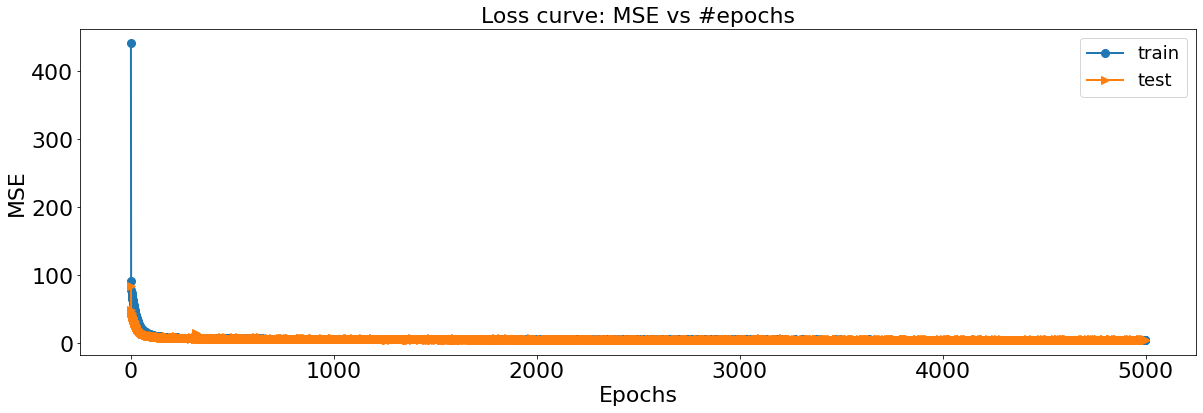

In [24]:
# MSE
figureplot('loss','val_loss',"MSE_main.jpg",'Loss curve: MSE vs #epochs','MSE', 0, 750, 5000, 0, 15)

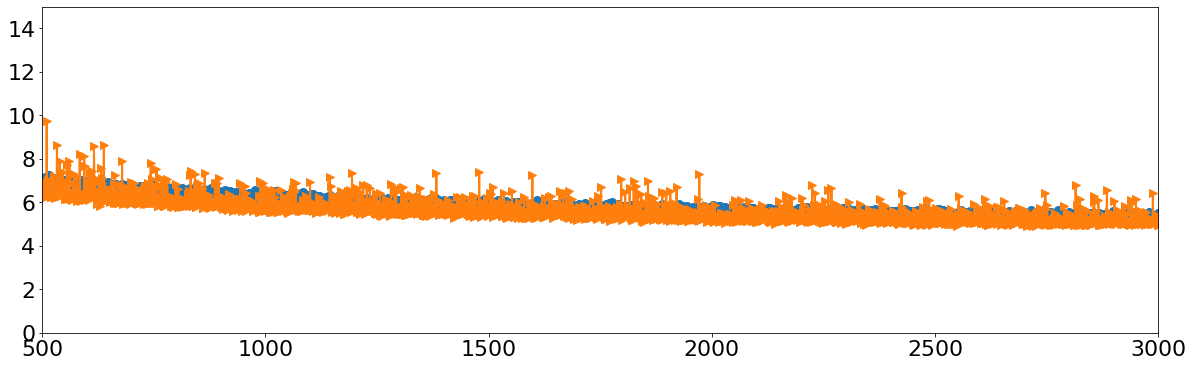

In [25]:
# MSE cropped
figureplot('loss','val_loss',"MSE_main_crop.jpg",'Loss curve: MSE vs #epochs','MSE', 1, 500, 3000, 0, 15)

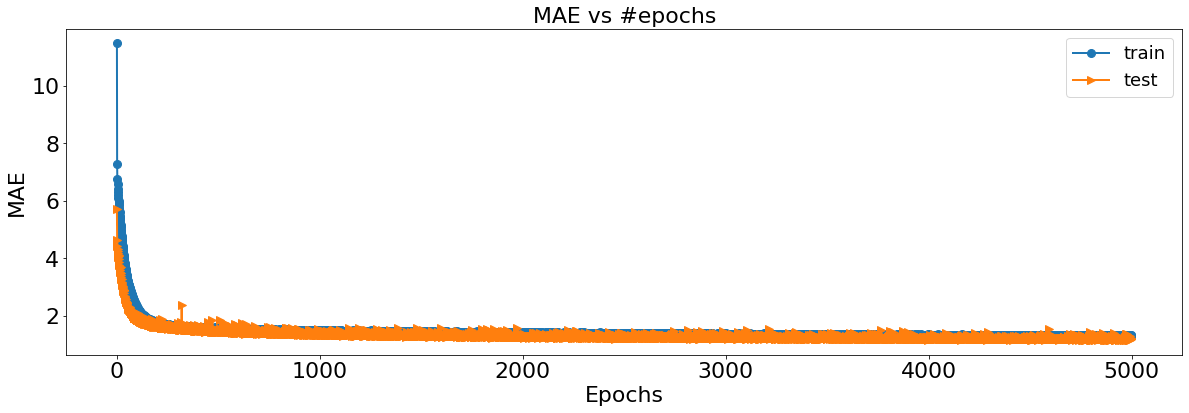

In [26]:
# MAE
figureplot('mae','val_mae',"MAE_main.jpg",'MAE vs #epochs','MAE', 0, 0, 5000, 0, 15)

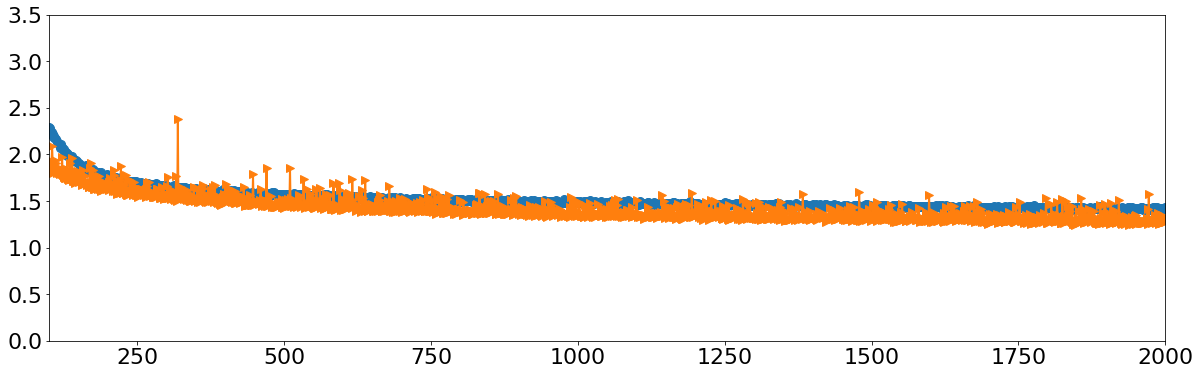

In [27]:
# MAE cropped
figureplot('mae','val_mae',"MAE_main_crop.jpg",'MAE vs #epochs','MAE',1, 100, 2000, 0, 3.5)

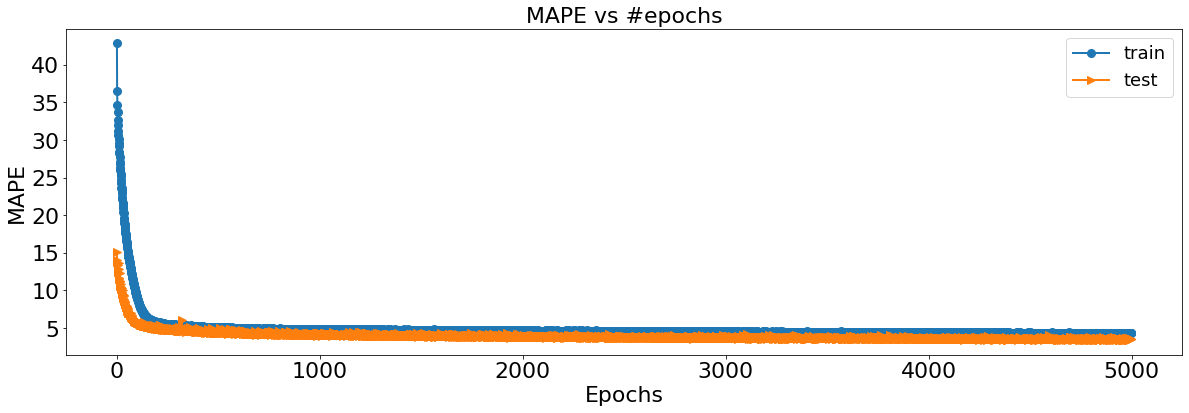

In [28]:
# MAPE
figureplot('mape','val_mape',"MAPE_main.jpg",'MAPE vs #epochs','MAPE', 0, 0, 2000, 0, 15)

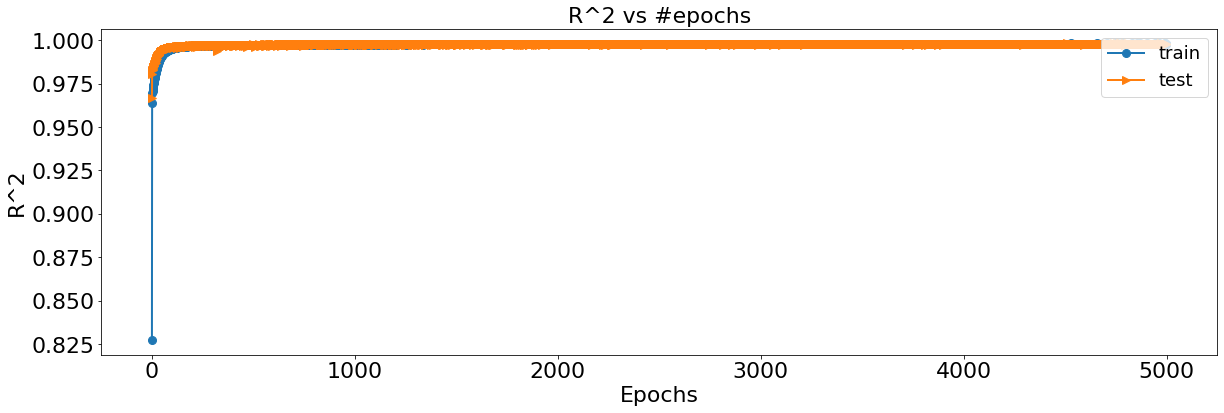

In [29]:
# R2
figureplot('r_square','val_r_square',"R2_main.jpg",'R^2 vs #epochs','R^2', 0, 0, 2000, 0.90, 1.0025)

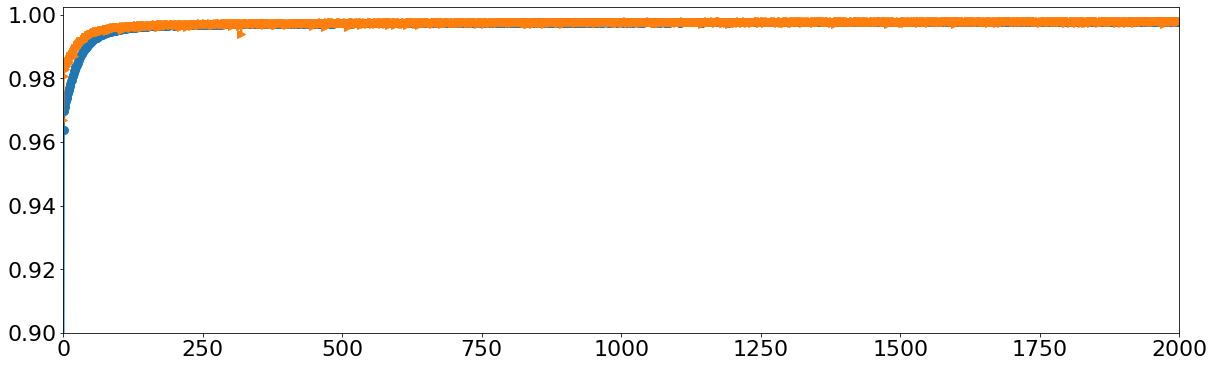

In [30]:
# R2
figureplot('r_square','val_r_square',"R2_main_crop.jpg",'R^2 vs #epochs','R^2', 1, 0, 2000, 0.90, 1.0025)

### Predictions/Testing

In [31]:
# make predictions on the testing data
y_pred = model.predict([testImagesX1,testImagesX2])
y_pred = np.array(y_pred)
y_true = testY1
diff = y_pred - y_true
percentDiff = (diff / y_true) * 100
absPercentDiff = np.abs(percentDiff)
absPercentDiff = round(absPercentDiff,2)
print(absPercentDiff)

         0     1      2     3      4      5
52    1.89  0.35   0.93  4.77   1.04   7.34
9752  1.27  0.74   0.90  1.04   5.11   1.15
7830  0.54  1.42   1.25  0.98   3.28   6.68
8405  0.43  0.30   0.86  2.32   5.87  16.79
4571  2.43  1.60   1.28  1.59   1.86   0.89
...    ...   ...    ...   ...    ...    ...
1845  0.77  0.50   1.23  3.52   2.40   5.52
3266  5.63  4.67   9.89  6.81   4.50   6.52
9070  2.57  0.72  18.12  5.93   2.86   6.90
3467  1.74  1.95   5.50  3.50  11.21   1.64
3348  1.67  1.98   1.06  1.81   4.67   0.83

[1481 rows x 6 columns]


In [32]:
y_true

,0,1,2,3,4,5
52,15.6643,171.478687,5.880520,7.678492,32.05,26.58
9752,16.6874,126.468877,10.931064,6.495271,31.93,45.74
7830,15.7767,148.932579,7.045463,6.847370,23.27,37.07
8405,15.4502,127.786044,10.015598,8.608563,34.91,24.48
4571,13.2288,155.489079,10.529143,4.526296,45.23,37.70
...,...,...,...,...,...,...
1845,16.1834,171.612884,11.252956,6.736913,31.42,43.80
3266,14.7081,129.193696,7.491075,6.231730,42.15,41.97
9070,17.0542,115.653243,6.486855,8.368277,46.53,56.15
3467,15.9578,166.273949,11.481454,8.054764,45.80,48.60


In [33]:
excel = excelwrite('Polar_MbCNN_9870_main.xlsx',y_true,y_pred)

## Prediction on examples from DC 

In [34]:
# unidirectional layup
pathA0_DC = 'E:/PhD-MSR/material_characterization_forJournal/DispersionCalculatorCode/PropagationAngleProfiler_3/StoreResults/GroupVelPolarPlots/BWPolarRep/DCmaterials/uni/A0'
pathS0_DC = 'E:/PhD-MSR/material_characterization_forJournal/DispersionCalculatorCode/PropagationAngleProfiler_3/StoreResults/GroupVelPolarPlots/BWPolarRep/DCmaterials/uni/S0'

In [35]:
# import labels
LabelPath = 'E:/PhD-MSR/material_characterization_forJournal/DispersionCalculatorCode/PropagationAngleProfiler_3/StoreResults/Dataset/MaterialsFromDC/Labels190.txt'
df = pd.read_csv(LabelPath, header=None)
df.shape

(100, 6)

In [36]:
rho = df.iloc[:,0:1]/100
E1 = df.iloc[:,1:2]*1e-9     # in GPa
E2 = df.iloc[:,2:3]*1e-9     # in GPa
G12 = df.iloc[:,3:4]*1e-9    # in GPa
v12 = df.iloc[:,4:5]*100     # in %
v23 = df.iloc[:,5:6]*100     # in %

df_DC = pd.concat([rho,E1,E2,G12,v12,v23],axis=1)
print(df_DC)

       0           1         2    3          4          5
0   15.5  144.645985  9.635564  6.0  29.927007  28.474181
1   15.5  144.645985  9.635564  6.0  29.927007  28.474181
2   15.5  144.645985  9.635564  6.0  29.927007  28.474181
3   15.5  144.645985  9.635564  6.0  29.927007  28.474181
4   15.5  144.645985  9.635564  6.0  29.927007  28.474181
..   ...         ...       ...  ...        ...        ...
95  15.1  178.959000  9.171200  5.5  35.500000  52.850000
96  15.1  178.959000  9.171200  5.5  35.500000  52.850000
97  15.1  178.959000  9.171200  5.5  35.500000  52.850000
98  15.1  178.959000  9.171200  5.5  35.500000  52.850000
99  15.1  178.959000  9.171200  5.5  35.500000  52.850000

[100 rows x 6 columns]


In [40]:
# load the images of A0, S0 and SH0
print("[INFO] loading A0 images...")
imagesA0_DC = load_A0_images(df_DC, pathA0_DC, imsize=128)
imagesA0_DC = imagesA0_DC
print("[INFO] loading S0 images...")
imagesS0_DC = load_S0_images(df_DC, pathS0_DC, imsize=128)
imagesS0_DC = imagesS0_DC

[INFO] loading A0 images...
[INFO] loading S0 images...


In [41]:
testIm_DC = [imagesA0_DC,imagesS0_DC]

In [42]:
# make predictions on the testing data
y_predDC = model.predict([imagesA0_DC,imagesS0_DC])
y_predDC = np.array(y_predDC)
y_trueDC = df_DC
diffDC = y_predDC - y_trueDC
percentDiffDC = (diffDC / y_trueDC) * 100
absPercentDiffDC = np.abs(percentDiffDC)
absPercentDiffDC = round(absPercentDiffDC,2)
print(absPercentDiffDC)

       0     1     2     3      4      5
0   0.57  0.27  3.50  1.87   9.36  28.87
1   0.64  0.46  5.67  1.22   5.67  27.25
2   0.80  0.33  1.54  1.12   7.42  29.76
3   0.95  0.44  0.12  0.20   9.63  32.02
4   1.42  0.04  0.27  1.25  12.15  30.50
..   ...   ...   ...   ...    ...    ...
95  3.05  2.97  6.41  5.89   5.78  11.50
96  1.28  1.46  0.43  4.39   8.33  12.96
97  1.22  0.29  0.94  1.65  27.85  15.75
98  4.06  1.70  0.43  5.02  17.01  19.44
99  1.48  0.91  0.63  2.08  16.25  14.55

[100 rows x 6 columns]


In [43]:
excel = excelwrite('Polar_MbCNN_9870_DC_main.xlsx',y_trueDC,y_predDC)

## Prediction on examples from Dataset-2 

In [60]:
# unidirectional layup
pathS0_D2 = 'E:/PhD-MSR/material_characterization_forJournal/DispersionCalculatorCode/PropagationAngleProfiler_3/StoreResults/MATGEN2/b&w/S0/'
pathA0_D2 = 'E:/PhD-MSR/material_characterization_forJournal/DispersionCalculatorCode/PropagationAngleProfiler_3/StoreResults/MATGEN2/b&w/A0/'

In [61]:
# import labels
LabelPath = 'E:/PhD-MSR/material_characterization_forJournal/DispersionCalculatorCode/PropagationAngleProfiler_3/StoreResults/MATGEN2/Dataset/Labels_genmat2.txt'
df = pd.read_csv(LabelPath, header=None)
df.shape

(9930, 6)

In [62]:
rho = df.iloc[:,0:1]/100
E1 = df.iloc[:,1:2]*1e-9     # in GPa
E2 = df.iloc[:,2:3]*1e-9     # in GPa
G12 = df.iloc[:,3:4]*1e-9    # in GPa
v12 = df.iloc[:,4:5]*100     # in %
v23 = df.iloc[:,5:6]*100     # in %

df_D2 = pd.concat([rho,E1,E2,G12,v12,v23],axis=1)
print(df_D2)

              0           1          2         3       4       5
0     14.639257  133.765191  13.443635  3.346716  36.955  30.898
1     14.639257  133.765191  13.443635  3.346716  36.955  30.898
2     14.639257  133.765191  13.443635  3.346716  36.955  30.898
3     14.639257  133.765191  13.443635  3.346716  36.955  30.898
4     14.639257  133.765191  13.443635  3.346716  36.955  30.898
...         ...         ...        ...       ...     ...     ...
9925  15.819132  167.818853  10.831834  3.314702  24.995  40.549
9926  15.819132  167.818853  10.831834  3.314702  24.995  40.549
9927  15.819132  167.818853  10.831834  3.314702  24.995  40.549
9928  15.819132  167.818853  10.831834  3.314702  24.995  40.549
9929  15.819132  167.818853  10.831834  3.314702  24.995  40.549

[9930 rows x 6 columns]


In [63]:
# load the images of A0, S0 and SH0
print("[INFO] loading A0 images...")
imagesA0_D2 = load_A0_images(df_D2, pathA0_D2, imsize=128)
imagesA0_D2 = imagesA0_D2
print("[INFO] loading S0 images...")
imagesS0_D2 = load_S0_images(df_D2, pathS0_D2, imsize=128)
imagesS0_D2 = imagesS0_D2

[INFO] loading A0 images...
[INFO] loading S0 images...


In [64]:
ii = np.array([imagesA0_D2,imagesS0_D2])
print(ii.shape)

(2, 9930, 128, 128, 1)


In [65]:
#del y_predD2

In [66]:
# make predictions on the testing data
y_predD2 = model.predict([imagesA0_D2,imagesS0_D2])
y_predD2 = np.array(y_predD2)
y_trueD2 = df_D2
diffD2 = y_predD2 - y_trueD2
percentDiffD2 = (diffD2 / y_trueD2) * 100
absPercentDiffD2 = np.abs(percentDiffD2)
absPercentDiffD2 = round(absPercentDiffD2,2)
print(absPercentDiffD2)

(9930, 6)
(9930, 6)
(9930, 6)
         0      1      2      3      4      5
0     2.38  29.27   5.61  54.44   1.42  11.91
1     0.56  27.33   6.75  53.75   4.86  13.06
2     0.72  27.26   5.02  52.19   2.10  17.68
3     2.08  28.37   7.02  61.47   6.47  12.43
4     1.71  25.13   5.65  55.29   6.54  17.28
...    ...    ...    ...    ...    ...    ...
9925  4.87  27.66   9.58  87.26  21.18   8.58
9926  2.00  24.46  13.02  91.14  20.62  12.36
9927  5.37  28.24   7.04  95.67  13.32   0.40
9928  5.86  27.84   8.35  90.30  13.88   8.03
9929  8.85  29.44   7.06  69.59  23.60  13.15

[9930 rows x 6 columns]


In [69]:
excel = excelwrite('Polar_MbCNN_9870_D2_main.xlsx',y_trueD2,y_predD2)